<a href="https://colab.research.google.com/github/HowardHNguyen/Data_Science_for_Healthcare/blob/main/Predict_and_Forecast_by_SARIMA%2C_Prophet%2C_Neural_Prophet%2C_LSTM%2C_GRU%2BCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason_data.csv')

In [17]:
!pip install neuralprophet plotly pandas
import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.4/145.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.5/829.5 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 17.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x

# ARIMA model

## Bay Area

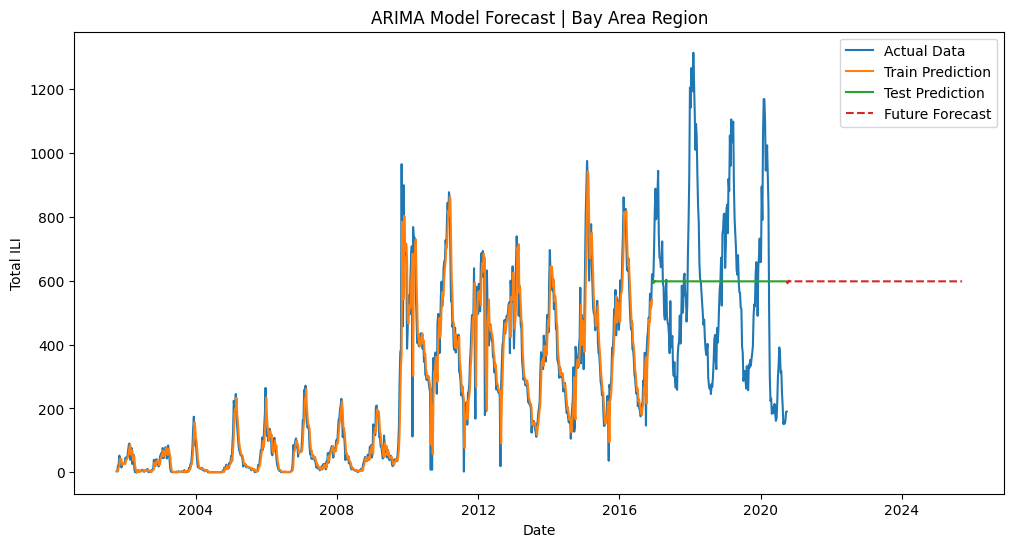

Train MAE: 39.445133051714414, Train MSE: 5453.618496406305, Train RMSE: 73.8486187846889
Test MAE: 234.30732615558776, Test MSE: 79820.59489593614, Test RMSE: 282.52538805554474
Accuracy: 41.28284472417925


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
df_bay_area = df[df['region'] == 'Bay Area'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})
df_bay_area['ds'] = pd.to_datetime(df_bay_area['ds'])
df_bay_area.set_index('ds', inplace=True)

# Split the dataset into train and test sets
train_size = int(len(df_bay_area) * 0.8)
train, test = df_bay_area[:train_size], df_bay_area[train_size:]

# Train the ARIMA model
model = ARIMA(train['y'], order=(5, 1, 0))  # You may need to adjust the order (p, d, q)
model_fit = model.fit()

# Make predictions
train_pred = model_fit.predict(start=train.index[1], end=train.index[-1], typ='levels')
test_pred = model_fit.predict(start=test.index[0], end=test.index[-1], typ='levels')

# Extend the forecasts for the future of 5 years
future_steps = 5 * 52  # Assuming weekly data
future_index = pd.date_range(start=test.index[-1], periods=future_steps, freq='W')
future_forecast = model_fit.forecast(steps=future_steps)

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(df_bay_area.index, df_bay_area['y'], label='Actual Data')

# Plot train predictions
plt.plot(train.index[1:], train_pred, label='Train Prediction')

# Plot test predictions
plt.plot(test.index, test_pred, label='Test Prediction')

# Plot future predictions
plt.plot(future_index, future_forecast, label='Future Forecast', linestyle='--')

plt.legend()
plt.title('ARIMA Model Forecast | Bay Area Region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.show()

# Evaluate the model
train_mae = mean_absolute_error(train['y'][1:], train_pred)
train_mse = mean_squared_error(train['y'][1:], train_pred)
train_rmse = np.sqrt(train_mse)

test_mae = mean_absolute_error(test['y'], test_pred)
test_mse = mean_squared_error(test['y'], test_pred)
test_rmse = np.sqrt(test_mse)

accuracy = 100 - np.mean(np.abs((test['y'] - test_pred) / test['y'])) * 100

# Print error metrics
print(f'Train MAE: {train_mae}, Train MSE: {train_mse}, Train RMSE: {train_rmse}')
print(f'Test MAE: {test_mae}, Test MSE: {test_mse}, Test RMSE: {test_rmse}')
print(f'Accuracy: {accuracy}')

## California

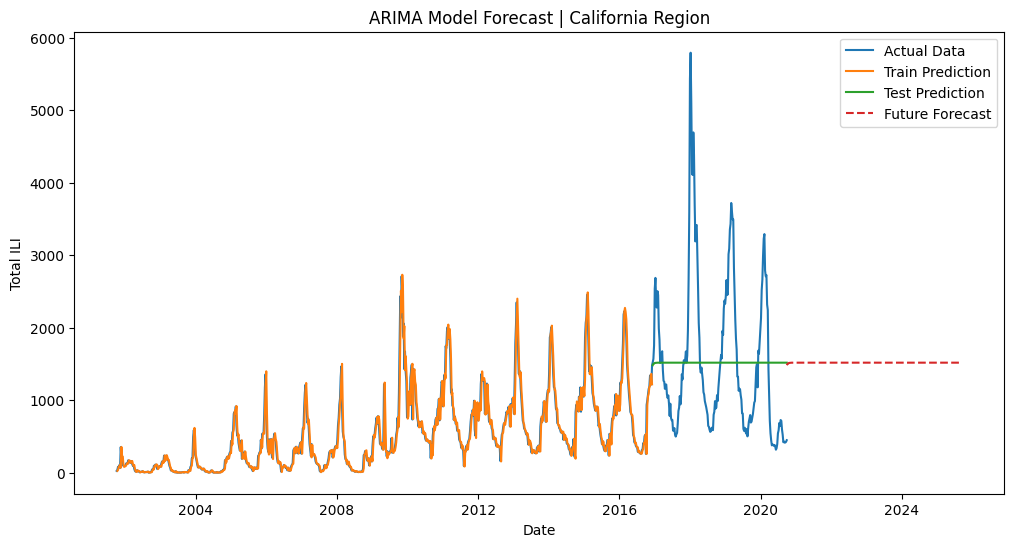

Train MAE: 88.07481614802165, Train MSE: 22156.56970343223, Train RMSE: 148.85083037535338
Test MAE: 835.7003089727998, Test MSE: 1160492.9760216475, Test RMSE: 1077.2617954896791
Accuracy: 18.72379845957788


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
df_california = df[df['region'] == 'California'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})
df_california['ds'] = pd.to_datetime(df_california['ds'])
df_california.set_index('ds', inplace=True)

# Split the dataset into train and test sets
train_size = int(len(df_california) * 0.8)
train, test = df_california[:train_size], df_california[train_size:]

# Train the ARIMA model
model = ARIMA(train['y'], order=(5, 1, 0))  # You may need to adjust the order (p, d, q)
model_fit = model.fit()

# Make predictions
train_pred = model_fit.predict(start=train.index[1], end=train.index[-1], typ='levels')
test_pred = model_fit.predict(start=test.index[0], end=test.index[-1], typ='levels')

# Extend the forecasts for the future of 5 years
future_steps = 5 * 52  # Assuming weekly data
future_index = pd.date_range(start=test.index[-1], periods=future_steps, freq='W')
future_forecast = model_fit.forecast(steps=future_steps)

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(df_california.index, df_california['y'], label='Actual Data')

# Plot train predictions
plt.plot(train.index[1:], train_pred, label='Train Prediction')

# Plot test predictions
plt.plot(test.index, test_pred, label='Test Prediction')

# Plot future predictions
plt.plot(future_index, future_forecast, label='Future Forecast', linestyle='--')

plt.legend()
plt.title('ARIMA Model Forecast | California Region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.show()

# Evaluate the model
train_mae = mean_absolute_error(train['y'][1:], train_pred)
train_mse = mean_squared_error(train['y'][1:], train_pred)
train_rmse = np.sqrt(train_mse)

test_mae = mean_absolute_error(test['y'], test_pred)
test_mse = mean_squared_error(test['y'], test_pred)
test_rmse = np.sqrt(test_mse)

accuracy = 100 - np.mean(np.abs((test['y'] - test_pred) / test['y'])) * 100

# Print error metrics
print(f'Train MAE: {train_mae}, Train MSE: {train_mse}, Train RMSE: {train_rmse}')
print(f'Test MAE: {test_mae}, Test MSE: {test_mse}, Test RMSE: {test_rmse}')
print(f'Accuracy: {accuracy}')


## Central

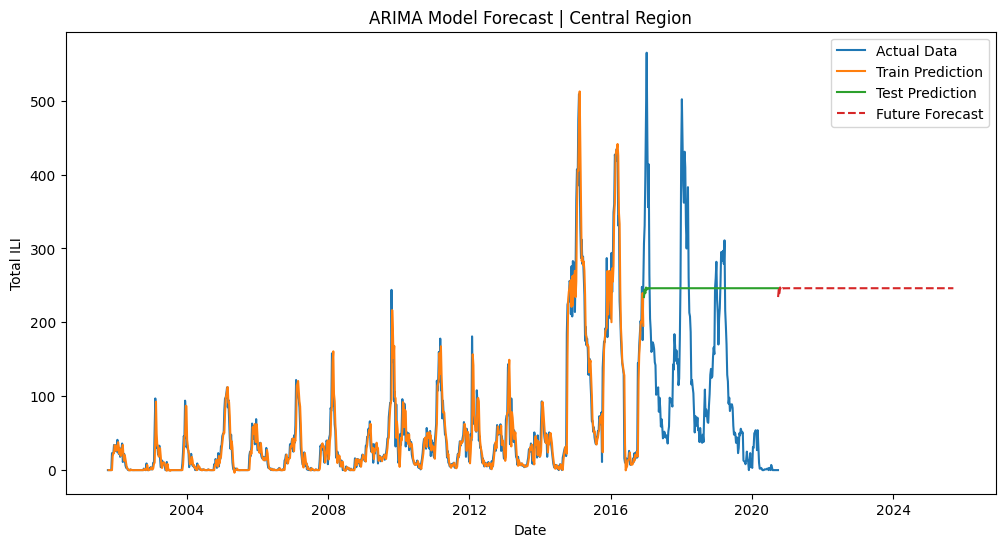

Train MAE: 12.513027107055617, Train MSE: 560.5287246464284, Train RMSE: 23.67548784389518
Test MAE: 161.37924654022217, Test MSE: 30970.016873664677, Test RMSE: 175.98300166113964
Accuracy: -inf


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
df_central = df[df['region'] == 'Central'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})
df_central['ds'] = pd.to_datetime(df_central['ds'])
df_central.set_index('ds', inplace=True)

# Split the dataset into train and test sets
train_size = int(len(df_central) * 0.8)
train, test = df_central[:train_size], df_central[train_size:]

# Train the ARIMA model
model = ARIMA(train['y'], order=(5, 1, 0))  # You may need to adjust the order (p, d, q)
model_fit = model.fit()

# Make predictions
train_pred = model_fit.predict(start=train.index[1], end=train.index[-1], typ='levels')
test_pred = model_fit.predict(start=test.index[0], end=test.index[-1], typ='levels')

# Extend the forecasts for the future of 5 years
future_steps = 5 * 52  # Assuming weekly data
future_index = pd.date_range(start=test.index[-1], periods=future_steps, freq='W')
future_forecast = model_fit.forecast(steps=future_steps)

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(df_central.index, df_central['y'], label='Actual Data')

# Plot train predictions
plt.plot(train.index[1:], train_pred, label='Train Prediction')

# Plot test predictions
plt.plot(test.index, test_pred, label='Test Prediction')

# Plot future predictions
plt.plot(future_index, future_forecast, label='Future Forecast', linestyle='--')

plt.legend()
plt.title('ARIMA Model Forecast | Central Region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.show()

# Evaluate the model
train_mae = mean_absolute_error(train['y'][1:], train_pred)
train_mse = mean_squared_error(train['y'][1:], train_pred)
train_rmse = np.sqrt(train_mse)

test_mae = mean_absolute_error(test['y'], test_pred)
test_mse = mean_squared_error(test['y'], test_pred)
test_rmse = np.sqrt(test_mse)

accuracy = 100 - np.mean(np.abs((test['y'] - test_pred) / test['y'])) * 100

# Print error metrics
print(f'Train MAE: {train_mae}, Train MSE: {train_mse}, Train RMSE: {train_rmse}')
print(f'Test MAE: {test_mae}, Test MSE: {test_mse}, Test RMSE: {test_rmse}')
print(f'Accuracy: {accuracy}')

## Northern region

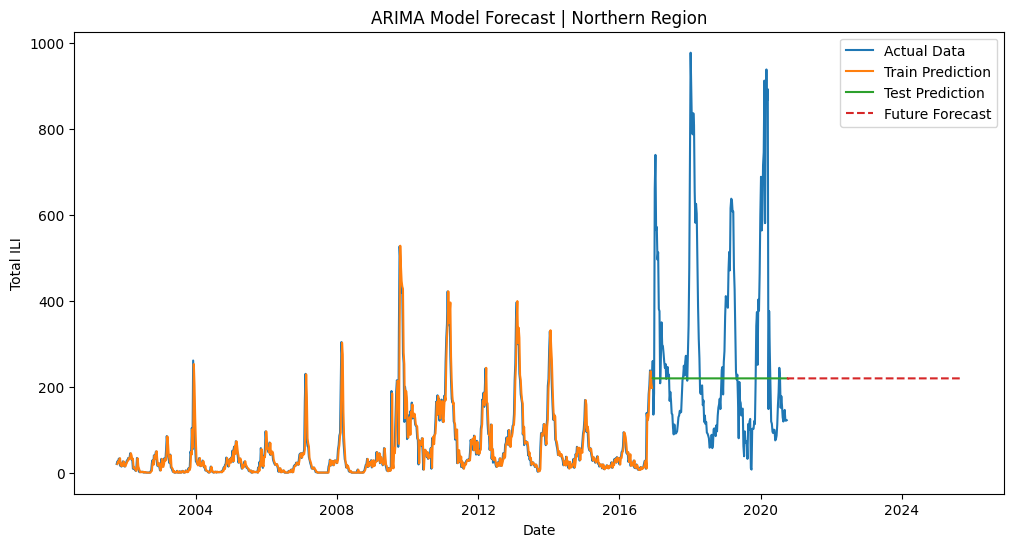

Train MAE: 15.404770236819514, Train MSE: 905.2037233364805, Train RMSE: 30.08660371887263
Test MAE: 162.69502815830302, Test MSE: 53909.5766932749, Test RMSE: 232.18435927786976
Accuracy: 1.9218584079733603


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
df_northern = df[df['region'] == 'Northern'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})
df_northern['ds'] = pd.to_datetime(df_northern['ds'])
df_northern.set_index('ds', inplace=True)

# Split the dataset into train and test sets
train_size = int(len(df_northern) * 0.8)
train, test = df_northern[:train_size], df_northern[train_size:]

# Train the ARIMA model
model = ARIMA(train['y'], order=(5, 1, 0))  # You may need to adjust the order (p, d, q)
model_fit = model.fit()

# Make predictions
train_pred = model_fit.predict(start=train.index[1], end=train.index[-1], typ='levels')
test_pred = model_fit.predict(start=test.index[0], end=test.index[-1], typ='levels')

# Extend the forecasts for the future of 5 years
future_steps = 5 * 52  # Assuming weekly data
future_index = pd.date_range(start=test.index[-1], periods=future_steps, freq='W')
future_forecast = model_fit.forecast(steps=future_steps)

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(df_northern.index, df_northern['y'], label='Actual Data')

# Plot train predictions
plt.plot(train.index[1:], train_pred, label='Train Prediction')

# Plot test predictions
plt.plot(test.index, test_pred, label='Test Prediction')

# Plot future predictions
plt.plot(future_index, future_forecast, label='Future Forecast', linestyle='--')

plt.legend()
plt.title('ARIMA Model Forecast | Northern Region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.show()

# Evaluate the model
train_mae = mean_absolute_error(train['y'][1:], train_pred)
train_mse = mean_squared_error(train['y'][1:], train_pred)
train_rmse = np.sqrt(train_mse)

test_mae = mean_absolute_error(test['y'], test_pred)
test_mse = mean_squared_error(test['y'], test_pred)
test_rmse = np.sqrt(test_mse)

accuracy = 100 - np.mean(np.abs((test['y'] - test_pred) / test['y'])) * 100

# Print error metrics
print(f'Train MAE: {train_mae}, Train MSE: {train_mse}, Train RMSE: {train_rmse}')
print(f'Test MAE: {test_mae}, Test MSE: {test_mse}, Test RMSE: {test_rmse}')
print(f'Accuracy: {accuracy}')

## Lower Southern region

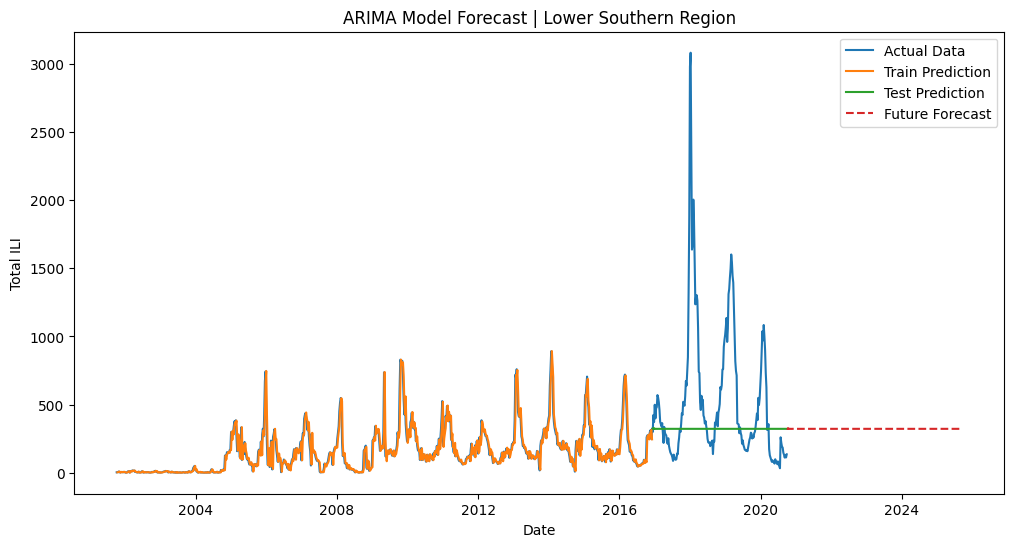

Train MAE: 36.79784233982011, Train MSE: 4151.008089421939, Train RMSE: 64.42831744987555
Test MAE: 332.6096918083356, Test MSE: 302658.4774404541, Test RMSE: 550.1440515360083
Accuracy: 18.77491577602845


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
df_lower_southern = df[df['region'] == 'Lower Southern'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})
df_lower_southern['ds'] = pd.to_datetime(df_lower_southern['ds'])
df_lower_southern.set_index('ds', inplace=True)

# Split the dataset into train and test sets
train_size = int(len(df_lower_southern) * 0.8)
train, test = df_lower_southern[:train_size], df_lower_southern[train_size:]

# Train the ARIMA model
model = ARIMA(train['y'], order=(5, 1, 0))  # You may need to adjust the order (p, d, q)
model_fit = model.fit()

# Make predictions
train_pred = model_fit.predict(start=train.index[1], end=train.index[-1], typ='levels')
test_pred = model_fit.predict(start=test.index[0], end=test.index[-1], typ='levels')

# Extend the forecasts for the future of 5 years
future_steps = 5 * 52  # Assuming weekly data
future_index = pd.date_range(start=test.index[-1], periods=future_steps, freq='W')
future_forecast = model_fit.forecast(steps=future_steps)

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(df_lower_southern.index, df_lower_southern['y'], label='Actual Data')

# Plot train predictions
plt.plot(train.index[1:], train_pred, label='Train Prediction')

# Plot test predictions
plt.plot(test.index, test_pred, label='Test Prediction')

# Plot future predictions
plt.plot(future_index, future_forecast, label='Future Forecast', linestyle='--')

plt.legend()
plt.title('ARIMA Model Forecast | Lower Southern Region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.show()

# Evaluate the model
train_mae = mean_absolute_error(train['y'][1:], train_pred)
train_mse = mean_squared_error(train['y'][1:], train_pred)
train_rmse = np.sqrt(train_mse)

test_mae = mean_absolute_error(test['y'], test_pred)
test_mse = mean_squared_error(test['y'], test_pred)
test_rmse = np.sqrt(test_mse)

accuracy = 100 - np.mean(np.abs((test['y'] - test_pred) / test['y'])) * 100

# Print error metrics
print(f'Train MAE: {train_mae}, Train MSE: {train_mse}, Train RMSE: {train_rmse}')
print(f'Test MAE: {test_mae}, Test MSE: {test_mse}, Test RMSE: {test_rmse}')
print(f'Accuracy: {accuracy}')

## Upper Southern

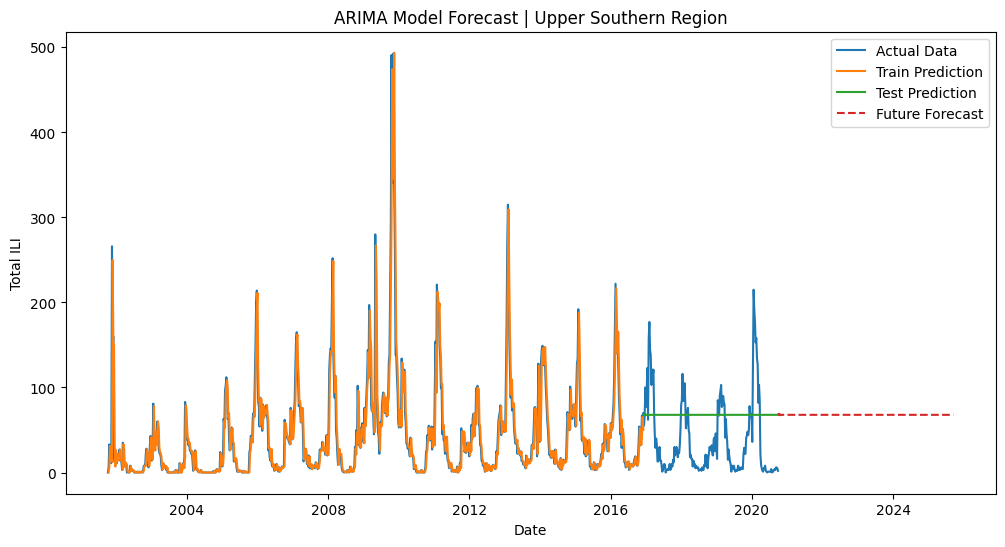

Train MAE: 14.351885864054912, Train MSE: 775.8206121339426, Train RMSE: 27.85355654371525
Test MAE: 48.21473226632221, Test MSE: 2860.2309632738516, Test RMSE: 53.48112716906639
Accuracy: -inf


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
df_upper_southern = df[df['region'] == 'Upper Southern'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})
df_upper_southern['ds'] = pd.to_datetime(df_upper_southern['ds'])
df_upper_southern.set_index('ds', inplace=True)

# Split the dataset into train and test sets
train_size = int(len(df_upper_southern) * 0.8)
train, test = df_upper_southern[:train_size], df_upper_southern[train_size:]

# Train the ARIMA model
model = ARIMA(train['y'], order=(5, 1, 0))  # You may need to adjust the order (p, d, q)
model_fit = model.fit()

# Make predictions
train_pred = model_fit.predict(start=train.index[1], end=train.index[-1], typ='levels')
test_pred = model_fit.predict(start=test.index[0], end=test.index[-1], typ='levels')

# Extend the forecasts for the future of 5 years
future_steps = 5 * 52  # Assuming weekly data
future_index = pd.date_range(start=test.index[-1], periods=future_steps, freq='W')
future_forecast = model_fit.forecast(steps=future_steps)

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(df_upper_southern.index, df_upper_southern['y'], label='Actual Data')

# Plot train predictions
plt.plot(train.index[1:], train_pred, label='Train Prediction')

# Plot test predictions
plt.plot(test.index, test_pred, label='Test Prediction')

# Plot future predictions
plt.plot(future_index, future_forecast, label='Future Forecast', linestyle='--')

plt.legend()
plt.title('ARIMA Model Forecast | Upper Southern Region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.show()

# Evaluate the model
train_mae = mean_absolute_error(train['y'][1:], train_pred)
train_mse = mean_squared_error(train['y'][1:], train_pred)
train_rmse = np.sqrt(train_mse)

test_mae = mean_absolute_error(test['y'], test_pred)
test_mse = mean_squared_error(test['y'], test_pred)
test_rmse = np.sqrt(test_mse)

accuracy = 100 - np.mean(np.abs((test['y'] - test_pred) / test['y'])) * 100

# Print error metrics
print(f'Train MAE: {train_mae}, Train MSE: {train_mse}, Train RMSE: {train_rmse}')
print(f'Test MAE: {test_mae}, Test MSE: {test_mse}, Test RMSE: {test_rmse}')
print(f'Accuracy: {accuracy}')

## ARIMA model Results
### Bay Area
- Train MAE: 39.445133051714414, Train MSE: 5453.618496406305, Train RMSE: 73.8486187846889
- Test MAE: 234.30732615558776, Test MSE: 79820.59489593614, Test RMSE: 282.52538805554474
- Accuracy: 41.28284472417925

### California
- Train MAE: 88.07481614802165, Train MSE: 22156.56970343223, Train RMSE: 148.85083037535338
- Test MAE: 835.7003089727998, Test MSE: 1160492.9760216475, Test RMSE: 1077.2617954896791
- Accuracy: 18.72379845957788

### Central
- Train MAE: 12.513027107055617, Train MSE: 560.5287246464284, Train RMSE: 23.67548784389518
- Test MAE: 161.37924654022217, Test MSE: 30970.016873664677, Test RMSE: 175.98300166113964
- Accuracy: -inf

### Northern
- Train MAE: 15.404770236819514, Train MSE: 905.2037233364805, Train RMSE: 30.08660371887263
- Test MAE: 162.69502815830302, Test MSE: 53909.5766932749, Test RMSE: 232.18435927786976
- Accuracy: 1.9218584079733603

### Lower Southern
- Train MAE: 36.79784233982011, Train MSE: 4151.008089421939, Train RMSE: 64.42831744987555
- Test MAE: 332.6096918083356, Test MSE: 302658.4774404541, Test RMSE: 550.1440515360083
- Accuracy: 18.77491577602845

### Upper Southern
- Train MAE: 14.351885864054912, Train MSE: 775.8206121339426, Train RMSE: 27.85355654371525
- Test MAE: 48.21473226632221, Test MSE: 2860.2309632738516, Test RMSE: 53.48112716906639
- Accuracy: -inf


# Bay Area

## SARIMA

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the dataset
df_bay_area = df[df['region'] == 'Bay Area'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})
df_bay_area['ds'] = pd.to_datetime(df_bay_area['ds'])
df_bay_area = df_bay_area.sort_values('ds')


In [10]:
# Data splitting
train_size = int(len(df_bay_area) * 0.8)
train_df = df_bay_area[:train_size]
test_df = df_bay_area[train_size:]


In [11]:
# Train SARIMA model
sarima_model = SARIMAX(train_df['y'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
sarima_fit = sarima_model.fit(disp=False)


In [12]:
# Predict and Forecast
# Validate on test set
sarima_forecast = sarima_fit.get_forecast(steps=len(test_df))
sarima_forecast_mean = sarima_forecast.predicted_mean

# Extend the forecasts for the future period (5 years weekly)
forecast_horizon = 5 * 52  # 5 years weekly
sarima_future_forecast = sarima_fit.get_forecast(steps=forecast_horizon).predicted_mean


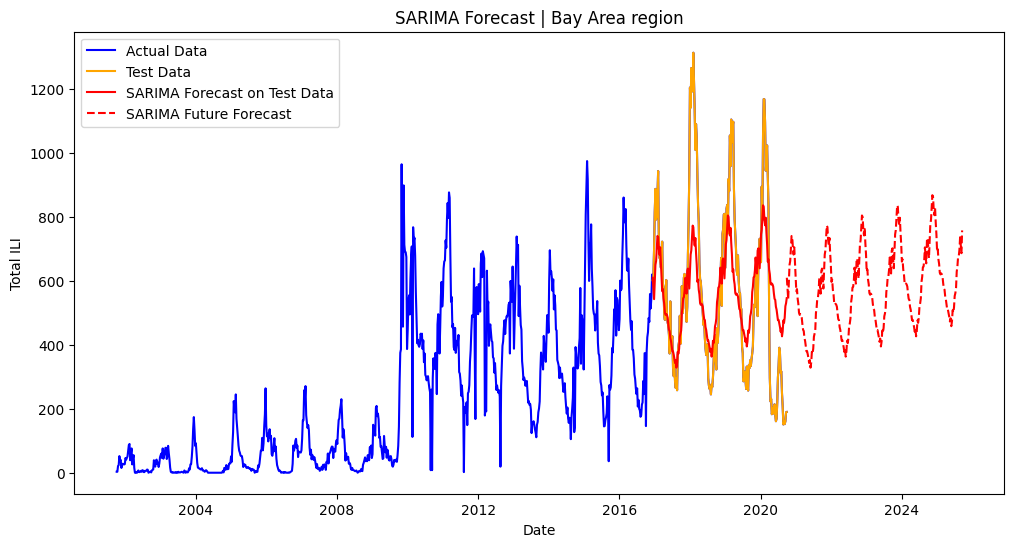

In [13]:
# Plotting the forecast up to 2025-12-31
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(df_bay_area['ds'], df_bay_area['y'], label='Actual Data', color='blue')

# Plot test data
plt.plot(test_df['ds'], test_df['y'], label='Test Data', color='orange')

# Plot forecasts on test data
plt.plot(test_df['ds'], sarima_forecast_mean, label='SARIMA Forecast on Test Data', color='red', linestyle='-')

# Plot future forecasts
future_dates = pd.date_range(start=test_df['ds'].max(), periods=forecast_horizon, freq='W')
plt.plot(future_dates, sarima_future_forecast, label='SARIMA Future Forecast', color='red', linestyle='--')

plt.title('SARIMA Forecast | Bay Area region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()


In [14]:
# Evaluate the model
# Calculate error metrics for SARIMA
sarima_mae = mean_absolute_error(test_df['y'], sarima_forecast_mean)
sarima_mse = mean_squared_error(test_df['y'], sarima_forecast_mean)
sarima_rmse = np.sqrt(sarima_mse)
sarima_accuracy = (1 - sarima_mae / np.mean(test_df['y'])) * 100

# Print error metrics
error_metrics_sarima = pd.DataFrame({
    'Model': ['SARIMA'],
    'MAE': [sarima_mae],
    'MSE': [sarima_mse],
    'RMSE': [sarima_rmse],
    'Accuracy (%)': [sarima_accuracy]
})

print(error_metrics_sarima)


    Model         MAE          MSE       RMSE  Accuracy (%)
0  SARIMA  150.367788  40715.91096  201.78184     73.616895


## Prophet

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprsymdwib/lbku_8ev.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprsymdwib/2b2wamja.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63845', 'data', 'file=/tmp/tmprsymdwib/lbku_8ev.json', 'init=/tmp/tmprsymdwib/2b2wamja.json', 'output', 'file=/tmp/tmprsymdwib/prophet_modele9e52r8w/prophet_model-20240530050345.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:03:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:03:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


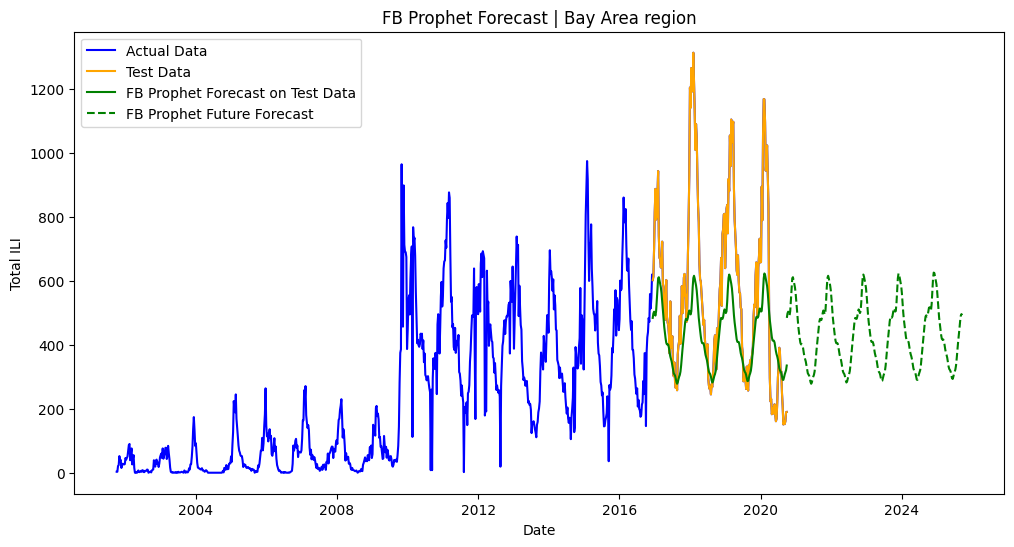

        Model         MAE           MSE        RMSE  Accuracy (%)
0  FB Prophet  179.808814  60260.561672  245.480267     68.451257


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from prophet import Prophet
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the dataset
df_bay_area = df[df['region'] == 'Bay Area'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})
df_bay_area['ds'] = pd.to_datetime(df_bay_area['ds'])
df_bay_area = df_bay_area.sort_values('ds')

# Data splitting
train_size = int(len(df_bay_area) * 0.8)
train_df = df_bay_area[:train_size]
test_df = df_bay_area[train_size:]

# Train FB Prophet model
prophet_model = Prophet()
prophet_model.fit(train_df)

# Predict and Forecast
# Validate on test set
future_prophet = prophet_model.make_future_dataframe(periods=len(test_df), freq='W')
prophet_forecast = prophet_model.predict(future_prophet)
prophet_forecast_df = prophet_forecast[['ds', 'yhat']].tail(len(test_df))

# Extend the forecasts for the future period (5 years weekly)
forecast_horizon = 5 * 52  # 5 years weekly
future_prophet_extended = prophet_model.make_future_dataframe(periods=forecast_horizon, freq='W')
prophet_future_forecast = prophet_model.predict(future_prophet_extended)

# Plotting the forecast up to 2025-12-31
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(df_bay_area['ds'], df_bay_area['y'], label='Actual Data', color='blue')

# Plot test data
plt.plot(test_df['ds'], test_df['y'], label='Test Data', color='orange')

# Plot forecasts on test data
plt.plot(test_df['ds'], prophet_forecast_df['yhat'], label='FB Prophet Forecast on Test Data', color='green', linestyle='-')

# Plot future forecasts
future_dates = pd.date_range(start=test_df['ds'].max(), periods=forecast_horizon, freq='W')
plt.plot(future_dates, prophet_future_forecast['yhat'][-forecast_horizon:], label='FB Prophet Future Forecast', color='green', linestyle='--')

plt.title('FB Prophet Forecast | Bay Area region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# Calculate error metrics for FB Prophet
prophet_mae = mean_absolute_error(test_df['y'], prophet_forecast_df['yhat'])
prophet_mse = mean_squared_error(test_df['y'], prophet_forecast_df['yhat'])
prophet_rmse = np.sqrt(prophet_mse)
prophet_accuracy = (1 - prophet_mae / np.mean(test_df['y'])) * 100

# Print error metrics
error_metrics_prophet = pd.DataFrame({
    'Model': ['FB Prophet'],
    'MAE': [prophet_mae],
    'MSE': [prophet_mse],
    'RMSE': [prophet_rmse],
    'Accuracy (%)': [prophet_accuracy]
})

print(error_metrics_prophet)


## Neural Prophet

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.874% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.874% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 120
INFO:NP.config:Auto-set epochs to 120
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (25) is too small than the required number

Finding best initial lr:   0%|          | 0/223 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.874% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.874% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.497% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.497% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.497% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.497% of the data.
INFO - (NP.df_utils._infer_frequency

Predicting: 25it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.874% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.874% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 9

Predicting: 25it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


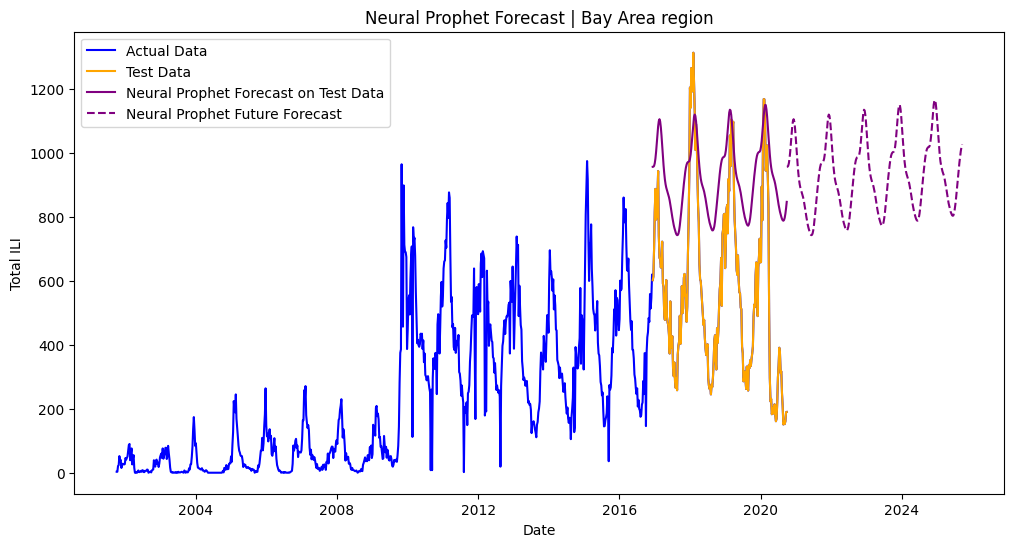

            Model         MAE            MSE        RMSE  Accuracy (%)
0  Neural Prophet  367.560745  163950.691648  404.908251     35.508836


In [43]:
# !pip install neuralprophet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from neuralprophet import NeuralProphet
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the dataset
df_bay_area = df[df['region'] == 'Bay Area'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})
df_bay_area['ds'] = pd.to_datetime(df_bay_area['ds'])
df_bay_area = df_bay_area.sort_values('ds')

# Data splitting
train_size = int(len(df_bay_area) * 0.8)
train_df = df_bay_area[:train_size]
test_df = df_bay_area[train_size:]

# Train Neural Prophet model
neural_prophet_model = NeuralProphet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
neural_prophet_model.fit(train_df, freq='W')

# Predict and Forecast
# Validate on test set
future_neuralprophet_df = neural_prophet_model.make_future_dataframe(train_df, periods=len(test_df), n_historic_predictions=False)
neuralprophet_forecast = neural_prophet_model.predict(future_neuralprophet_df)
neuralprophet_forecast_df = neuralprophet_forecast[['ds', 'yhat1']].tail(len(test_df)).rename(columns={'yhat1': 'yhat'})

# Extend the forecasts for the future period (5 years weekly)
forecast_horizon = 5 * 52  # 5 years weekly
future_neuralprophet_df_extended = neural_prophet_model.make_future_dataframe(train_df, periods=forecast_horizon, n_historic_predictions=False)
neuralprophet_future_forecast = neural_prophet_model.predict(future_neuralprophet_df_extended)

# Plotting the forecast up to 2025-12-31
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(df_bay_area['ds'], df_bay_area['y'], label='Actual Data', color='blue')

# Plot test data
plt.plot(test_df['ds'], test_df['y'], label='Test Data', color='orange')

# Plot forecasts on test data
plt.plot(test_df['ds'], neuralprophet_forecast_df['yhat'], label='Neural Prophet Forecast on Test Data', color='purple', linestyle='-')

# Plot future forecasts
future_dates = pd.date_range(start=test_df['ds'].max(), periods=forecast_horizon, freq='W')
plt.plot(future_dates, neuralprophet_future_forecast['yhat1'][-forecast_horizon:], label='Neural Prophet Future Forecast', color='purple', linestyle='--')

plt.title('Neural Prophet Forecast | Bay Area region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# Calculate error metrics for Neural Prophet
neuralprophet_mae = mean_absolute_error(test_df['y'], neuralprophet_forecast_df['yhat'])
neuralprophet_mse = mean_squared_error(test_df['y'], neuralprophet_forecast_df['yhat'])
neuralprophet_rmse = np.sqrt(neuralprophet_mse)
neuralprophet_accuracy = (1 - neuralprophet_mae / np.mean(test_df['y'])) * 100

# Print error metrics
error_metrics_neuralprophet = pd.DataFrame({
    'Model': ['Neural Prophet'],
    'MAE': [neuralprophet_mae],
    'MSE': [neuralprophet_mse],
    'RMSE': [neuralprophet_rmse],
    'Accuracy (%)': [neuralprophet_accuracy]
})

print(error_metrics_neuralprophet)

# Bay Area Resutls || SARIMA, Prophet, and Neural Prophet

In [44]:
# Summarize results in a dataframe
results_df = pd.DataFrame({
    'Model': ['SARIMA', 'FB Prophet', 'Neural Prophet'],
    'MAE': [sarima_mae, prophet_mae, neuralprophet_mae],
    'MSE': [sarima_mse, prophet_mse, neuralprophet_mse],
    'RMSE': [sarima_rmse, prophet_rmse, neuralprophet_rmse],
    'Accuracy (%)': [sarima_accuracy, prophet_accuracy, neuralprophet_accuracy]
})
print("Forecast Residual Errors and % of Accuracy || Bay Area region")
print(results_df)

Forecast Residual Errors and % of Accuracy || Bay Area region
            Model         MAE           MSE         RMSE  Accuracy (%)
0          SARIMA  571.393249  8.140739e+05   902.260462     62.769956
1      FB Prophet  659.342830  1.070620e+06  1034.707688     57.039460
2  Neural Prophet  367.560745  1.639507e+05   404.908251     35.508836


# California

## SARIMA

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the dataset
df_California = df[df['region'] == 'California'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})
df_California['ds'] = pd.to_datetime(df_California['ds'])
df_California = df_California.sort_values('ds')


In [21]:
df.head(6)

season  date_code weekending          region  Total_ILI  \
0  2001-2002     200140    10/6/01        Bay Area          3   
1  2001-2002     200140    10/6/01      California         25   
2  2001-2002     200140    10/6/01         Central          0   
3  2001-2002     200140    10/6/01  Lower Southern          2   
4  2001-2002     200140    10/6/01        Northern         20   
5  2001-2002     200140    10/6/01  Upper Southern          0   

   Total_Patients_Seen  Percent_ILI  Number_Providers_Reporting  
0                  135         2.22                           2  
1                 1211         2.06                          14  
2                    0         0.00                           0  
3                  336         0.60                           4  
4                  529         3.78                           4  
5                  211         0.00                           4

In [22]:
df.isnull().sum()

season                        0
date_code                     0
weekending                    0
region                        0
Total_ILI                     0
Total_Patients_Seen           0
Percent_ILI                   0
Number_Providers_Reporting    0
dtype: int64

In [23]:
# Data splitting
train_size = int(len(df_California) * 0.8)
train_df = df_California[:train_size]
test_df = df_California[train_size:]


In [24]:
# Train SARIMA model
sarima_model = SARIMAX(train_df['y'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
sarima_fit = sarima_model.fit(disp=False)


In [25]:
# Predict and Forecast
# Validate on test set
sarima_forecast = sarima_fit.get_forecast(steps=len(test_df))
sarima_forecast_mean = sarima_forecast.predicted_mean

# Extend the forecasts for the future period (5 years weekly)
forecast_horizon = 5 * 52  # 5 years weekly
sarima_future_forecast = sarima_fit.get_forecast(steps=forecast_horizon).predicted_mean


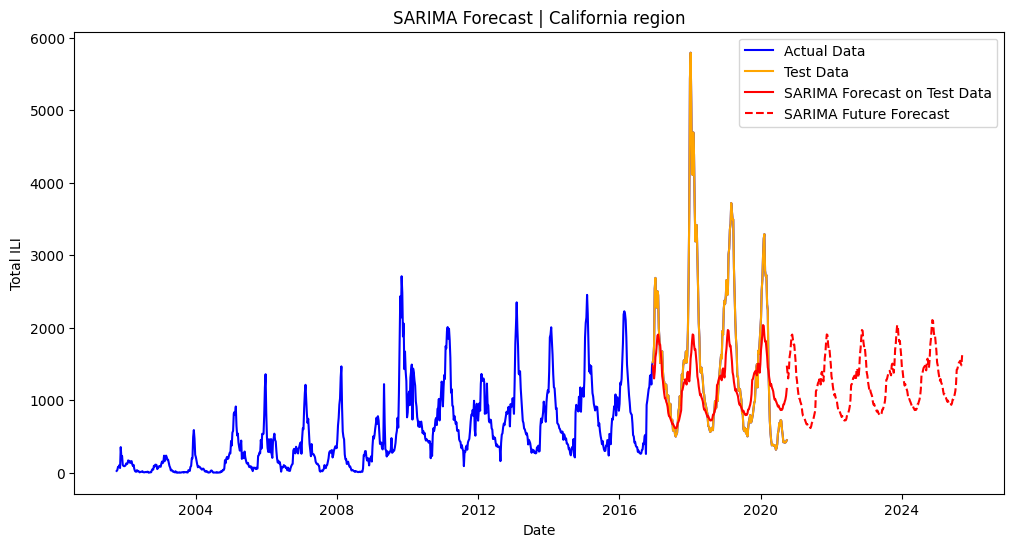

In [26]:
# Plotting the forecast up to 2025-12-31
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(df_California['ds'], df_California['y'], label='Actual Data', color='blue')

# Plot test data
plt.plot(test_df['ds'], test_df['y'], label='Test Data', color='orange')

# Plot forecasts on test data
plt.plot(test_df['ds'], sarima_forecast_mean, label='SARIMA Forecast on Test Data', color='red', linestyle='-')

# Plot future forecasts
future_dates = pd.date_range(start=test_df['ds'].max(), periods=forecast_horizon, freq='W')
plt.plot(future_dates, sarima_future_forecast, label='SARIMA Future Forecast', color='red', linestyle='--')

plt.title('SARIMA Forecast | California region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()


In [27]:
# Evaluate the model
# Calculate error metrics for SARIMA
sarima_mae = mean_absolute_error(test_df['y'], sarima_forecast_mean)
sarima_mse = mean_squared_error(test_df['y'], sarima_forecast_mean)
sarima_rmse = np.sqrt(sarima_mse)
sarima_accuracy = (1 - sarima_mae / np.mean(test_df['y'])) * 100

# Print error metrics
error_metrics_sarima = pd.DataFrame({
    'Model': ['SARIMA'],
    'MAE': [sarima_mae],
    'MSE': [sarima_mse],
    'RMSE': [sarima_rmse],
    'Accuracy (%)': [sarima_accuracy]
})

print(error_metrics_sarima)


    Model         MAE           MSE        RMSE  Accuracy (%)
0  SARIMA  571.393249  814073.94163  902.260462     62.769956


## Prophet

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from prophet import Prophet
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the dataset
df_California = df[df['region'] == 'California'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})
df_California['ds'] = pd.to_datetime(df_California['ds'])
df_California = df_California.sort_values('ds')


In [29]:
# Data splitting
train_size = int(len(df_California) * 0.8)
train_df = df_California[:train_size]
test_df = df_California[train_size:]


In [30]:
# Train FB Prophet model
prophet_model = Prophet()
prophet_model.fit(train_df)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprsymdwib/4bmisyaz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprsymdwib/6rtknil4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79589', 'data', 'file=/tmp/tmprsymdwib/4bmisyaz.json', 'init=/tmp/tmprsymdwib/6rtknil4.json', 'output', 'file=/tmp/tmprsymdwib/prophet_model6kr81f19/prophet_model-20240530051319.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:13:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:13:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [31]:
# Predict and Forecast
# Validate on test set
future_prophet = prophet_model.make_future_dataframe(periods=len(test_df), freq='W')
prophet_forecast = prophet_model.predict(future_prophet)
prophet_forecast_df = prophet_forecast[['ds', 'yhat']].tail(len(test_df))

# Extend the forecasts for the future period (5 years weekly)
forecast_horizon = 5 * 52  # 5 years weekly
future_prophet_extended = prophet_model.make_future_dataframe(periods=forecast_horizon, freq='W')
prophet_future_forecast = prophet_model.predict(future_prophet_extended)


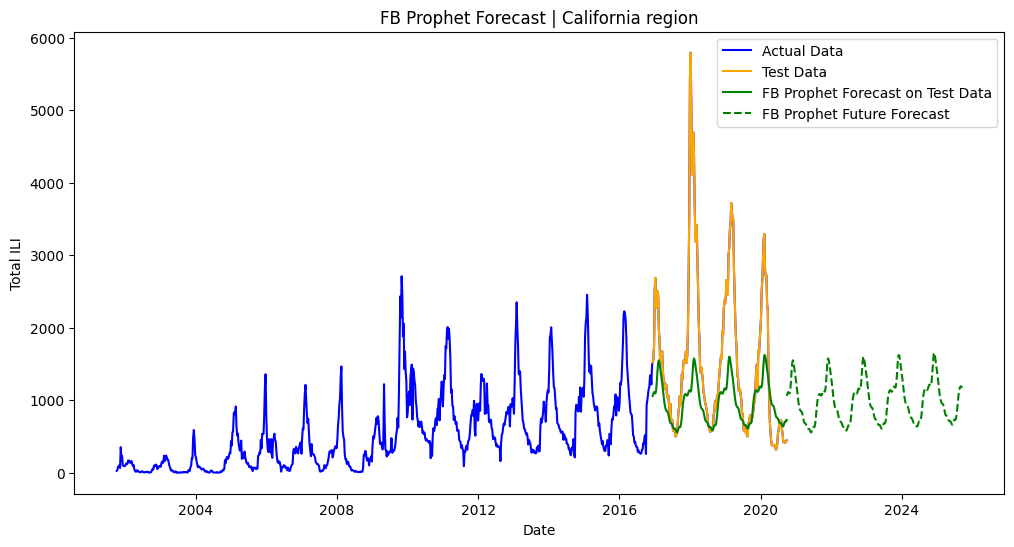

In [32]:
# Plotting the forecast up to 2025-12-31
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(df_California['ds'], df_California['y'], label='Actual Data', color='blue')

# Plot test data
plt.plot(test_df['ds'], test_df['y'], label='Test Data', color='orange')

# Plot forecasts on test data
plt.plot(test_df['ds'], prophet_forecast_df['yhat'], label='FB Prophet Forecast on Test Data', color='green', linestyle='-')

# Plot future forecasts
future_dates = pd.date_range(start=test_df['ds'].max(), periods=forecast_horizon, freq='W')
plt.plot(future_dates, prophet_future_forecast['yhat'][-forecast_horizon:], label='FB Prophet Future Forecast', color='green', linestyle='--')

plt.title('FB Prophet Forecast | California region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()


In [33]:
# Calculate error metrics for FB Prophet
prophet_mae = mean_absolute_error(test_df['y'], prophet_forecast_df['yhat'])
prophet_mse = mean_squared_error(test_df['y'], prophet_forecast_df['yhat'])
prophet_rmse = np.sqrt(prophet_mse)
prophet_accuracy = (1 - prophet_mae / np.mean(test_df['y'])) * 100

# Print error metrics
error_metrics_prophet = pd.DataFrame({
    'Model': ['FB Prophet'],
    'MAE': [prophet_mae],
    'MSE': [prophet_mse],
    'RMSE': [prophet_rmse],
    'Accuracy (%)': [prophet_accuracy]
})

print(error_metrics_prophet)


        Model        MAE           MSE         RMSE  Accuracy (%)
0  FB Prophet  659.34283  1.070620e+06  1034.707688      57.03946


## Neural Prophet

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from neuralprophet import NeuralProphet
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the dataset
df_California = df[df['region'] == 'California'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})
df_California['ds'] = pd.to_datetime(df_California['ds'])
df_California = df_California.sort_values('ds')


In [35]:
# Data splitting
train_size = int(len(df_California) * 0.8)
train_df = df_California[:train_size]
test_df = df_California[train_size:]


In [36]:
# Train Neural Prophet model
neural_prophet_model = NeuralProphet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
neural_prophet_model.fit(train_df, freq='W')


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.874% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.874% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 120
INFO:NP.config:Auto-set epochs to 120
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (25) is too small than the required number

Finding best initial lr:   0%|          | 0/223 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

MAE         RMSE      Loss  RegLoss  epoch
0    1873.344849  2234.345703  0.825864      0.0      0
1    1558.186401  1927.577026  0.666548      0.0      1
2    1273.267700  1629.288086  0.523697      0.0      2
3    1030.740479  1346.450317  0.410170      0.0      3
4     852.952881  1099.620361  0.321800      0.0      4
..           ...          ...       ...      ...    ...
115   179.246933   263.190063  0.034681      0.0    115
116   180.122787   266.037079  0.034959      0.0    116
117   180.341217   267.048187  0.035025      0.0    117
118   180.624207   267.258606  0.035298      0.0    118
119   179.890915   266.862701  0.035095      0.0    119

[120 rows x 5 columns]

In [37]:
# Predict and Forecast
# Validate on test set
future_neuralprophet_df = neural_prophet_model.make_future_dataframe(train_df, periods=len(test_df), n_historic_predictions=False)
neuralprophet_forecast = neural_prophet_model.predict(future_neuralprophet_df)
neuralprophet_forecast_df = neuralprophet_forecast[['ds', 'yhat1']].tail(len(test_df)).rename(columns={'yhat1': 'yhat'})

# Extend the forecasts for the future period (5 years weekly)
forecast_horizon = 5 * 52  # 5 years weekly
future_neuralprophet_df_extended = neural_prophet_model.make_future_dataframe(train_df, periods=forecast_horizon, n_historic_predictions=False)
neuralprophet_future_forecast = neural_prophet_model.predict(future_neuralprophet_df_extended)


INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.874% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.874% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.497% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.497% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.497% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.497% of the data.
INFO - (NP.df_utils._infer_frequency

Predicting: 25it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.874% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.874% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 9

Predicting: 25it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


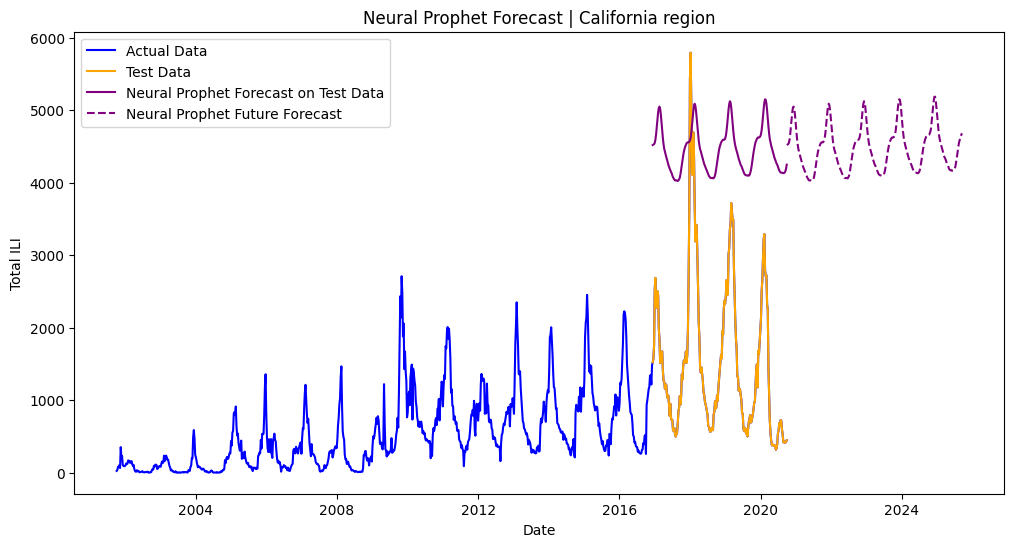

In [38]:
# Plotting the forecast up to 2025-12-31
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(df_California['ds'], df_California['y'], label='Actual Data', color='blue')

# Plot test data
plt.plot(test_df['ds'], test_df['y'], label='Test Data', color='orange')

# Plot forecasts on test data
plt.plot(test_df['ds'], neuralprophet_forecast_df['yhat'], label='Neural Prophet Forecast on Test Data', color='purple', linestyle='-')

# Plot future forecasts
future_dates = pd.date_range(start=test_df['ds'].max(), periods=forecast_horizon, freq='W')
plt.plot(future_dates, neuralprophet_future_forecast['yhat1'][-forecast_horizon:], label='Neural Prophet Future Forecast', color='purple', linestyle='--')

plt.title('Neural Prophet Forecast | California region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()


In [39]:
# Calculate error metrics for Neural Prophet
neuralprophet_mae = mean_absolute_error(test_df['y'], neuralprophet_forecast_df['yhat'])
neuralprophet_mse = mean_squared_error(test_df['y'], neuralprophet_forecast_df['yhat'])
neuralprophet_rmse = np.sqrt(neuralprophet_mse)
neuralprophet_accuracy = (1 - neuralprophet_mae / np.mean(test_df['y'])) * 100

# Print error metrics
error_metrics_neuralprophet = pd.DataFrame({
    'Model': ['Neural Prophet'],
    'MAE': [neuralprophet_mae],
    'MSE': [neuralprophet_mse],
    'RMSE': [neuralprophet_rmse],
    'Accuracy (%)': [neuralprophet_accuracy]
})

print(error_metrics_neuralprophet)


            Model          MAE           MSE         RMSE  Accuracy (%)
0  Neural Prophet  2939.153761  9.229086e+06  3037.941049    -91.505281


# California Results || SARIMA, Prophet, and Neural Prophet

In [40]:
# Summarize results in a dataframe
results_df = pd.DataFrame({
    'Model': ['SARIMA', 'FB Prophet', 'Neural Prophet'],
    'MAE': [sarima_mae, prophet_mae, neuralprophet_mae],
    'MSE': [sarima_mse, prophet_mse, neuralprophet_mse],
    'RMSE': [sarima_rmse, prophet_rmse, neuralprophet_rmse],
    'Accuracy (%)': [sarima_accuracy, prophet_accuracy, neuralprophet_accuracy]
})
print("Forecast Residual Errors and % of Accuracy || California")
print(results_df)

Forecast Residual Errors and % of Accuracy || California
            Model          MAE           MSE         RMSE  Accuracy (%)
0          SARIMA   571.393249  8.140739e+05   902.260462     62.769956
1      FB Prophet   659.342830  1.070620e+06  1034.707688     57.039460
2  Neural Prophet  2939.153761  9.229086e+06  3037.941049    -91.505281


# Central

## SARIMA

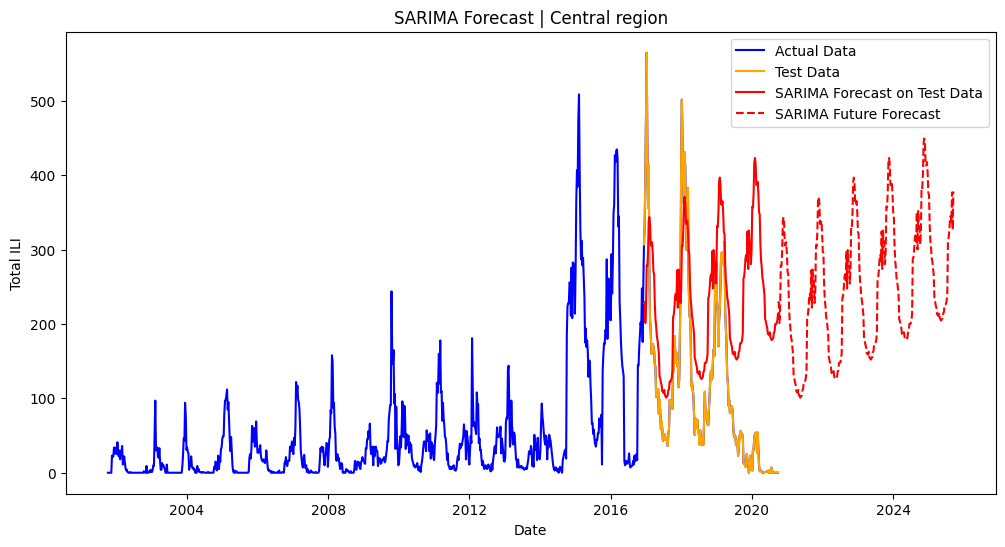

    Model         MAE           MSE        RMSE  Accuracy (%)
0  SARIMA  134.974681  26414.526345  162.525464    -14.234515


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the dataset
df_central = df[df['region'] == 'Central'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})
df_central['ds'] = pd.to_datetime(df_central['ds'])
df_central = df_central.sort_values('ds')

# Data splitting
train_size = int(len(df_central) * 0.8)
train_df = df_central[:train_size]
test_df = df_central[train_size:]

# Train SARIMA model
sarima_model = SARIMAX(train_df['y'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
sarima_fit = sarima_model.fit(disp=False)

# Predict and Forecast
# Validate on test set
sarima_forecast = sarima_fit.get_forecast(steps=len(test_df))
sarima_forecast_mean = sarima_forecast.predicted_mean

# Extend the forecasts for the future period (5 years weekly)
forecast_horizon = 5 * 52  # 5 years weekly
sarima_future_forecast = sarima_fit.get_forecast(steps=forecast_horizon).predicted_mean

# Plotting the forecast up to 2025-12-31
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(df_central['ds'], df_central['y'], label='Actual Data', color='blue')

# Plot test data
plt.plot(test_df['ds'], test_df['y'], label='Test Data', color='orange')

# Plot forecasts on test data
plt.plot(test_df['ds'], sarima_forecast_mean, label='SARIMA Forecast on Test Data', color='red', linestyle='-')

# Plot future forecasts
future_dates = pd.date_range(start=test_df['ds'].max(), periods=forecast_horizon, freq='W')
plt.plot(future_dates, sarima_future_forecast, label='SARIMA Future Forecast', color='red', linestyle='--')

plt.title('SARIMA Forecast | Central region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# Evaluate the model
# Calculate error metrics for SARIMA
sarima_mae = mean_absolute_error(test_df['y'], sarima_forecast_mean)
sarima_mse = mean_squared_error(test_df['y'], sarima_forecast_mean)
sarima_rmse = np.sqrt(sarima_mse)
sarima_accuracy = (1 - sarima_mae / np.mean(test_df['y'])) * 100

# Print error metrics
error_metrics_sarima = pd.DataFrame({
    'Model': ['SARIMA'],
    'MAE': [sarima_mae],
    'MSE': [sarima_mse],
    'RMSE': [sarima_rmse],
    'Accuracy (%)': [sarima_accuracy]
})

print(error_metrics_sarima)

## Prophet

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfu7moun2/swgxutwz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfu7moun2/wys3x3u1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56585', 'data', 'file=/tmp/tmpfu7moun2/swgxutwz.json', 'init=/tmp/tmpfu7moun2/wys3x3u1.json', 'output', 'file=/tmp/tmpfu7moun2/prophet_model6uy77zc7/prophet_model-20240529220712.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:07:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:07:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


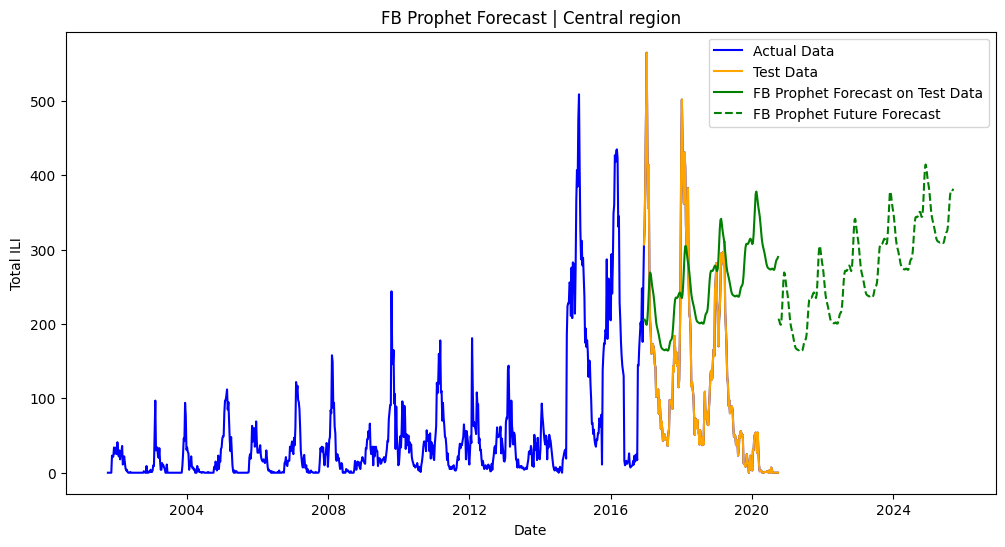

        Model         MAE           MSE        RMSE  Accuracy (%)
0  FB Prophet  165.184276  35797.593243  189.202519    -39.802113


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from prophet import Prophet
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the dataset
df_central = df[df['region'] == 'Central'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})
df_central['ds'] = pd.to_datetime(df_central['ds'])
df_central = df_central.sort_values('ds')

# Data splitting
train_size = int(len(df_central) * 0.8)
train_df = df_central[:train_size]
test_df = df_central[train_size:]

# Train FB Prophet model
prophet_model = Prophet()
prophet_model.fit(train_df)

# Predict and Forecast
# Validate on test set
future_prophet = prophet_model.make_future_dataframe(periods=len(test_df), freq='W')
prophet_forecast = prophet_model.predict(future_prophet)
prophet_forecast_df = prophet_forecast[['ds', 'yhat']].tail(len(test_df))

# Extend the forecasts for the future period (5 years weekly)
forecast_horizon = 5 * 52  # 5 years weekly
future_prophet_extended = prophet_model.make_future_dataframe(periods=forecast_horizon, freq='W')
prophet_future_forecast = prophet_model.predict(future_prophet_extended)

# Plotting the forecast up to 2025-12-31
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(df_central['ds'], df_central['y'], label='Actual Data', color='blue')

# Plot test data
plt.plot(test_df['ds'], test_df['y'], label='Test Data', color='orange')

# Plot forecasts on test data
plt.plot(test_df['ds'], prophet_forecast_df['yhat'], label='FB Prophet Forecast on Test Data', color='green', linestyle='-')

# Plot future forecasts
future_dates = pd.date_range(start=test_df['ds'].max(), periods=forecast_horizon, freq='W')
plt.plot(future_dates, prophet_future_forecast['yhat'][-forecast_horizon:], label='FB Prophet Future Forecast', color='green', linestyle='--')

plt.title('FB Prophet Forecast | Central region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# Calculate error metrics for FB Prophet
prophet_mae = mean_absolute_error(test_df['y'], prophet_forecast_df['yhat'])
prophet_mse = mean_squared_error(test_df['y'], prophet_forecast_df['yhat'])
prophet_rmse = np.sqrt(prophet_mse)
prophet_accuracy = (1 - prophet_mae / np.mean(test_df['y'])) * 100

# Print error metrics
error_metrics_prophet = pd.DataFrame({
    'Model': ['FB Prophet'],
    'MAE': [prophet_mae],
    'MSE': [prophet_mse],
    'RMSE': [prophet_rmse],
    'Accuracy (%)': [prophet_accuracy]
})
print(error_metrics_prophet)

## Neural Prophet

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.874% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.874% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 120
INFO:NP.config:Auto-set epochs to 120
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (25) is too small than the required number

Finding best initial lr:   0%|          | 0/223 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.874% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.874% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.497% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.497% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.497% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.497% of the data.
INFO - (NP.df_utils._infer_frequency

Predicting: 25it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.874% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.874% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 9

Predicting: 25it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


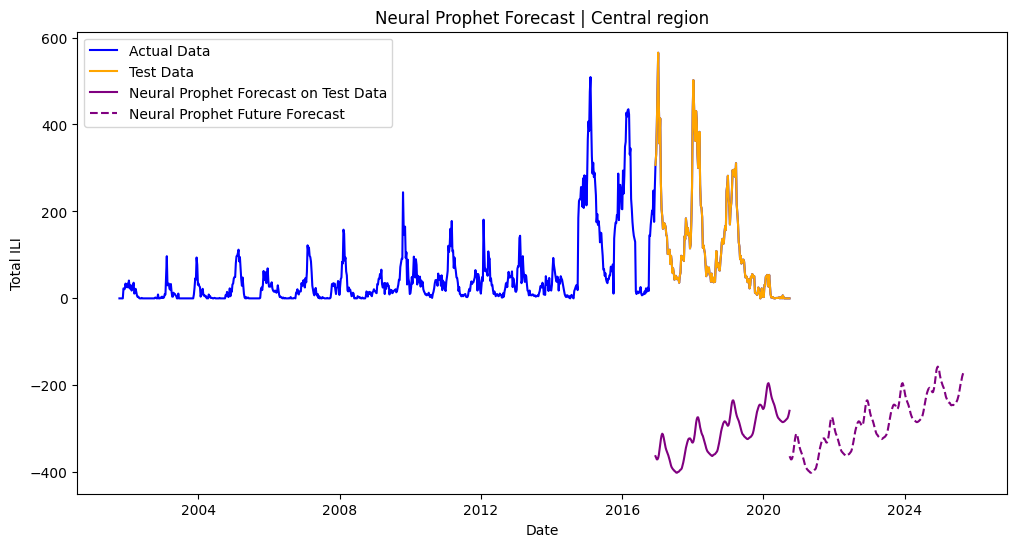

            Model         MAE            MSE        RMSE  Accuracy (%)
0  Neural Prophet  427.061216  200768.808405  448.072325   -261.439127


In [ ]:
# !pip install neuralprophet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from neuralprophet import NeuralProphet
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the dataset
df_central = df[df['region'] == 'Central'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})
df_central['ds'] = pd.to_datetime(df_central['ds'])
df_central = df_central.sort_values('ds')

# Data splitting
train_size = int(len(df_central) * 0.8)
train_df = df_central[:train_size]
test_df = df_central[train_size:]

# Train Neural Prophet model
neural_prophet_model = NeuralProphet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
neural_prophet_model.fit(train_df, freq='W')

# Predict and Forecast
# Validate on test set
future_neuralprophet_df = neural_prophet_model.make_future_dataframe(train_df, periods=len(test_df), n_historic_predictions=False)
neuralprophet_forecast = neural_prophet_model.predict(future_neuralprophet_df)
neuralprophet_forecast_df = neuralprophet_forecast[['ds', 'yhat1']].tail(len(test_df)).rename(columns={'yhat1': 'yhat'})

# Extend the forecasts for the future period (5 years weekly)
forecast_horizon = 5 * 52  # 5 years weekly
future_neuralprophet_df_extended = neural_prophet_model.make_future_dataframe(train_df, periods=forecast_horizon, n_historic_predictions=False)
neuralprophet_future_forecast = neural_prophet_model.predict(future_neuralprophet_df_extended)

# Plotting the forecast up to 2025-12-31
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(df_central['ds'], df_central['y'], label='Actual Data', color='blue')

# Plot test data
plt.plot(test_df['ds'], test_df['y'], label='Test Data', color='orange')

# Plot forecasts on test data
plt.plot(test_df['ds'], neuralprophet_forecast_df['yhat'], label='Neural Prophet Forecast on Test Data', color='purple', linestyle='-')

# Plot future forecasts
future_dates = pd.date_range(start=test_df['ds'].max(), periods=forecast_horizon, freq='W')
plt.plot(future_dates, neuralprophet_future_forecast['yhat1'][-forecast_horizon:], label='Neural Prophet Future Forecast', color='purple', linestyle='--')

plt.title('Neural Prophet Forecast | Central region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# Calculate error metrics for Neural Prophet
neuralprophet_mae = mean_absolute_error(test_df['y'], neuralprophet_forecast_df['yhat'])
neuralprophet_mse = mean_squared_error(test_df['y'], neuralprophet_forecast_df['yhat'])
neuralprophet_rmse = np.sqrt(neuralprophet_mse)
neuralprophet_accuracy = (1 - neuralprophet_mae / np.mean(test_df['y'])) * 100

# Print error metrics
error_metrics_neuralprophet = pd.DataFrame({
    'Model': ['Neural Prophet'],
    'MAE': [neuralprophet_mae],
    'MSE': [neuralprophet_mse],
    'RMSE': [neuralprophet_rmse],
    'Accuracy (%)': [neuralprophet_accuracy]
})
print(error_metrics_neuralprophet)

# Central Region Results || SARIMA, Prophet, and Neural Prophet

In [ ]:
# Summarize results in a dataframe
results_df = pd.DataFrame({
    'Model': ['SARIMA', 'FB Prophet', 'Neural Prophet'],
    'MAE': [sarima_mae, prophet_mae, neuralprophet_mae],
    'MSE': [sarima_mse, prophet_mse, neuralprophet_mse],
    'RMSE': [sarima_rmse, prophet_rmse, neuralprophet_rmse],
    'Accuracy (%)': [sarima_accuracy, prophet_accuracy, neuralprophet_accuracy]
})
print("Forecast Residual Errors and % of Accuracy || Central region")
print(results_df)

Forecast Residual Errors and % of Accuracy || Central region
            Model         MAE            MSE        RMSE  Accuracy (%)
0          SARIMA  134.974681   26414.526345  162.525464    -14.234515
1      FB Prophet  165.184276   35797.593243  189.202519    -39.802113
2  Neural Prophet  427.061216  200768.808405  448.072325   -261.439127


# Northern

## SARIMA

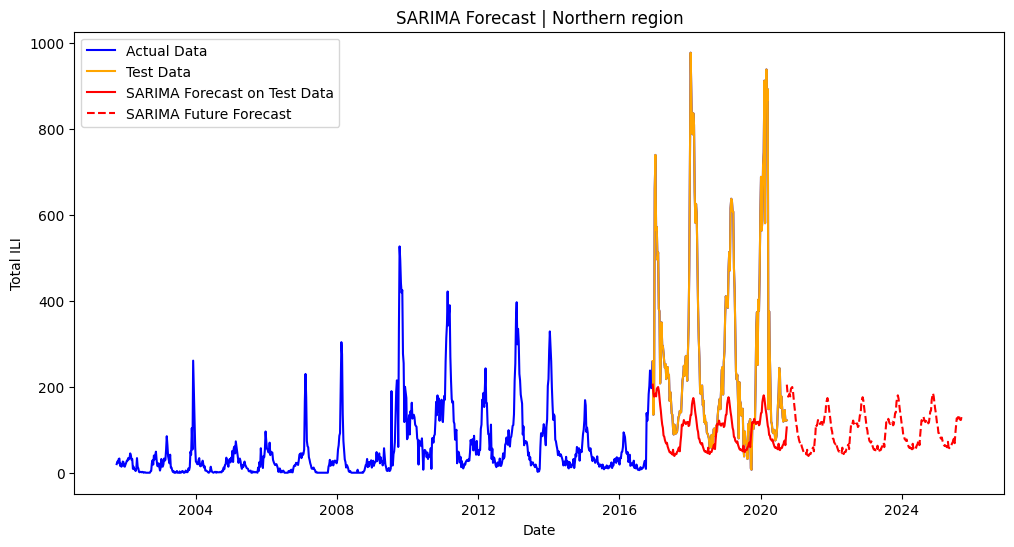

    Model         MAE           MSE      RMSE  Accuracy (%)
0  SARIMA  186.226115  72505.848482  269.2691     33.129438


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the dataset
df_northern = df[df['region'] == 'Northern'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})
df_northern['ds'] = pd.to_datetime(df_northern['ds'])
df_northern = df_northern.sort_values('ds')

# Data splitting
train_size = int(len(df_northern) * 0.8)
train_df = df_northern[:train_size]
test_df = df_northern[train_size:]

# Train SARIMA model
sarima_model = SARIMAX(train_df['y'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
sarima_fit = sarima_model.fit(disp=False)

# Predict and Forecast
# Validate on test set
sarima_forecast = sarima_fit.get_forecast(steps=len(test_df))
sarima_forecast_mean = sarima_forecast.predicted_mean

# Extend the forecasts for the future period (5 years weekly)
forecast_horizon = 5 * 52  # 5 years weekly
sarima_future_forecast = sarima_fit.get_forecast(steps=forecast_horizon).predicted_mean

# Plotting the forecast up to 2025-12-31
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(df_northern['ds'], df_northern['y'], label='Actual Data', color='blue')

# Plot test data
plt.plot(test_df['ds'], test_df['y'], label='Test Data', color='orange')

# Plot forecasts on test data
plt.plot(test_df['ds'], sarima_forecast_mean, label='SARIMA Forecast on Test Data', color='red', linestyle='-')

# Plot future forecasts
future_dates = pd.date_range(start=test_df['ds'].max(), periods=forecast_horizon, freq='W')
plt.plot(future_dates, sarima_future_forecast, label='SARIMA Future Forecast', color='red', linestyle='--')

plt.title('SARIMA Forecast | Northern region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# Evaluate the model
# Calculate error metrics for SARIMA
sarima_mae = mean_absolute_error(test_df['y'], sarima_forecast_mean)
sarima_mse = mean_squared_error(test_df['y'], sarima_forecast_mean)
sarima_rmse = np.sqrt(sarima_mse)
sarima_accuracy = (1 - sarima_mae / np.mean(test_df['y'])) * 100

# Print error metrics
error_metrics_sarima = pd.DataFrame({
    'Model': ['SARIMA'],
    'MAE': [sarima_mae],
    'MSE': [sarima_mse],
    'RMSE': [sarima_rmse],
    'Accuracy (%)': [sarima_accuracy]
})

print(error_metrics_sarima)



## Prophet

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpaxokenob/uhuuzi35.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpaxokenob/ryjz9brq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48012', 'data', 'file=/tmp/tmpaxokenob/uhuuzi35.json', 'init=/tmp/tmpaxokenob/ryjz9brq.json', 'output', 'file=/tmp/tmpaxokenob/prophet_model9vs2fs3x/prophet_model-20240529215201.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:52:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:52:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


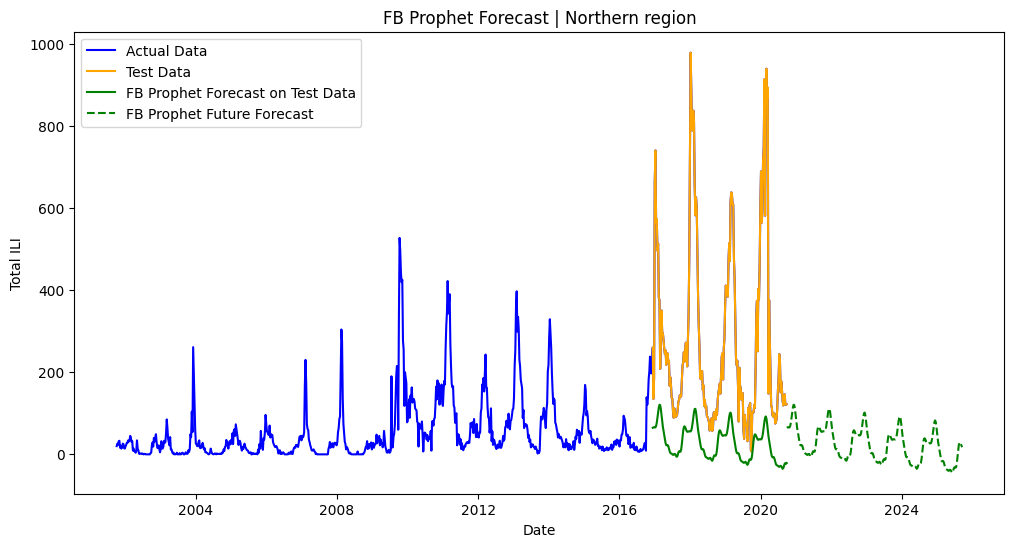

        Model         MAE           MSE        RMSE  Accuracy (%)
0  FB Prophet  250.935586  102194.45681  319.678677      9.893391


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from prophet import Prophet
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the dataset
df_northern = df[df['region'] == 'Northern'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})
df_northern['ds'] = pd.to_datetime(df_northern['ds'])
df_northern = df_northern.sort_values('ds')

# Data splitting
train_size = int(len(df_northern) * 0.8)
train_df = df_northern[:train_size]
test_df = df_northern[train_size:]

# Train FB Prophet model
prophet_model = Prophet()
prophet_model.fit(train_df)

# Predict and Forecast
# Validate on test set
future_prophet = prophet_model.make_future_dataframe(periods=len(test_df), freq='W')
prophet_forecast = prophet_model.predict(future_prophet)
prophet_forecast_df = prophet_forecast[['ds', 'yhat']].tail(len(test_df))

# Extend the forecasts for the future period (5 years weekly)
forecast_horizon = 5 * 52  # 5 years weekly
future_prophet_extended = prophet_model.make_future_dataframe(periods=forecast_horizon, freq='W')
prophet_future_forecast = prophet_model.predict(future_prophet_extended)

# Plotting the forecast up to 2025-12-31
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(df_northern['ds'], df_northern['y'], label='Actual Data', color='blue')

# Plot test data
plt.plot(test_df['ds'], test_df['y'], label='Test Data', color='orange')

# Plot forecasts on test data
plt.plot(test_df['ds'], prophet_forecast_df['yhat'], label='FB Prophet Forecast on Test Data', color='green', linestyle='-')

# Plot future forecasts
future_dates = pd.date_range(start=test_df['ds'].max(), periods=forecast_horizon, freq='W')
plt.plot(future_dates, prophet_future_forecast['yhat'][-forecast_horizon:], label='FB Prophet Future Forecast', color='green', linestyle='--')

plt.title('FB Prophet Forecast | Northern region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# Calculate error metrics for FB Prophet
prophet_mae = mean_absolute_error(test_df['y'], prophet_forecast_df['yhat'])
prophet_mse = mean_squared_error(test_df['y'], prophet_forecast_df['yhat'])
prophet_rmse = np.sqrt(prophet_mse)
prophet_accuracy = (1 - prophet_mae / np.mean(test_df['y'])) * 100

# Print error metrics
error_metrics_prophet = pd.DataFrame({
    'Model': ['FB Prophet'],
    'MAE': [prophet_mae],
    'MSE': [prophet_mse],
    'RMSE': [prophet_rmse],
    'Accuracy (%)': [prophet_accuracy]
})

print(error_metrics_prophet)



## Neural Prophet

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.874% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.874% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 120
INFO:NP.config:Auto-set epochs to 120
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (25) is too small than the required number

Finding best initial lr:   0%|          | 0/223 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.874% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.874% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.497% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.497% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.497% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.497% of the data.
INFO - (NP.df_utils._infer_frequency

Predicting: 25it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.874% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.874% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 9

Predicting: 25it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


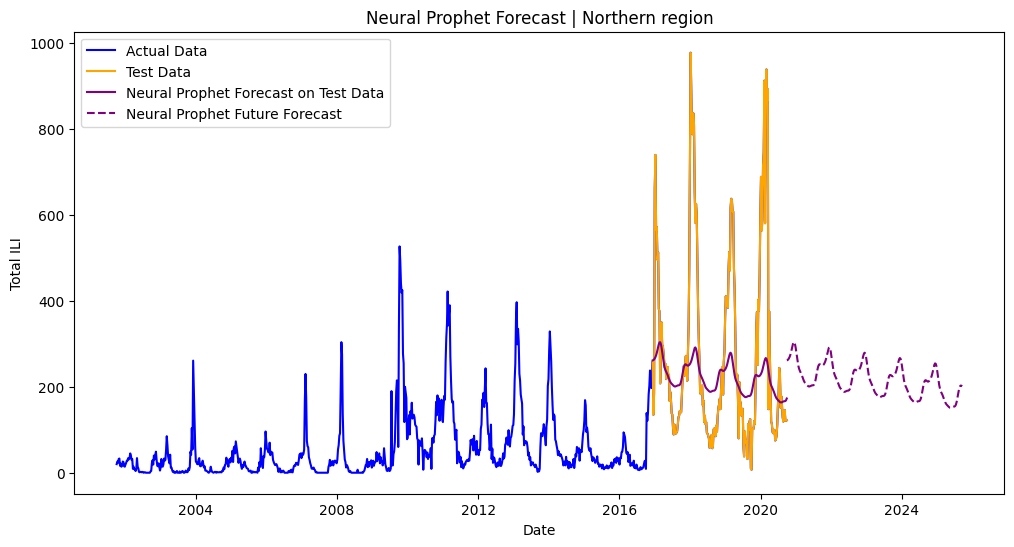

            Model         MAE           MSE        RMSE  Accuracy (%)
0  Neural Prophet  138.704478  43303.396064  208.094681     50.193632


In [ ]:
# !pip install neuralprophet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from neuralprophet import NeuralProphet
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the dataset
df_northern = df[df['region'] == 'Northern'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})
df_northern['ds'] = pd.to_datetime(df_northern['ds'])
df_northern = df_northern.sort_values('ds')

# Data splitting
train_size = int(len(df_northern) * 0.8)
train_df = df_northern[:train_size]
test_df = df_northern[train_size:]

# Train Neural Prophet model
neural_prophet_model = NeuralProphet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
neural_prophet_model.fit(train_df, freq='W')

# Predict and Forecast
# Validate on test set
future_neuralprophet_df = neural_prophet_model.make_future_dataframe(train_df, periods=len(test_df), n_historic_predictions=False)
neuralprophet_forecast = neural_prophet_model.predict(future_neuralprophet_df)
neuralprophet_forecast_df = neuralprophet_forecast[['ds', 'yhat1']].tail(len(test_df)).rename(columns={'yhat1': 'yhat'})

# Extend the forecasts for the future period (5 years weekly)
forecast_horizon = 5 * 52  # 5 years weekly
future_neuralprophet_df_extended = neural_prophet_model.make_future_dataframe(train_df, periods=forecast_horizon, n_historic_predictions=False)
neuralprophet_future_forecast = neural_prophet_model.predict(future_neuralprophet_df_extended)

# Plotting the forecast up to 2025-12-31
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(df_northern['ds'], df_northern['y'], label='Actual Data', color='blue')

# Plot test data
plt.plot(test_df['ds'], test_df['y'], label='Test Data', color='orange')

# Plot forecasts on test data
plt.plot(test_df['ds'], neuralprophet_forecast_df['yhat'], label='Neural Prophet Forecast on Test Data', color='purple', linestyle='-')

# Plot future forecasts
future_dates = pd.date_range(start=test_df['ds'].max(), periods=forecast_horizon, freq='W')
plt.plot(future_dates, neuralprophet_future_forecast['yhat1'][-forecast_horizon:], label='Neural Prophet Future Forecast', color='purple', linestyle='--')

plt.title('Neural Prophet Forecast | Northern region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# Calculate error metrics for Neural Prophet
neuralprophet_mae = mean_absolute_error(test_df['y'], neuralprophet_forecast_df['yhat'])
neuralprophet_mse = mean_squared_error(test_df['y'], neuralprophet_forecast_df['yhat'])
neuralprophet_rmse = np.sqrt(neuralprophet_mse)
neuralprophet_accuracy = (1 - neuralprophet_mae / np.mean(test_df['y'])) * 100

# Print error metrics
error_metrics_neuralprophet = pd.DataFrame({
    'Model': ['Neural Prophet'],
    'MAE': [neuralprophet_mae],
    'MSE': [neuralprophet_mse],
    'RMSE': [neuralprophet_rmse],
    'Accuracy (%)': [neuralprophet_accuracy]
})

print(error_metrics_neuralprophet)


# Northern Region Results || SARIMA, Prophet, and Neural Prophet

In [ ]:
# Summarize results in a dataframe
results_df = pd.DataFrame({
    'Model': ['SARIMA', 'FB Prophet', 'Neural Prophet'],
    'MAE': [sarima_mae, prophet_mae, neuralprophet_mae],
    'MSE': [sarima_mse, prophet_mse, neuralprophet_mse],
    'RMSE': [sarima_rmse, prophet_rmse, neuralprophet_rmse],
    'Accuracy (%)': [sarima_accuracy, prophet_accuracy, neuralprophet_accuracy]
})
print("Forecast Residual Errors and % of Accuracy || Northern region")
print(results_df)

Forecast Residual Errors and % of Accuracy || Northern region
            Model         MAE            MSE        RMSE  Accuracy (%)
0          SARIMA  186.226115   72505.848482  269.269100     33.129438
1      FB Prophet  250.935586  102194.456810  319.678677      9.893391
2  Neural Prophet  138.704478   43303.396064  208.094681     50.193632


# Lower Southern

## SARIMA

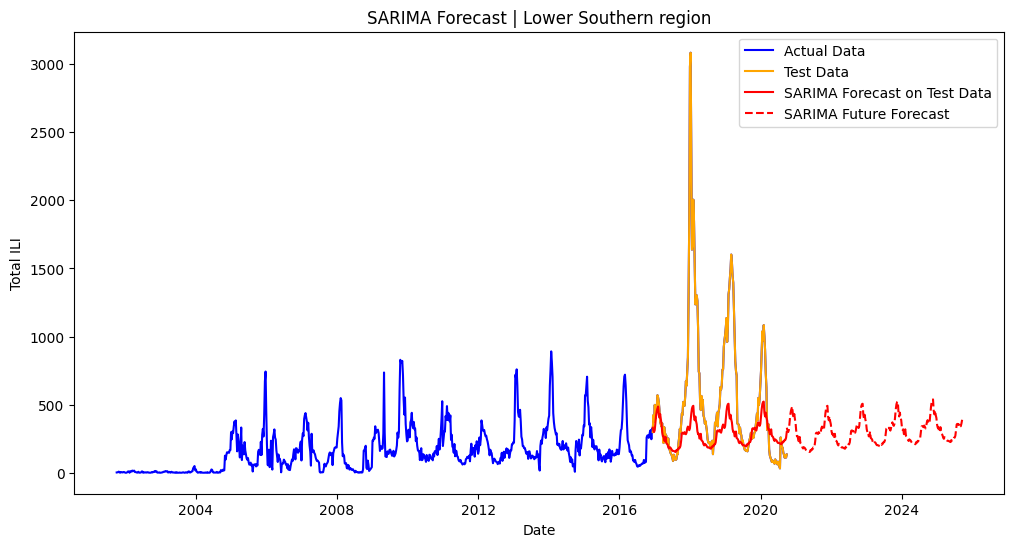

    Model         MAE           MSE        RMSE  Accuracy (%)
0  SARIMA  293.619244  267898.02343  517.588662     44.618521


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the dataset
df_lower_southern = df[df['region'] == 'Lower Southern'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})
df_lower_southern['ds'] = pd.to_datetime(df_lower_southern['ds'])
df_lower_southern = df_lower_southern.sort_values('ds')

# Data splitting
train_size = int(len(df_lower_southern) * 0.8)
train_df = df_lower_southern[:train_size]
test_df = df_lower_southern[train_size:]

# Train SARIMA model
sarima_model = SARIMAX(train_df['y'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
sarima_fit = sarima_model.fit(disp=False)

# Predict and Forecast
# Validate on test set
sarima_forecast = sarima_fit.get_forecast(steps=len(test_df))
sarima_forecast_mean = sarima_forecast.predicted_mean

# Extend the forecasts for the future period (5 years weekly)
forecast_horizon = 5 * 52  # 5 years weekly
sarima_future_forecast = sarima_fit.get_forecast(steps=forecast_horizon).predicted_mean

# Plotting the forecast up to 2025-12-31
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(df_lower_southern['ds'], df_lower_southern['y'], label='Actual Data', color='blue')

# Plot test data
plt.plot(test_df['ds'], test_df['y'], label='Test Data', color='orange')

# Plot forecasts on test data
plt.plot(test_df['ds'], sarima_forecast_mean, label='SARIMA Forecast on Test Data', color='red', linestyle='-')

# Plot future forecasts
future_dates = pd.date_range(start=test_df['ds'].max(), periods=forecast_horizon, freq='W')
plt.plot(future_dates, sarima_future_forecast, label='SARIMA Future Forecast', color='red', linestyle='--')

plt.title('SARIMA Forecast | Lower Southern region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# Evaluate the model
# Calculate error metrics for SARIMA
sarima_mae = mean_absolute_error(test_df['y'], sarima_forecast_mean)
sarima_mse = mean_squared_error(test_df['y'], sarima_forecast_mean)
sarima_rmse = np.sqrt(sarima_mse)
sarima_accuracy = (1 - sarima_mae / np.mean(test_df['y'])) * 100

# Print error metrics
error_metrics_sarima = pd.DataFrame({
    'Model': ['SARIMA'],
    'MAE': [sarima_mae],
    'MSE': [sarima_mse],
    'RMSE': [sarima_rmse],
    'Accuracy (%)': [sarima_accuracy]
})

print(error_metrics_sarima)

## Prophet

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfu7moun2/e7u4fsqb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfu7moun2/lqmnec1u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92508', 'data', 'file=/tmp/tmpfu7moun2/e7u4fsqb.json', 'init=/tmp/tmpfu7moun2/lqmnec1u.json', 'output', 'file=/tmp/tmpfu7moun2/prophet_modelsfwb1y7m/prophet_model-20240529221342.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:13:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:13:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


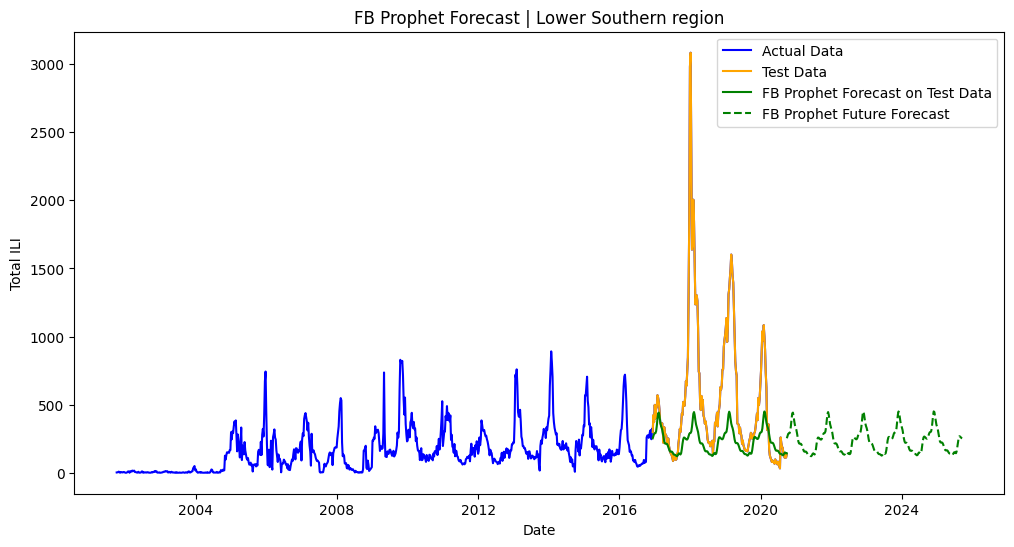

        Model         MAE            MSE        RMSE  Accuracy (%)
0  FB Prophet  320.671328  295723.567909  543.804715     39.516047


In [ ]:
## Prophet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from prophet import Prophet
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the dataset
df_lower_southern = df[df['region'] == 'Lower Southern'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})
df_lower_southern['ds'] = pd.to_datetime(df_lower_southern['ds'])
df_lower_southern = df_lower_southern.sort_values('ds')

# Data splitting
train_size = int(len(df_lower_southern) * 0.8)
train_df = df_lower_southern[:train_size]
test_df = df_lower_southern[train_size:]

# Train FB Prophet model
prophet_model = Prophet()
prophet_model.fit(train_df)

# Predict and Forecast
# Validate on test set
future_prophet = prophet_model.make_future_dataframe(periods=len(test_df), freq='W')
prophet_forecast = prophet_model.predict(future_prophet)
prophet_forecast_df = prophet_forecast[['ds', 'yhat']].tail(len(test_df))

# Extend the forecasts for the future period (5 years weekly)
forecast_horizon = 5 * 52  # 5 years weekly
future_prophet_extended = prophet_model.make_future_dataframe(periods=forecast_horizon, freq='W')
prophet_future_forecast = prophet_model.predict(future_prophet_extended)

# Plotting the forecast up to 2025-12-31
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(df_lower_southern['ds'], df_lower_southern['y'], label='Actual Data', color='blue')

# Plot test data
plt.plot(test_df['ds'], test_df['y'], label='Test Data', color='orange')

# Plot forecasts on test data
plt.plot(test_df['ds'], prophet_forecast_df['yhat'], label='FB Prophet Forecast on Test Data', color='green', linestyle='-')

# Plot future forecasts
future_dates = pd.date_range(start=test_df['ds'].max(), periods=forecast_horizon, freq='W')
plt.plot(future_dates, prophet_future_forecast['yhat'][-forecast_horizon:], label='FB Prophet Future Forecast', color='green', linestyle='--')

plt.title('FB Prophet Forecast | Lower Southern region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# Calculate error metrics for FB Prophet
prophet_mae = mean_absolute_error(test_df['y'], prophet_forecast_df['yhat'])
prophet_mse = mean_squared_error(test_df['y'], prophet_forecast_df['yhat'])
prophet_rmse = np.sqrt(prophet_mse)
prophet_accuracy = (1 - prophet_mae / np.mean(test_df['y'])) * 100

# Print error metrics
error_metrics_prophet = pd.DataFrame({
    'Model': ['FB Prophet'],
    'MAE': [prophet_mae],
    'MSE': [prophet_mse],
    'RMSE': [prophet_rmse],
    'Accuracy (%)': [prophet_accuracy]
})

print(error_metrics_prophet)

## Neural Prophet

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.874% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.874% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 120
INFO:NP.config:Auto-set epochs to 120
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (25) is too small than the required number

Finding best initial lr:   0%|          | 0/223 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.874% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.874% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.497% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.497% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.497% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.497% of the data.
INFO - (NP.df_utils._infer_frequency

Predicting: 25it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.874% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.874% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 9

Predicting: 25it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


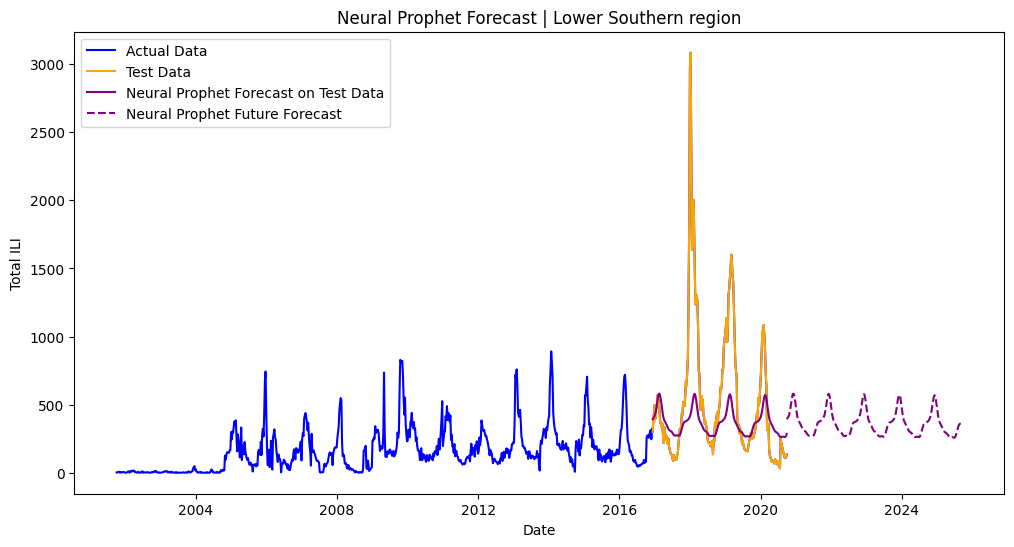

            Model         MAE            MSE        RMSE  Accuracy (%)
0  Neural Prophet  280.764173  232738.775303  482.430073     47.043201


In [ ]:
# !pip install neuralprophet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from neuralprophet import NeuralProphet
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the dataset
df_lower_southern = df[df['region'] == 'Lower Southern'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})
df_lower_southern['ds'] = pd.to_datetime(df_lower_southern['ds'])
df_lower_southern = df_lower_southern.sort_values('ds')

# Data splitting
train_size = int(len(df_lower_southern) * 0.8)
train_df = df_lower_southern[:train_size]
test_df = df_lower_southern[train_size:]

# Train Neural Prophet model
neural_prophet_model = NeuralProphet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
neural_prophet_model.fit(train_df, freq='W')

# Predict and Forecast
# Validate on test set
future_neuralprophet_df = neural_prophet_model.make_future_dataframe(train_df, periods=len(test_df), n_historic_predictions=False)
neuralprophet_forecast = neural_prophet_model.predict(future_neuralprophet_df)
neuralprophet_forecast_df = neuralprophet_forecast[['ds', 'yhat1']].tail(len(test_df)).rename(columns={'yhat1': 'yhat'})

# Extend the forecasts for the future period (5 years weekly)
forecast_horizon = 5 * 52  # 5 years weekly
future_neuralprophet_df_extended = neural_prophet_model.make_future_dataframe(train_df, periods=forecast_horizon, n_historic_predictions=False)
neuralprophet_future_forecast = neural_prophet_model.predict(future_neuralprophet_df_extended)

# Plotting the forecast up to 2025-12-31
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(df_lower_southern['ds'], df_lower_southern['y'], label='Actual Data', color='blue')

# Plot test data
plt.plot(test_df['ds'], test_df['y'], label='Test Data', color='orange')

# Plot forecasts on test data
plt.plot(test_df['ds'], neuralprophet_forecast_df['yhat'], label='Neural Prophet Forecast on Test Data', color='purple', linestyle='-')

# Plot future forecasts
future_dates = pd.date_range(start=test_df['ds'].max(), periods=forecast_horizon, freq='W')
plt.plot(future_dates, neuralprophet_future_forecast['yhat1'][-forecast_horizon:], label='Neural Prophet Future Forecast', color='purple', linestyle='--')

plt.title('Neural Prophet Forecast | Lower Southern region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# Calculate error metrics for Neural Prophet
neuralprophet_mae = mean_absolute_error(test_df['y'], neuralprophet_forecast_df['yhat'])
neuralprophet_mse = mean_squared_error(test_df['y'], neuralprophet_forecast_df['yhat'])
neuralprophet_rmse = np.sqrt(neuralprophet_mse)
neuralprophet_accuracy = (1 - neuralprophet_mae / np.mean(test_df['y'])) * 100

# Print error metrics
error_metrics_neuralprophet = pd.DataFrame({
    'Model': ['Neural Prophet'],
    'MAE': [neuralprophet_mae],
    'MSE': [neuralprophet_mse],
    'RMSE': [neuralprophet_rmse],
    'Accuracy (%)': [neuralprophet_accuracy]
})

print(error_metrics_neuralprophet)

# Lower Southern Results || SARIMA, Prophet, and Neural Prophet

In [ ]:
# Summarize results in a dataframe
results_df = pd.DataFrame({
    'Model': ['SARIMA', 'FB Prophet', 'Neural Prophet'],
    'MAE': [sarima_mae, prophet_mae, neuralprophet_mae],
    'MSE': [sarima_mse, prophet_mse, neuralprophet_mse],
    'RMSE': [sarima_rmse, prophet_rmse, neuralprophet_rmse],
    'Accuracy (%)': [sarima_accuracy, prophet_accuracy, neuralprophet_accuracy]
})
print("Forecast Residual Errors and % of Accuracy || Lower Southern")
print(results_df)

Forecast Residual Errors and % of Accuracy || Lower Southern
            Model         MAE            MSE        RMSE  Accuracy (%)
0          SARIMA  293.619244  267898.023430  517.588662     44.618521
1      FB Prophet  320.671328  295723.567909  543.804715     39.516047
2  Neural Prophet  280.764173  232738.775303  482.430073     47.043201


# Upper Southern

## SARIMA

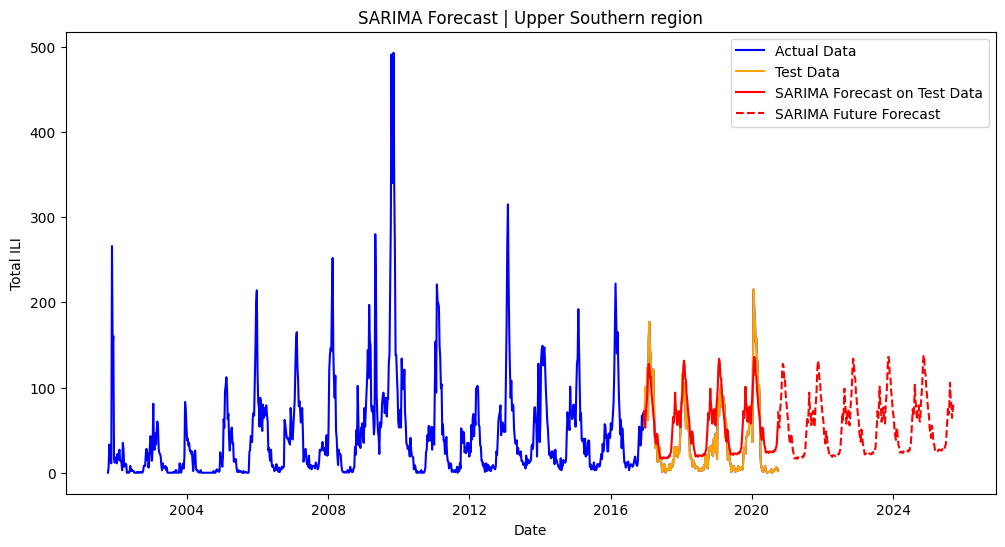

    Model        MAE         MSE       RMSE  Accuracy (%)
0  SARIMA  25.942392  953.017015  30.870974     31.739575


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the dataset
df_upper_southern = df[df['region'] == 'Upper Southern'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})
df_upper_southern['ds'] = pd.to_datetime(df_upper_southern['ds'])
df_upper_southern = df_upper_southern.sort_values('ds')

# Data splitting
train_size = int(len(df_upper_southern) * 0.8)
train_df = df_upper_southern[:train_size]
test_df = df_upper_southern[train_size:]

# Train SARIMA model
sarima_model = SARIMAX(train_df['y'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
sarima_fit = sarima_model.fit(disp=False)

# Predict and Forecast
# Validate on test set
sarima_forecast = sarima_fit.get_forecast(steps=len(test_df))
sarima_forecast_mean = sarima_forecast.predicted_mean

# Extend the forecasts for the future period (5 years weekly)
forecast_horizon = 5 * 52  # 5 years weekly
sarima_future_forecast = sarima_fit.get_forecast(steps=forecast_horizon).predicted_mean

# Plotting the forecast up to 2025-12-31
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(df_upper_southern['ds'], df_upper_southern['y'], label='Actual Data', color='blue')

# Plot test data
plt.plot(test_df['ds'], test_df['y'], label='Test Data', color='orange')

# Plot forecasts on test data
plt.plot(test_df['ds'], sarima_forecast_mean, label='SARIMA Forecast on Test Data', color='red', linestyle='-')

# Plot future forecasts
future_dates = pd.date_range(start=test_df['ds'].max(), periods=forecast_horizon, freq='W')
plt.plot(future_dates, sarima_future_forecast, label='SARIMA Future Forecast', color='red', linestyle='--')

plt.title('SARIMA Forecast | Upper Southern region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# Evaluate the model
# Calculate error metrics for SARIMA
sarima_mae = mean_absolute_error(test_df['y'], sarima_forecast_mean)
sarima_mse = mean_squared_error(test_df['y'], sarima_forecast_mean)
sarima_rmse = np.sqrt(sarima_mse)
sarima_accuracy = (1 - sarima_mae / np.mean(test_df['y'])) * 100

# Print error metrics
error_metrics_sarima = pd.DataFrame({
    'Model': ['SARIMA'],
    'MAE': [sarima_mae],
    'MSE': [sarima_mse],
    'RMSE': [sarima_rmse],
    'Accuracy (%)': [sarima_accuracy]
})
print(error_metrics_sarima)

## Prophet

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfu7moun2/f24umm9f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfu7moun2/ge8s4lc6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74857', 'data', 'file=/tmp/tmpfu7moun2/f24umm9f.json', 'init=/tmp/tmpfu7moun2/ge8s4lc6.json', 'output', 'file=/tmp/tmpfu7moun2/prophet_modelnccs1684/prophet_model-20240529221112.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:11:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:11:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


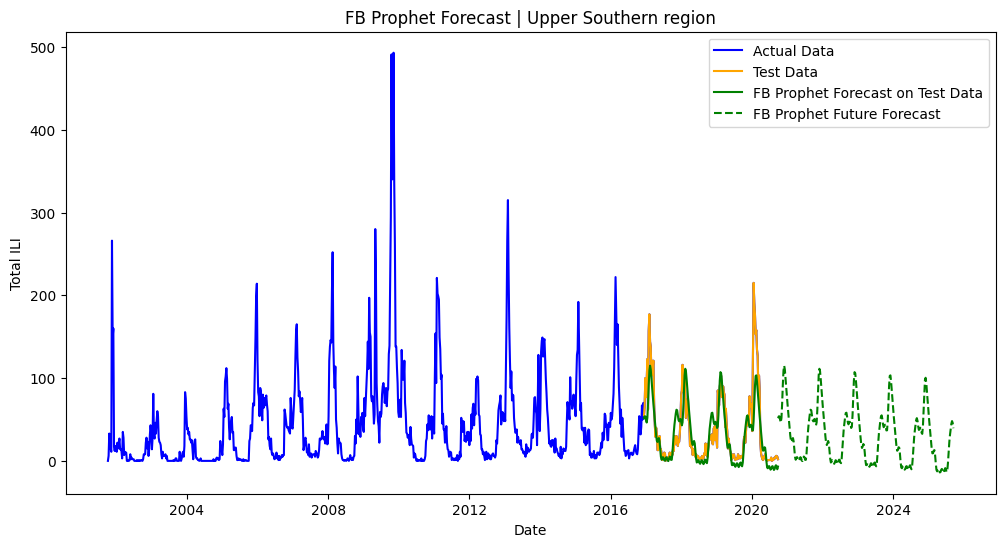

        Model        MAE         MSE       RMSE  Accuracy (%)
0  FB Prophet  17.270501  722.771805  26.884416     54.557323


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from prophet import Prophet
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the dataset
df_upper_southern = df[df['region'] == 'Upper Southern'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})
df_upper_southern['ds'] = pd.to_datetime(df_upper_southern['ds'])
df_upper_southern = df_upper_southern.sort_values('ds')

# Data splitting
train_size = int(len(df_upper_southern) * 0.8)
train_df = df_upper_southern[:train_size]
test_df = df_upper_southern[train_size:]

# Train FB Prophet model
prophet_model = Prophet()
prophet_model.fit(train_df)

# Predict and Forecast
# Validate on test set
future_prophet = prophet_model.make_future_dataframe(periods=len(test_df), freq='W')
prophet_forecast = prophet_model.predict(future_prophet)
prophet_forecast_df = prophet_forecast[['ds', 'yhat']].tail(len(test_df))

# Extend the forecasts for the future period (5 years weekly)
forecast_horizon = 5 * 52  # 5 years weekly
future_prophet_extended = prophet_model.make_future_dataframe(periods=forecast_horizon, freq='W')
prophet_future_forecast = prophet_model.predict(future_prophet_extended)

# Plotting the forecast up to 2025-12-31
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(df_upper_southern['ds'], df_upper_southern['y'], label='Actual Data', color='blue')

# Plot test data
plt.plot(test_df['ds'], test_df['y'], label='Test Data', color='orange')

# Plot forecasts on test data
plt.plot(test_df['ds'], prophet_forecast_df['yhat'], label='FB Prophet Forecast on Test Data', color='green', linestyle='-')

# Plot future forecasts
future_dates = pd.date_range(start=test_df['ds'].max(), periods=forecast_horizon, freq='W')
plt.plot(future_dates, prophet_future_forecast['yhat'][-forecast_horizon:], label='FB Prophet Future Forecast', color='green', linestyle='--')

plt.title('FB Prophet Forecast | Upper Southern region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# Calculate error metrics for FB Prophet
prophet_mae = mean_absolute_error(test_df['y'], prophet_forecast_df['yhat'])
prophet_mse = mean_squared_error(test_df['y'], prophet_forecast_df['yhat'])
prophet_rmse = np.sqrt(prophet_mse)
prophet_accuracy = (1 - prophet_mae / np.mean(test_df['y'])) * 100

# Print error metrics
error_metrics_prophet = pd.DataFrame({
    'Model': ['FB Prophet'],
    'MAE': [prophet_mae],
    'MSE': [prophet_mse],
    'RMSE': [prophet_rmse],
    'Accuracy (%)': [prophet_accuracy]
})

print(error_metrics_prophet)

## Neural Prophet

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.874% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.874% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 120
INFO:NP.config:Auto-set epochs to 120
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (25) is too small than the required number

Finding best initial lr:   0%|          | 0/223 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.874% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.874% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.497% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.497% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.497% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.497% of the data.
INFO - (NP.df_utils._infer_frequency

Predicting: 25it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.874% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.874% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 9

Predicting: 25it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


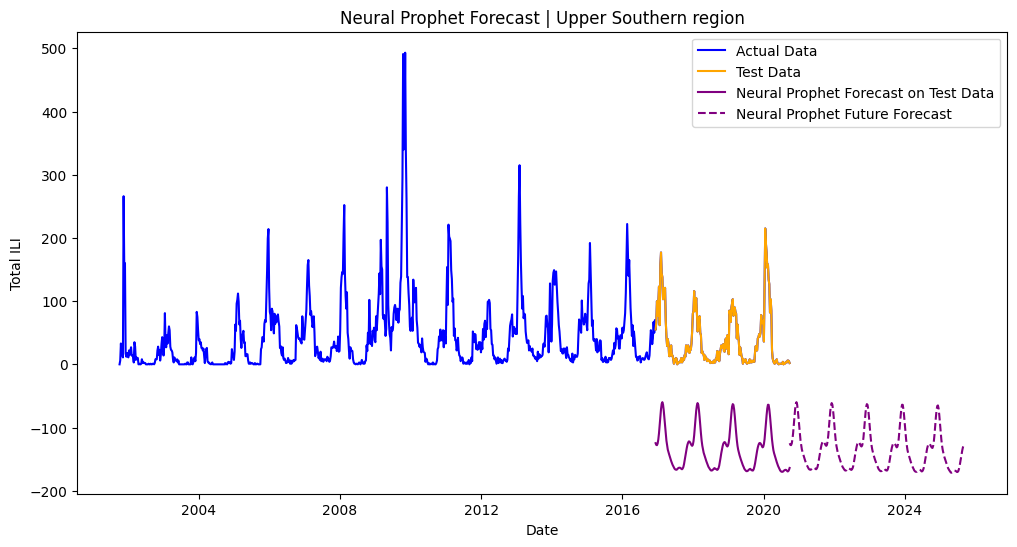

            Model         MAE          MSE        RMSE  Accuracy (%)
0  Neural Prophet  173.128856  30582.80835  174.879411   -355.542011


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from neuralprophet import NeuralProphet
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the dataset
df_upper_southern = df[df['region'] == 'Upper Southern'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})
df_upper_southern['ds'] = pd.to_datetime(df_upper_southern['ds'])
df_upper_southern = df_upper_southern.sort_values('ds')

# Data splitting
train_size = int(len(df_upper_southern) * 0.8)
train_df = df_upper_southern[:train_size]
test_df = df_upper_southern[train_size:]

# Train Neural Prophet model
neural_prophet_model = NeuralProphet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
neural_prophet_model.fit(train_df, freq='W')

# Predict and Forecast
# Validate on test set
future_neuralprophet_df = neural_prophet_model.make_future_dataframe(train_df, periods=len(test_df), n_historic_predictions=False)
neuralprophet_forecast = neural_prophet_model.predict(future_neuralprophet_df)
neuralprophet_forecast_df = neuralprophet_forecast[['ds', 'yhat1']].tail(len(test_df)).rename(columns={'yhat1': 'yhat'})

# Extend the forecasts for the future period (5 years weekly)
forecast_horizon = 5 * 52  # 5 years weekly
future_neuralprophet_df_extended = neural_prophet_model.make_future_dataframe(train_df, periods=forecast_horizon, n_historic_predictions=False)
neuralprophet_future_forecast = neural_prophet_model.predict(future_neuralprophet_df_extended)

# Plotting the forecast up to 2025-12-31
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(df_upper_southern['ds'], df_upper_southern['y'], label='Actual Data', color='blue')

# Plot test data
plt.plot(test_df['ds'], test_df['y'], label='Test Data', color='orange')

# Plot forecasts on test data
plt.plot(test_df['ds'], neuralprophet_forecast_df['yhat'], label='Neural Prophet Forecast on Test Data', color='purple', linestyle='-')

# Plot future forecasts
future_dates = pd.date_range(start=test_df['ds'].max(), periods=forecast_horizon, freq='W')
plt.plot(future_dates, neuralprophet_future_forecast['yhat1'][-forecast_horizon:], label='Neural Prophet Future Forecast', color='purple', linestyle='--')

plt.title('Neural Prophet Forecast | Upper Southern region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# Calculate error metrics for Neural Prophet
neuralprophet_mae = mean_absolute_error(test_df['y'], neuralprophet_forecast_df['yhat'])
neuralprophet_mse = mean_squared_error(test_df['y'], neuralprophet_forecast_df['yhat'])
neuralprophet_rmse = np.sqrt(neuralprophet_mse)
neuralprophet_accuracy = (1 - neuralprophet_mae / np.mean(test_df['y'])) * 100

# Print error metrics
error_metrics_neuralprophet = pd.DataFrame({
    'Model': ['Neural Prophet'],
    'MAE': [neuralprophet_mae],
    'MSE': [neuralprophet_mse],
    'RMSE': [neuralprophet_rmse],
    'Accuracy (%)': [neuralprophet_accuracy]
})

print(error_metrics_neuralprophet)

# Upper Southern Results || SARIMA, Prophet, and Neural Prophet

In [ ]:
# Summarize results in a dataframe
results_df = pd.DataFrame({
    'Model': ['SARIMA', 'FB Prophet', 'Neural Prophet'],
    'MAE': [sarima_mae, prophet_mae, neuralprophet_mae],
    'MSE': [sarima_mse, prophet_mse, neuralprophet_mse],
    'RMSE': [sarima_rmse, prophet_rmse, neuralprophet_rmse],
    'Accuracy (%)': [sarima_accuracy, prophet_accuracy, neuralprophet_accuracy]
})
print("Forecast Residual Errors and % of Accuracy || Upper Southern")
print(results_df)

Forecast Residual Errors and % of Accuracy || Upper Southern
            Model         MAE           MSE        RMSE  Accuracy (%)
0          SARIMA   25.942392    953.017015   30.870974     31.739575
1      FB Prophet   17.270501    722.771805   26.884416     54.557323
2  Neural Prophet  173.128856  30582.808350  174.879411   -355.542011


# LSTM Model

6/6 [==============================] - 0s 8ms/step


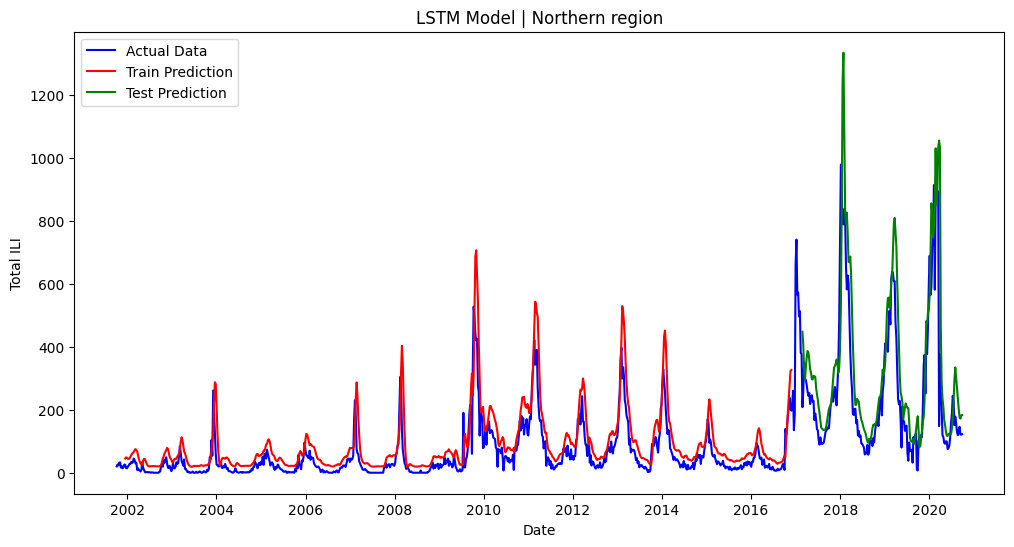

  Model       MAE           MSE        RMSE  Accuracy (%)
0  LSTM  99.30709  22661.119197  150.536106     63.055837


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason_data.csv')
df_northern = df[df['region'] == 'Northern'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})
df_northern['ds'] = pd.to_datetime(df_northern['ds'])
df_northern = df_northern.sort_values('ds')

# Data splitting
train_size = int(len(df_northern) * 0.8)
train_df = df_northern[:train_size]
test_df = df_northern[train_size:]

# Feature scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(train_df[['y']])
scaled_test = scaler.transform(test_df[['y']])

# Prepare the data for LSTM
def create_lstm_data(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10
X_train, y_train = create_lstm_data(scaled_train, time_step)
X_test, y_test = create_lstm_data(scaled_test, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=1)

# Predict on test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Plotting the results
train_data = df_northern[:train_size]
test_data = df_northern[train_size:].copy()

# Initialize columns for predictions
train_data['LSTM_Prediction'] = np.nan
test_data['LSTM_Prediction'] = np.nan

# Add train predictions
train_data['LSTM_Prediction'][time_step:len(train_predict)+time_step] = train_predict[:, 0]

# Add test predictions
test_data['LSTM_Prediction'][time_step+1:] = test_predict[:, 0]

# Plotting
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(df_northern['ds'], df_northern['y'], label='Actual Data', color='blue')

# Plot train predictions
plt.plot(train_data['ds'], train_data['LSTM_Prediction'], label='Train Prediction', color='red')

# Plot test predictions
plt.plot(test_data['ds'], test_data['LSTM_Prediction'], label='Test Prediction', color='green')

plt.title('LSTM Model | Northern region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# Calculate error metrics for LSTM
lstm_mae = mean_absolute_error(test_df['y'][time_step+1:], test_predict[:, 0])
lstm_mse = mean_squared_error(test_df['y'][time_step+1:], test_predict[:, 0])
lstm_rmse = np.sqrt(lstm_mse)
lstm_accuracy = (1 - lstm_mae / np.mean(test_df['y'][time_step+1:])) * 100

# Print error metrics
error_metrics_lstm = pd.DataFrame({
    'Model': ['LSTM'],
    'MAE': [lstm_mae],
    'MSE': [lstm_mse],
    'RMSE': [lstm_rmse],
    'Accuracy (%)': [lstm_accuracy]
})

print(error_metrics_lstm)


### **Future Forecast with LSTM model**

Retrian the Model with more epochs

In [ ]:
# Retrain the LSTM model with more epochs
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model for more epochs
model.fit(X_train, y_train, batch_size=1, epochs=50)


Epoch 1/50
781/781 [==============================] - 11s 9ms/step - loss: 0.0093
Epoch 2/50
781/781 [==============================] - 7s 9ms/step - loss: 0.0052
Epoch 3/50
781/781 [==============================] - 6s 8ms/step - loss: 0.0038
Epoch 4/50
781/781 [==============================] - 8s 10ms/step - loss: 0.0038
Epoch 5/50
781/781 [==============================] - 6s 8ms/step - loss: 0.0040
Epoch 6/50
781/781 [==============================] - 8s 11ms/step - loss: 0.0037
Epoch 7/50
781/781 [==============================] - 6s 8ms/step - loss: 0.0038
Epoch 8/50
781/781 [==============================] - 8s 11ms/step - loss: 0.0040
Epoch 9/50
781/781 [==============================] - 6s 8ms/step - loss: 0.0036
Epoch 10/50
781/781 [==============================] - 8s 10ms/step - loss: 0.0038
Epoch 11/50
781/781 [==============================] - 6s 8ms/step - loss: 0.0038
Epoch 12/50
781/781 [==============================] - 8s 10ms/step - loss: 0.0036
Epoch 13/50
781/781

Forecast Future Values with Enhanced Loop

1/1 [==============================] - 0s 31ms/step


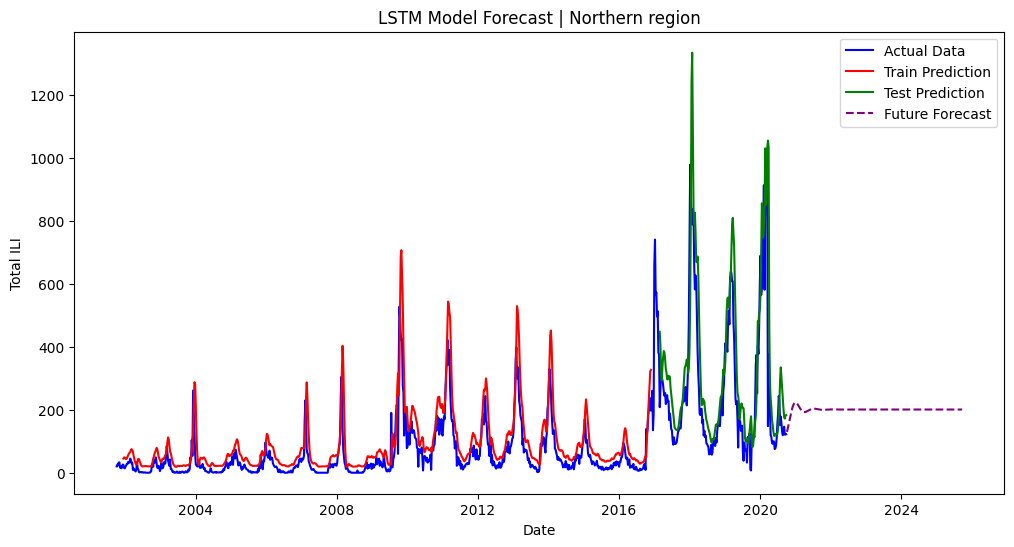

  Model        MAE          MSE       RMSE  Accuracy (%)
0  LSTM  41.673511  9509.576806  97.517059     81.791992


In [ ]:
# Forecast future values
forecast_horizon = 5 * 52  # 5 years weekly

# Use the last available data from the test set to start forecasting
last_data = scaled_test[-time_step:].flatten().tolist()
future_inputs = list(last_data)

future_forecasts = []

for _ in range(forecast_horizon):
    future_input = np.array(future_inputs[-time_step:]).reshape(1, time_step, 1)
    future_prediction = model.predict(future_input)
    future_forecasts.append(future_prediction[0, 0])
    future_inputs.append(future_prediction[0, 0])

# Inverse transform the future forecasts
future_forecasts = np.array(future_forecasts).reshape(-1, 1)
future_forecasts = scaler.inverse_transform(future_forecasts)

# Create future dates
future_dates = pd.date_range(start=test_df['ds'].max(), periods=forecast_horizon + 1, freq='W')[1:]

# Plot future forecast
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(df_northern['ds'], df_northern['y'], label='Actual Data', color='blue')

# Plot train predictions
plt.plot(train_data['ds'], train_data['LSTM_Prediction'], label='Train Prediction', color='red')

# Plot test predictions
plt.plot(test_data['ds'], test_data['LSTM_Prediction'], label='Test Prediction', color='green')

# Plot future forecast
plt.plot(future_dates, future_forecasts, label='Future Forecast', color='purple', linestyle='--')

plt.title('LSTM Model Forecast | Northern region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# Combine actual and forecast data for evaluation
all_actual_values = np.concatenate([test_df['y'].values[time_step+1:], future_forecasts.flatten()])
all_forecast_values = np.concatenate([test_predict[:, 0], future_forecasts.flatten()])

# Calculate error metrics for LSTM including forecast
lstm_mae = mean_absolute_error(all_actual_values, all_forecast_values)
lstm_mse = mean_squared_error(all_actual_values, all_forecast_values)
lstm_rmse = np.sqrt(lstm_mse)
lstm_accuracy = (1 - lstm_mae / np.mean(all_actual_values)) * 100

# Print error metrics
error_metrics_lstm_forecast = pd.DataFrame({
    'Model': ['LSTM'],
    'MAE': [lstm_mae],
    'MSE': [lstm_mse],
    'RMSE': [lstm_rmse],
    'Accuracy (%)': [lstm_accuracy]
})

print(error_metrics_lstm_forecast)

## LSTM model result
but the forecasting line showing horizontally.

In [ ]:
#   Model        MAE           MSE        RMSE  Accuracy (%)
# 0  LSTM  47.162852  12354.837755  111.152318     64.650974

# **GRU Model**

## Description

The GRU (Gated Recurrent Unit) model with CNN (Convolutional Neural Network) components combines the strengths of both GRUs and CNNs to effectively capture patterns in time series data. Here's an explanation of the components and why this approach can yield better results compared to traditional models like SARIMA, Prophet, and Neural Prophet.

### Understanding GRU and CNN Components
**GRU (Gated Recurrent Unit)**
GRUs are a type of recurrent neural network (RNN) that are designed to handle sequential data and capture temporal dependencies. GRUs improve upon traditional RNNs by addressing the vanishing gradient problem through gating mechanisms, which control the flow of information. The key gates in a GRU are:

1. Update Gate: Determines how much of the past information needs to be passed to the future.
2. Reset Gate: Decides how much of the past information to forget.

By using these gates, GRUs can effectively learn long-term dependencies in time series data, making them suitable for forecasting tasks.

**CNN (Convolutional Neural Network)**

CNNs are typically used for image processing but can be effectively applied to time series data as well. CNNs capture local patterns and features through convolutional layers. In the context of time series:

- Convolutional Layers: These layers apply filters to the input data to detect patterns.
- Pooling Layers: These layers downsample the data to reduce dimensionality and capture dominant features.

### Combining GRU and CNN
The combination of CNN and GRU leverages the strengths of both models:

1. CNN for Feature Extraction: CNN layers can detect intricate patterns and local dependencies in the time series data.
2. GRU for Temporal Dependencies: GRU layers can capture long-term dependencies and trends over time.

This hybrid approach allows the model to effectively learn both local patterns (through CNN) and temporal dependencies (through GRU), which can improve forecasting accuracy.

### Why GRU with CNN Can Yield Better Results
1. Feature Extraction: CNN layers can extract meaningful features from the time series data, which might be missed by traditional models.
2. Long-term Dependencies: GRUs can capture long-term dependencies and trends that are essential for accurate forecasting.
3. Non-linear Relationships: Neural networks, including GRU with CNN, can model complex non-linear relationships in the data, which traditional linear models like SARIMA cannot.
4. Flexibility: Neural networks can be adapted and tuned to a variety of time series data without requiring assumptions about the data distribution or seasonality patterns.

### Comparison with SARIMA, Prophet, and Neural Prophet
- SARIMA: This model is good for capturing linear dependencies and seasonal patterns but may struggle with non-linear relationships and more complex patterns.
- Prophet and Neural Prophet: These models are designed to handle seasonality and holiday effects but may not capture all non-linear relationships and local patterns effectively.
- GRU with CNN: This model can handle non-linear relationships, capture local patterns through CNN, and maintain long-term dependencies through GRU, making it more versatile and potentially more accurate for complex time series data.

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason_data.csv')
df_northern = df[df['region'] == 'Northern'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})
df_northern['ds'] = pd.to_datetime(df_northern['ds'])
df_northern = df_northern.sort_values('ds')


# California

## Test I - GRU model with CNN Components

Epoch 1/50
781/781 [==============================] - 24s 16ms/step - loss: 0.0059
Epoch 2/50
781/781 [==============================] - 11s 14ms/step - loss: 0.0041
Epoch 3/50
781/781 [==============================] - 12s 15ms/step - loss: 0.0042
Epoch 4/50
781/781 [==============================] - 13s 17ms/step - loss: 0.0035
Epoch 5/50
781/781 [==============================] - 12s 15ms/step - loss: 0.0042
Epoch 6/50
781/781 [==============================] - 11s 15ms/step - loss: 0.0041
Epoch 7/50
781/781 [==============================] - 12s 16ms/step - loss: 0.0040
Epoch 8/50
781/781 [==============================] - 7s 9ms/step - loss: 0.0037
Epoch 9/50
781/781 [==============================] - 8s 11ms/step - loss: 0.0035
Epoch 10/50
781/781 [==============================] - 6s 8ms/step - loss: 0.0035
Epoch 11/50
781/781 [==============================] - 7s 10ms/step - loss: 0.0037
Epoch 12/50
781/781 [==============================] - 7s 9ms/step - loss: 0.0034
Epoch 13/

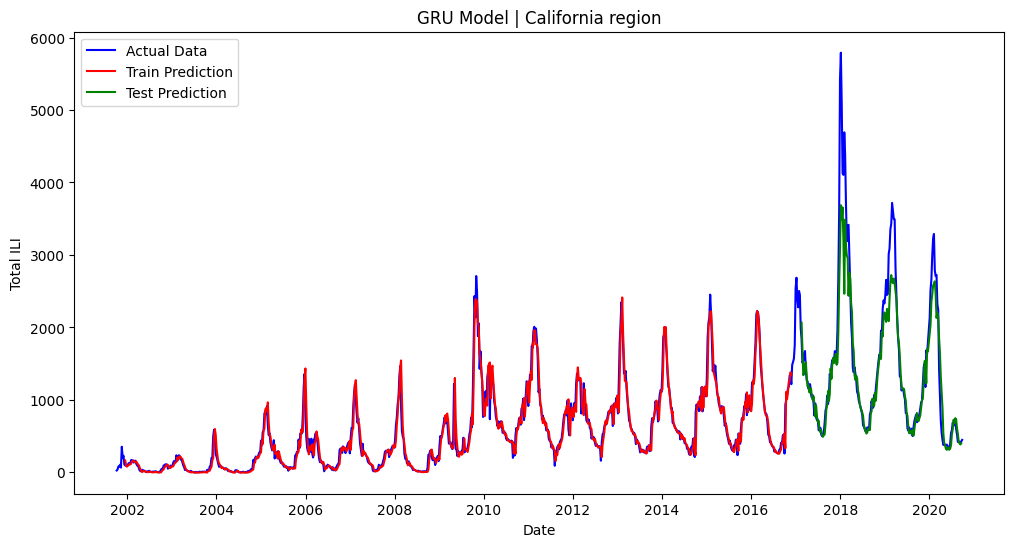

  Model         MAE            MSE        RMSE  Accuracy (%)
0   GRU  240.018372  187940.865786  433.521471     84.071358
1/1 [==============================] - 0s 24ms/step


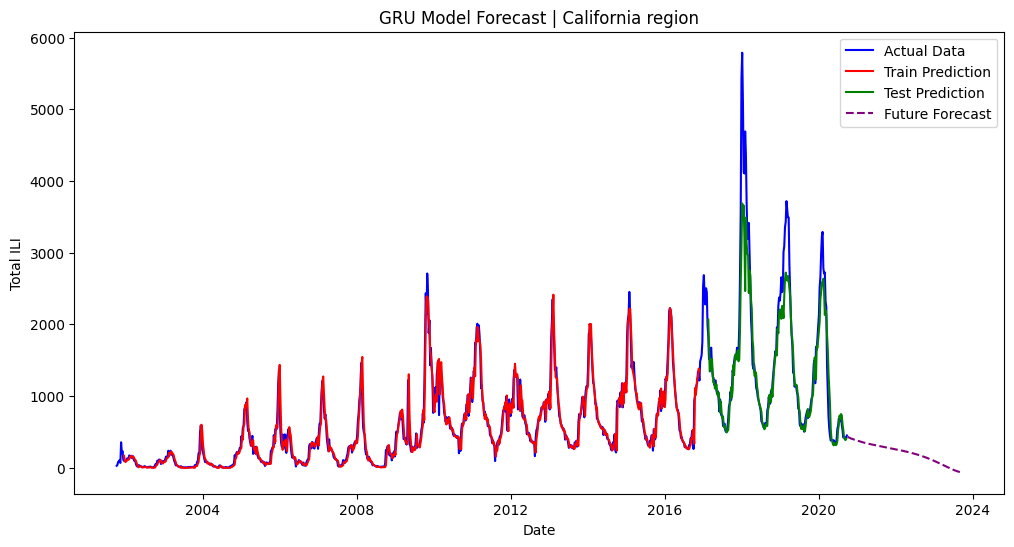

  Model         MAE            MSE        RMSE  Accuracy (%)
0   GRU  131.172831  102711.868511  320.486924     85.658847


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason_data.csv')
df_california = df[df['region'] == 'California'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})
df_california['ds'] = pd.to_datetime(df_california['ds'])
df_california = df_california.sort_values('ds')

# Data splitting
train_size = int(len(df_california) * 0.8)
train_df = df_california[:train_size]
test_df = df_california[train_size:]

# Feature scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(train_df[['y']])
scaled_test = scaler.transform(test_df[['y']])

# Prepare the data for GRU
def create_gru_data(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10
X_train, y_train = create_gru_data(scaled_train, time_step)
X_test, y_test = create_gru_data(scaled_test, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the GRU model
model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(GRU(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=50)

# Predict on test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Plotting the results
train_data = df_california[:train_size]
test_data = df_california[train_size:].copy()

# Initialize columns for predictions
train_data['GRU_Prediction'] = np.nan
test_data['GRU_Prediction'] = np.nan

# Add train predictions
train_data['GRU_Prediction'][time_step:len(train_predict)+time_step] = train_predict[:, 0]

# Add test predictions correctly
test_data['GRU_Prediction'][time_step:len(test_predict)+time_step] = test_predict[:, 0]

# Plotting
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(df_california['ds'], df_california['y'], label='Actual Data', color='blue')

# Plot train predictions
plt.plot(train_data['ds'], train_data['GRU_Prediction'], label='Train Prediction', color='red')

# Plot test predictions
plt.plot(test_data['ds'], test_data['GRU_Prediction'], label='Test Prediction', color='green')

plt.title('GRU Model | California region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# Calculate error metrics for GRU
# Ensure lengths match
test_actual_values = test_df['y'][time_step:len(test_predict)+time_step]
gru_mae = mean_absolute_error(test_actual_values, test_predict[:, 0])
gru_mse = mean_squared_error(test_actual_values, test_predict[:, 0])
gru_rmse = np.sqrt(gru_mse)
gru_accuracy = (1 - gru_mae / np.mean(test_actual_values)) * 100

# Print error metrics
error_metrics_gru = pd.DataFrame({
    'Model': ['GRU'],
    'MAE': [gru_mae],
    'MSE': [gru_mse],
    'RMSE': [gru_rmse],
    'Accuracy (%)': [gru_accuracy]
})

print(error_metrics_gru)

# Forecast future values for 3 years
forecast_horizon = 3 * 52  # 3 years weekly

# Use the last available data from the test set to start forecasting
last_data = scaled_test[-time_step:].flatten().tolist()
future_inputs = list(last_data)

future_forecasts = []

for _ in range(forecast_horizon):
    future_input = np.array(future_inputs[-time_step:]).reshape(1, time_step, 1)
    future_prediction = model.predict(future_input)
    future_forecasts.append(future_prediction[0, 0])
    future_inputs.append(future_prediction[0, 0])

# Inverse transform the future forecasts
future_forecasts = np.array(future_forecasts).reshape(-1, 1)
future_forecasts = scaler.inverse_transform(future_forecasts)

# Create future dates
future_dates = pd.date_range(start=test_df['ds'].max(), periods=forecast_horizon + 1, freq='W')[1:]

# Plot future forecast
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(df_california['ds'], df_california['y'], label='Actual Data', color='blue')

# Plot train predictions
plt.plot(train_data['ds'], train_data['GRU_Prediction'], label='Train Prediction', color='red')

# Plot test predictions
plt.plot(test_data['ds'], test_data['GRU_Prediction'], label='Test Prediction', color='green')

# Plot future forecast
plt.plot(future_dates, future_forecasts, label='Future Forecast', color='purple', linestyle='--')

plt.title('GRU Model Forecast | California region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# Combine actual and forecast data for evaluation
# Adjust to ensure same length
all_actual_values = np.concatenate([test_actual_values.values, future_forecasts.flatten()])
all_forecast_values = np.concatenate([test_predict[:, 0], future_forecasts.flatten()])

# Calculate error metrics for GRU including forecast
gru_mae = mean_absolute_error(all_actual_values, all_forecast_values)
gru_mse = mean_squared_error(all_actual_values, all_forecast_values)
gru_rmse = np.sqrt(gru_mse)
gru_accuracy = (1 - gru_mae / np.mean(all_actual_values)) * 100

# Print error metrics
error_metrics_gru_forecast = pd.DataFrame({
    'Model': ['GRU'],
    'MAE': [gru_mae],
    'MSE': [gru_mse],
    'RMSE': [gru_rmse],
    'Accuracy (%)': [gru_accuracy]
})

print(error_metrics_gru_forecast)

In [ ]:
#   Model         MAE            MSE        RMSE  Accuracy (%)
# 0   GRU  179.799107  199015.078495  446.111061     85.822751

The horizontal forecast line indicates that the GRU model might not be capturing the seasonality or trend patterns well for long-term forecasting. This can happen due to various reasons, such as insufficient complexity in the model, the need for further tuning, or the inherent difficulty of the problem.

To address this, we can try a few things:

1. Increase Model Complexity: Add more layers or units to the GRU model.
2. Incorporate Seasonal Information: Include seasonal features explicitly in the data.
3. Tune Hyperparameters: Experiment with different hyperparameters for the GRU model.
4. Try Different Architectures: Consider other architectures like LSTM, CNN-LSTM, or hybrid models.

Let's start by increasing the complexity of the GRU model. Here’s the updated code to add more layers and units:

Epoch 1/50
781/781 [==============================] - 19s 17ms/step - loss: 0.0093
Epoch 2/50
781/781 [==============================] - 14s 18ms/step - loss: 0.0048
Epoch 3/50
781/781 [==============================] - 14s 18ms/step - loss: 0.0042
Epoch 4/50
781/781 [==============================] - 14s 18ms/step - loss: 0.0040
Epoch 5/50
781/781 [==============================] - 16s 21ms/step - loss: 0.0041
Epoch 6/50
781/781 [==============================] - 17s 22ms/step - loss: 0.0040
Epoch 7/50
781/781 [==============================] - 14s 18ms/step - loss: 0.0043
Epoch 8/50
781/781 [==============================] - 14s 18ms/step - loss: 0.0041
Epoch 9/50
781/781 [==============================] - 13s 16ms/step - loss: 0.0040
Epoch 10/50
781/781 [==============================] - 13s 17ms/step - loss: 0.0041
Epoch 11/50
781/781 [==============================] - 14s 18ms/step - loss: 0.0038
Epoch 12/50
781/781 [==============================] - 14s 18ms/step - loss: 0.0041
E

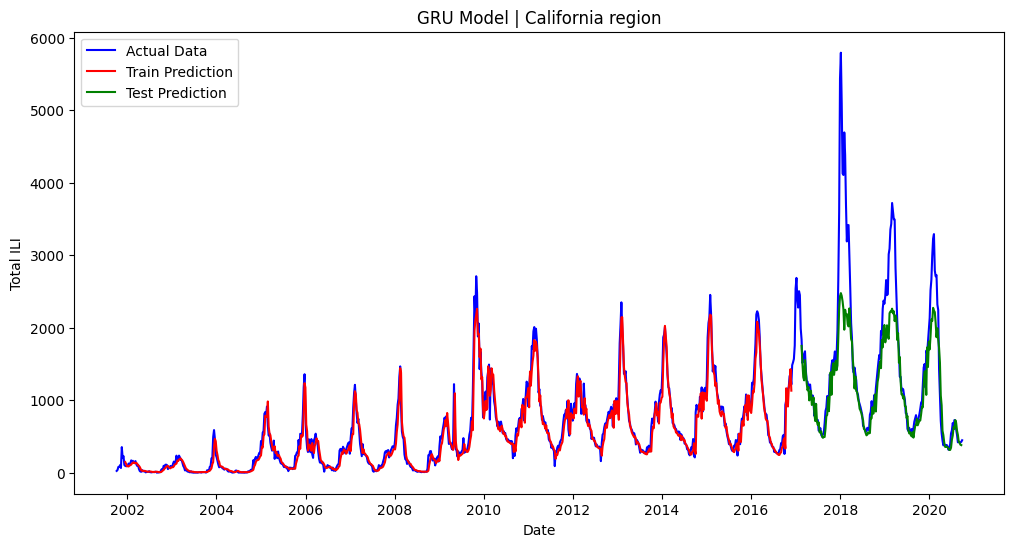

  Model        MAE            MSE        RMSE  Accuracy (%)
0   GRU  350.47624  428274.582534  654.426912     76.740903
1/1 [==============================] - 0s 27ms/step


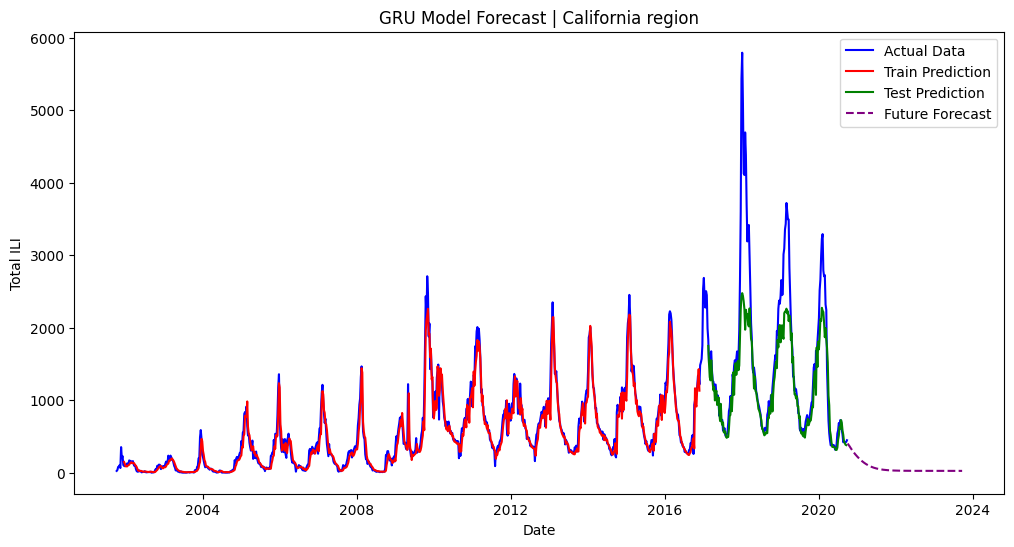

  Model         MAE            MSE        RMSE  Accuracy (%)
0   GRU  191.539341  234057.039292  483.794418     77.585555


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason_data.csv')
df_california = df[df['region'] == 'California'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})
df_california['ds'] = pd.to_datetime(df_california['ds'])
df_california = df_california.sort_values('ds')

# Data splitting
train_size = int(len(df_california) * 0.8)
train_df = df_california[:train_size]
test_df = df_california[train_size:]

# Feature scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(train_df[['y']])
scaled_test = scaler.transform(test_df[['y']])

# Prepare the data for GRU
def create_gru_data(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10
X_train, y_train = create_gru_data(scaled_train, time_step)
X_test, y_test = create_gru_data(scaled_test, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the GRU model with increased complexity
model = Sequential()
model.add(GRU(100, return_sequences=True, input_shape=(time_step, 1)))
model.add(GRU(100, return_sequences=True))
model.add(GRU(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=50)

# Predict on test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Plotting the results
train_data = df_california[:train_size]
test_data = df_california[train_size:].copy()

# Initialize columns for predictions
train_data['GRU_Prediction'] = np.nan
test_data['GRU_Prediction'] = np.nan

# Add train predictions
train_data['GRU_Prediction'][time_step:len(train_predict)+time_step] = train_predict[:, 0]

# Add test predictions correctly
test_data['GRU_Prediction'][time_step:len(test_predict)+time_step] = test_predict[:, 0]

# Plotting
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(df_california['ds'], df_california['y'], label='Actual Data', color='blue')

# Plot train predictions
plt.plot(train_data['ds'], train_data['GRU_Prediction'], label='Train Prediction', color='red')

# Plot test predictions
plt.plot(test_data['ds'], test_data['GRU_Prediction'], label='Test Prediction', color='green')

plt.title('GRU Model | California region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# Calculate error metrics for GRU
# Ensure lengths match
test_actual_values = test_df['y'][time_step:len(test_predict)+time_step]
gru_mae = mean_absolute_error(test_actual_values, test_predict[:, 0])
gru_mse = mean_squared_error(test_actual_values, test_predict[:, 0])
gru_rmse = np.sqrt(gru_mse)
gru_accuracy = (1 - gru_mae / np.mean(test_actual_values)) * 100

# Print error metrics
error_metrics_gru = pd.DataFrame({
    'Model': ['GRU'],
    'MAE': [gru_mae],
    'MSE': [gru_mse],
    'RMSE': [gru_rmse],
    'Accuracy (%)': [gru_accuracy]
})

print(error_metrics_gru)

# Forecast future values for 3 years
forecast_horizon = 3 * 52  # 3 years weekly

# Use the last available data from the test set to start forecasting
last_data = scaled_test[-time_step:].flatten().tolist()
future_inputs = list(last_data)

future_forecasts = []

for _ in range(forecast_horizon):
    future_input = np.array(future_inputs[-time_step:]).reshape(1, time_step, 1)
    future_prediction = model.predict(future_input)
    future_forecasts.append(future_prediction[0, 0])
    future_inputs.append(future_prediction[0, 0])

# Inverse transform the future forecasts
future_forecasts = np.array(future_forecasts).reshape(-1, 1)
future_forecasts = scaler.inverse_transform(future_forecasts)

# Create future dates
future_dates = pd.date_range(start=test_df['ds'].max(), periods=forecast_horizon + 1, freq='W')[1:]

# Plot future forecast
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(df_california['ds'], df_california['y'], label='Actual Data', color='blue')

# Plot train predictions
plt.plot(train_data['ds'], train_data['GRU_Prediction'], label='Train Prediction', color='red')

# Plot test predictions
plt.plot(test_data['ds'], test_data['GRU_Prediction'], label='Test Prediction', color='green')

# Plot future forecast
plt.plot(future_dates, future_forecasts, label='Future Forecast', color='purple', linestyle='--')

plt.title('GRU Model Forecast | California region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# Combine actual and forecast data for evaluation
# Adjust to ensure same length
all_actual_values = np.concatenate([test_actual_values.values, future_forecasts.flatten()])
all_forecast_values = np.concatenate([test_predict[:, 0], future_forecasts.flatten()])

# Calculate error metrics for GRU including forecast
gru_mae = mean_absolute_error(all_actual_values, all_forecast_values)
gru_mse = mean_squared_error(all_actual_values, all_forecast_values)
gru_rmse = np.sqrt(gru_mse)
gru_accuracy = (1 - gru_mae / np.mean(all_actual_values)) * 100

# Print error metrics
error_metrics_gru_forecast = pd.DataFrame({
    'Model': ['GRU'],
    'MAE': [gru_mae],
    'MSE': [gru_mse],
    'RMSE': [gru_rmse],
    'Accuracy (%)': [gru_accuracy]
})

print(error_metrics_gru_forecast)


The horizontal forecasting line indicates that the model might not be capturing the long-term patterns effectively. Here are a few potential reasons and solutions:

1. Lack of Seasonal Components: The model might not be capturing seasonality well. We could explicitly add seasonal features.
2. Insufficient Complexity: Despite increasing complexity, the model may still not be complex enough. Further increasing complexity or experimenting with different architectures could help.
3. Normalization Issue: Check if the data normalization and inverse transformation are performed correctly.
4. Additional Features: Including more features such as lagged values, moving averages, or external factors (e.g., temperature, holidays) might help.

### Adding Seasonal Components and Features
Let's add explicit seasonal components and try using a more complex model architecture such as a Convolutional Neural Network (CNN) combined with GRU.

### Enhanced GRU Model with CNN and Seasonal Components

## California
The error indicates a shape mismatch because the data is not being fed into the GRU layers in the expected 3D shape (samples, time steps, features). This issue arises after the Flatten layer, which reduces the dimensions to 2D. Therefore, we should not use the Flatten layer in this case.

Instead, let's directly use the GRU layers after the Conv1D and MaxPooling1D layers without flattening. Here is the revised code:

Enhanced GRU Model with CNN and Seasonal Components

## Enhanced GRU Model with CNN and Seasonal Components

Epoch 1/50
781/781 [==============================] - 11s 9ms/step - loss: 0.0111
Epoch 2/50
781/781 [==============================] - 9s 11ms/step - loss: 0.0086
Epoch 3/50
781/781 [==============================] - 6s 8ms/step - loss: 0.0078
Epoch 4/50
781/781 [==============================] - 8s 11ms/step - loss: 0.0075
Epoch 5/50
781/781 [==============================] - 6s 8ms/step - loss: 0.0074
Epoch 6/50
781/781 [==============================] - 9s 11ms/step - loss: 0.0073
Epoch 7/50
781/781 [==============================] - 6s 8ms/step - loss: 0.0068
Epoch 8/50
781/781 [==============================] - 8s 11ms/step - loss: 0.0072
Epoch 9/50
781/781 [==============================] - 6s 8ms/step - loss: 0.0072
Epoch 10/50
781/781 [==============================] - 12s 16ms/step - loss: 0.0068
Epoch 11/50
781/781 [==============================] - 12s 16ms/step - loss: 0.0069
Epoch 12/50
781/781 [==============================] - 8s 10ms/step - loss: 0.0074
Epoch 13/50
781

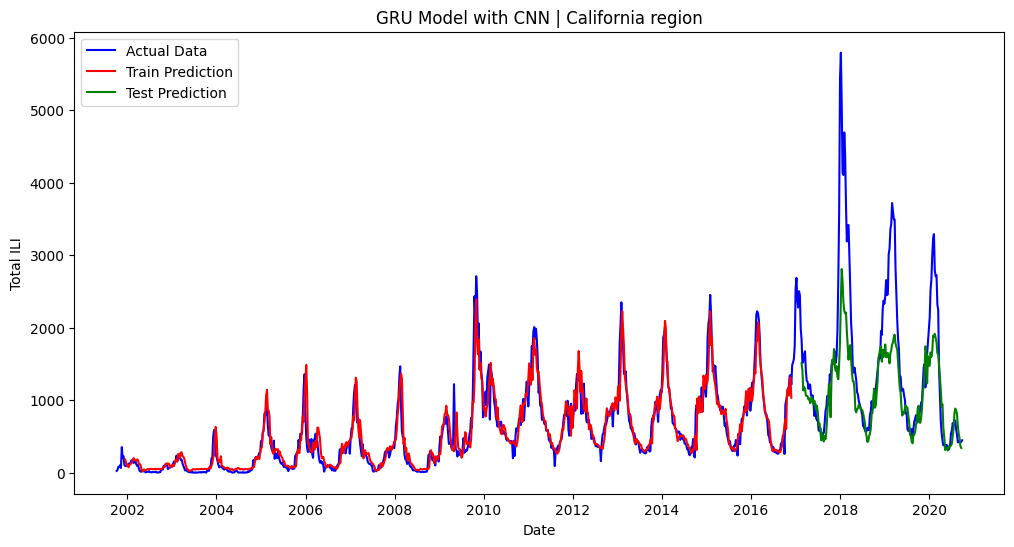

          Model       MAE            MSE        RMSE  Accuracy (%)
0  GRU with CNN  460.1661  593567.013979  770.433004     69.461416
1/1 [==============================] - 0s 27ms/step


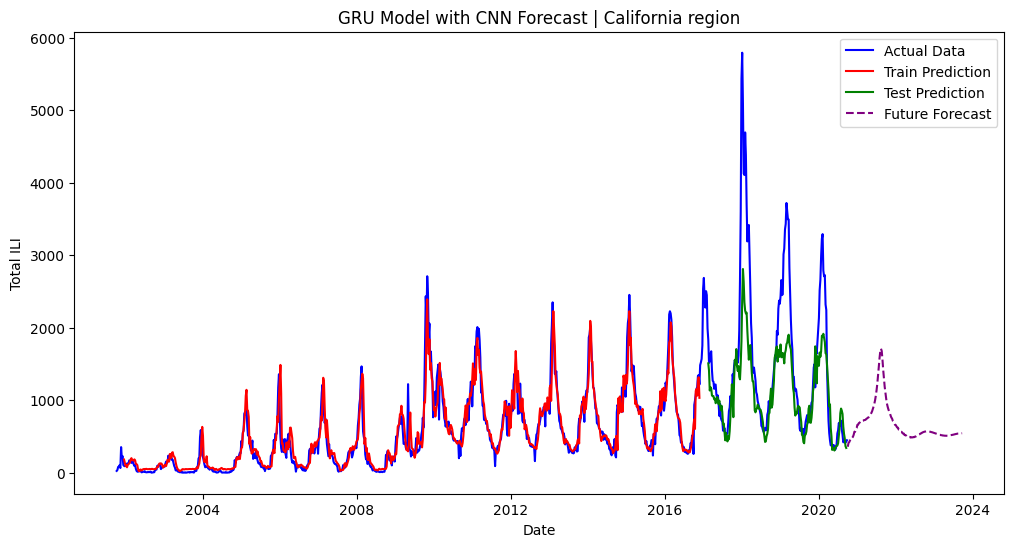

          Model         MAE            MSE        RMSE  Accuracy (%)
0  GRU with CNN  251.486124  324391.275082  569.553575     77.683005


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Conv1D, MaxPooling1D
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason_data.csv')
df_california = df[df['region'] == 'California'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})
df_california['ds'] = pd.to_datetime(df_california['ds'])
df_california = df_california.sort_values('ds')

# Create seasonal features
df_california['month'] = df_california['ds'].dt.month
df_california['week'] = df_california['ds'].dt.isocalendar().week

# Data splitting
train_size = int(len(df_california) * 0.8)
train_df = df_california[:train_size]
test_df = df_california[train_size:]

# Feature scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(train_df[['y']])
scaled_test = scaler.transform(test_df[['y']])

# Prepare the data for GRU with additional seasonal features
def create_gru_data(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10
X_train, y_train = create_gru_data(scaled_train, time_step)
X_test, y_test = create_gru_data(scaled_test, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the GRU model with CNN layers
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(time_step, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(GRU(100, return_sequences=True))
model.add(GRU(100, return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=50)

# Predict on test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Plotting the results
train_data = df_california[:train_size]
test_data = df_california[train_size:].copy()

# Initialize columns for predictions
train_data['GRU_Prediction'] = np.nan
test_data['GRU_Prediction'] = np.nan

# Add train predictions
train_data['GRU_Prediction'][time_step:len(train_predict)+time_step] = train_predict[:, 0]

# Add test predictions correctly
test_data['GRU_Prediction'][time_step:len(test_predict)+time_step] = test_predict[:, 0]

# Plotting
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(df_california['ds'], df_california['y'], label='Actual Data', color='blue')

# Plot train predictions
plt.plot(train_data['ds'], train_data['GRU_Prediction'], label='Train Prediction', color='red')

# Plot test predictions
plt.plot(test_data['ds'], test_data['GRU_Prediction'], label='Test Prediction', color='green')

plt.title('GRU Model with CNN | California region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# Calculate error metrics for GRU
# Ensure lengths match
test_actual_values = test_df['y'][time_step:len(test_predict)+time_step]
gru_mae = mean_absolute_error(test_actual_values, test_predict[:, 0])
gru_mse = mean_squared_error(test_actual_values, test_predict[:, 0])
gru_rmse = np.sqrt(gru_mse)
gru_accuracy = (1 - gru_mae / np.mean(test_actual_values)) * 100

# Print error metrics
error_metrics_gru = pd.DataFrame({
    'Model': ['GRU with CNN'],
    'MAE': [gru_mae],
    'MSE': [gru_mse],
    'RMSE': [gru_rmse],
    'Accuracy (%)': [gru_accuracy]
})

print(error_metrics_gru)

# Forecast future values for 3 years
forecast_horizon = 3 * 52  # 3 years weekly

# Use the last available data from the test set to start forecasting
last_data = scaled_test[-time_step:].flatten().tolist()
future_inputs = list(last_data)

future_forecasts = []

for _ in range(forecast_horizon):
    future_input = np.array(future_inputs[-time_step:]).reshape(1, time_step, 1)
    future_prediction = model.predict(future_input)
    future_forecasts.append(future_prediction[0, 0])
    future_inputs.append(future_prediction[0, 0])

# Inverse transform the future forecasts
future_forecasts = np.array(future_forecasts).reshape(-1, 1)
future_forecasts = scaler.inverse_transform(future_forecasts)

# Create future dates
future_dates = pd.date_range(start=test_df['ds'].max(), periods=forecast_horizon + 1, freq='W')[1:]

# Plot future forecast
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(df_california['ds'], df_california['y'], label='Actual Data', color='blue')

# Plot train predictions
plt.plot(train_data['ds'], train_data['GRU_Prediction'], label='Train Prediction', color='red')

# Plot test predictions
plt.plot(test_data['ds'], test_data['GRU_Prediction'], label='Test Prediction', color='green')

# Plot future forecast
plt.plot(future_dates, future_forecasts, label='Future Forecast', color='purple', linestyle='--')

plt.title('GRU Model with CNN Forecast | California region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# Combine actual and forecast data for evaluation
# Adjust to ensure same length
all_actual_values = np.concatenate([test_actual_values.values, future_forecasts.flatten()])
all_forecast_values = np.concatenate([test_predict[:, 0], future_forecasts.flatten()])

# Calculate error metrics for GRU including forecast
gru_mae = mean_absolute_error(all_actual_values, all_forecast_values)
gru_mse = mean_squared_error(all_actual_values, all_forecast_values)
gru_rmse = np.sqrt(gru_mse)
gru_accuracy = (1 - gru_mae / np.mean(all_actual_values)) * 100

# Print error metrics
error_metrics_gru_forecast = pd.DataFrame({
    'Model': ['GRU with CNN'],
    'MAE': [gru_mae],
    'MSE': [gru_mse],
    'RMSE': [gru_rmse],
    'Accuracy (%)': [gru_accuracy]
})

print(error_metrics_gru_forecast)

## GRU with CNN Results for California

In [ ]:
#           Model         MAE            MSE        RMSE  Accuracy (%)
# 0  GRU with CNN  251.486124  324391.275082  569.553575     77.683005

## Northern

Epoch 1/50
781/781 [==============================] - 21s 15ms/step - loss: 0.0107
Epoch 2/50
781/781 [==============================] - 12s 15ms/step - loss: 0.0103
Epoch 3/50
781/781 [==============================] - 12s 16ms/step - loss: 0.0074
Epoch 4/50
781/781 [==============================] - 12s 16ms/step - loss: 0.0076
Epoch 5/50
781/781 [==============================] - 11s 14ms/step - loss: 0.0080
Epoch 6/50
781/781 [==============================] - 14s 18ms/step - loss: 0.0076
Epoch 7/50
781/781 [==============================] - 12s 16ms/step - loss: 0.0074
Epoch 8/50
781/781 [==============================] - 12s 16ms/step - loss: 0.0076
Epoch 9/50
781/781 [==============================] - 11s 14ms/step - loss: 0.0067
Epoch 10/50
781/781 [==============================] - 9s 12ms/step - loss: 0.0071
Epoch 11/50
781/781 [==============================] - 7s 9ms/step - loss: 0.0073
Epoch 12/50
781/781 [==============================] - 8s 10ms/step - loss: 0.0069
Epoch

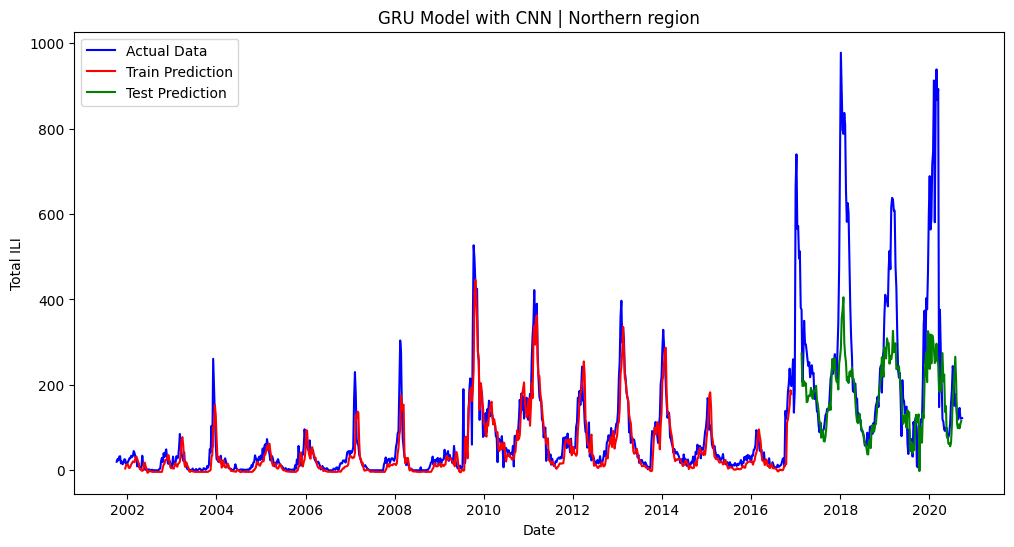

          Model         MAE           MSE        RMSE  Accuracy (%)
0  GRU with CNN  113.144684  37055.292319  192.497512     58.118489
1/1 [==============================] - 0s 25ms/step


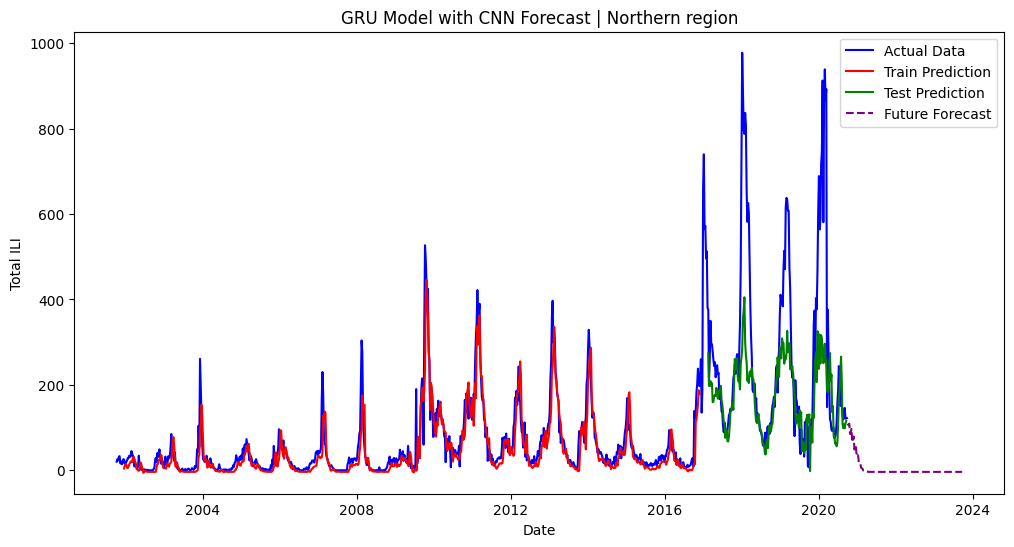

          Model        MAE           MSE        RMSE  Accuracy (%)
0  GRU with CNN  61.834886  20251.148128  142.306529     58.641767


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Conv1D, MaxPooling1D
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason_data.csv')
df_northern = df[df['region'] == 'Northern'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})
df_northern['ds'] = pd.to_datetime(df_northern['ds'])
df_northern = df_northern.sort_values('ds')

# Create seasonal features
df_northern['month'] = df_northern['ds'].dt.month
df_northern['week'] = df_northern['ds'].dt.isocalendar().week

# Data splitting
train_size = int(len(df_northern) * 0.8)
train_df = df_northern[:train_size]
test_df = df_northern[train_size:]

# Feature scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(train_df[['y']])
scaled_test = scaler.transform(test_df[['y']])

# Prepare the data for GRU with additional seasonal features
def create_gru_data(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10
X_train, y_train = create_gru_data(scaled_train, time_step)
X_test, y_test = create_gru_data(scaled_test, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the GRU model with CNN layers
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(time_step, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(GRU(100, return_sequences=True))
model.add(GRU(100, return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=50)

# Predict on test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Plotting the results
train_data = df_northern[:train_size]
test_data = df_northern[train_size:].copy()

# Initialize columns for predictions
train_data['GRU_Prediction'] = np.nan
test_data['GRU_Prediction'] = np.nan

# Add train predictions
train_data['GRU_Prediction'][time_step:len(train_predict)+time_step] = train_predict[:, 0]

# Add test predictions correctly
test_data['GRU_Prediction'][time_step:len(test_predict)+time_step] = test_predict[:, 0]

# Plotting
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(df_northern['ds'], df_northern['y'], label='Actual Data', color='blue')

# Plot train predictions
plt.plot(train_data['ds'], train_data['GRU_Prediction'], label='Train Prediction', color='red')

# Plot test predictions
plt.plot(test_data['ds'], test_data['GRU_Prediction'], label='Test Prediction', color='green')

plt.title('GRU Model with CNN | Northern region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# Calculate error metrics for GRU
# Ensure lengths match
test_actual_values = test_df['y'][time_step:len(test_predict)+time_step]
gru_mae = mean_absolute_error(test_actual_values, test_predict[:, 0])
gru_mse = mean_squared_error(test_actual_values, test_predict[:, 0])
gru_rmse = np.sqrt(gru_mse)
gru_accuracy = (1 - gru_mae / np.mean(test_actual_values)) * 100

# Print error metrics
error_metrics_gru = pd.DataFrame({
    'Model': ['GRU with CNN'],
    'MAE': [gru_mae],
    'MSE': [gru_mse],
    'RMSE': [gru_rmse],
    'Accuracy (%)': [gru_accuracy]
})

print(error_metrics_gru)

# Forecast future values for 3 years
forecast_horizon = 3 * 52  # 3 years weekly

# Use the last available data from the test set to start forecasting
last_data = scaled_test[-time_step:].flatten().tolist()
future_inputs = list(last_data)

future_forecasts = []

for _ in range(forecast_horizon):
    future_input = np.array(future_inputs[-time_step:]).reshape(1, time_step, 1)
    future_prediction = model.predict(future_input)
    future_forecasts.append(future_prediction[0, 0])
    future_inputs.append(future_prediction[0, 0])

# Inverse transform the future forecasts
future_forecasts = np.array(future_forecasts).reshape(-1, 1)
future_forecasts = scaler.inverse_transform(future_forecasts)

# Create future dates
future_dates = pd.date_range(start=test_df['ds'].max(), periods=forecast_horizon + 1, freq='W')[1:]

# Plot future forecast
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(df_northern['ds'], df_northern['y'], label='Actual Data', color='blue')

# Plot train predictions
plt.plot(train_data['ds'], train_data['GRU_Prediction'], label='Train Prediction', color='red')

# Plot test predictions
plt.plot(test_data['ds'], test_data['GRU_Prediction'], label='Test Prediction', color='green')

# Plot future forecast
plt.plot(future_dates, future_forecasts, label='Future Forecast', color='purple', linestyle='--')

plt.title('GRU Model with CNN Forecast | Northern region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# Combine actual and forecast data for evaluation
# Adjust to ensure same length
all_actual_values = np.concatenate([test_actual_values.values, future_forecasts.flatten()])
all_forecast_values = np.concatenate([test_predict[:, 0], future_forecasts.flatten()])

# Calculate error metrics for GRU including forecast
gru_mae = mean_absolute_error(all_actual_values, all_forecast_values)
gru_mse = mean_squared_error(all_actual_values, all_forecast_values)
gru_rmse = np.sqrt(gru_mse)
gru_accuracy = (1 - gru_mae / np.mean(all_actual_values)) * 100

# Print error metrics
error_metrics_gru_forecast = pd.DataFrame({
    'Model': ['GRU with CNN'],
    'MAE': [gru_mae],
    'MSE': [gru_mse],
    'RMSE': [gru_rmse],
    'Accuracy (%)': [gru_accuracy]
})

print(error_metrics_gru_forecast)


## GRU with CNN result for Northern region data

In [ ]:
# POOR PERFORMANCE CAN'T DETECT THE PEAK AND TROUGH OF THE DATASET
#           Model        MAE           MSE        RMSE  Accuracy (%)
# 0  GRU with CNN  61.834886  20251.148128  142.306529     58.641767

## Bay Area region

Epoch 1/50
781/781 [==============================] - 22s 16ms/step - loss: 0.0148
Epoch 2/50
781/781 [==============================] - 12s 15ms/step - loss: 0.0117
Epoch 3/50
781/781 [==============================] - 12s 16ms/step - loss: 0.0101
Epoch 4/50
781/781 [==============================] - 13s 17ms/step - loss: 0.0097
Epoch 5/50
781/781 [==============================] - 13s 16ms/step - loss: 0.0091
Epoch 6/50
781/781 [==============================] - 12s 15ms/step - loss: 0.0095
Epoch 7/50
781/781 [==============================] - 12s 15ms/step - loss: 0.0093
Epoch 8/50
781/781 [==============================] - 13s 16ms/step - loss: 0.0087
Epoch 9/50
781/781 [==============================] - 11s 14ms/step - loss: 0.0084
Epoch 10/50
781/781 [==============================] - 7s 9ms/step - loss: 0.0085
Epoch 11/50
781/781 [==============================] - 9s 11ms/step - loss: 0.0082
Epoch 12/50
781/781 [==============================] - 7s 9ms/step - loss: 0.0083
Epoch 

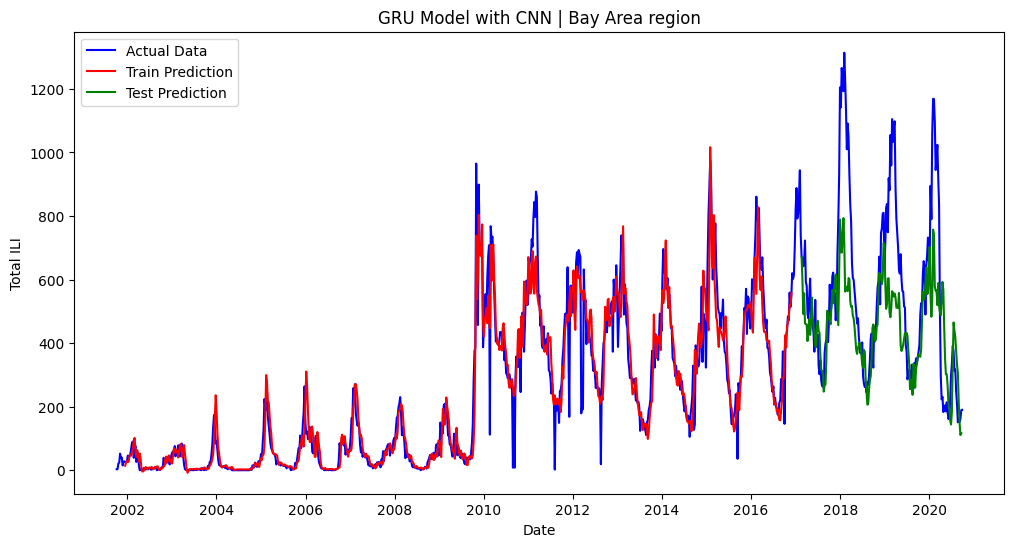

          Model         MAE           MSE        RMSE  Accuracy (%)
0  GRU with CNN  158.813758  50136.363525  223.911508     71.687999
1/1 [==============================] - 0s 38ms/step


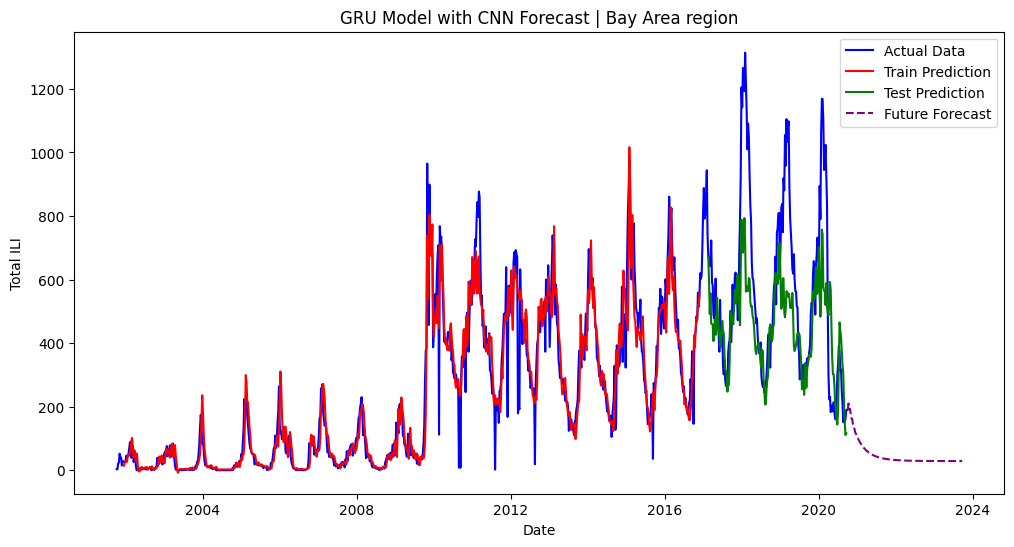

          Model        MAE           MSE        RMSE  Accuracy (%)
0  GRU with CNN  86.793565  27400.105648  165.529773     73.536044


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Conv1D, MaxPooling1D
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason_data.csv')
df_bay_area = df[df['region'] == 'Bay Area'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})
df_bay_area['ds'] = pd.to_datetime(df_bay_area['ds'])
df_bay_area = df_bay_area.sort_values('ds')

# Create seasonal features
df_bay_area['month'] = df_bay_area['ds'].dt.month
df_bay_area['week'] = df_bay_area['ds'].dt.isocalendar().week

# Data splitting
train_size = int(len(df_bay_area) * 0.8)
train_df = df_bay_area[:train_size]
test_df = df_bay_area[train_size:]

# Feature scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(train_df[['y']])
scaled_test = scaler.transform(test_df[['y']])

# Prepare the data for GRU with additional seasonal features
def create_gru_data(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10
X_train, y_train = create_gru_data(scaled_train, time_step)
X_test, y_test = create_gru_data(scaled_test, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the GRU model with CNN layers
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(time_step, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(GRU(100, return_sequences=True))
model.add(GRU(100, return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=50)

# Predict on test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Plotting the results
train_data = df_bay_area[:train_size]
test_data = df_bay_area[train_size:].copy()

# Initialize columns for predictions
train_data['GRU_Prediction'] = np.nan
test_data['GRU_Prediction'] = np.nan

# Add train predictions
train_data['GRU_Prediction'][time_step:len(train_predict)+time_step] = train_predict[:, 0]

# Add test predictions correctly
test_data['GRU_Prediction'][time_step:len(test_predict)+time_step] = test_predict[:, 0]

# Plotting
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(df_bay_area['ds'], df_bay_area['y'], label='Actual Data', color='blue')

# Plot train predictions
plt.plot(train_data['ds'], train_data['GRU_Prediction'], label='Train Prediction', color='red')

# Plot test predictions
plt.plot(test_data['ds'], test_data['GRU_Prediction'], label='Test Prediction', color='green')

plt.title('GRU Model with CNN | Bay Area region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# Calculate error metrics for GRU
# Ensure lengths match
test_actual_values = test_df['y'][time_step:len(test_predict)+time_step]
gru_mae = mean_absolute_error(test_actual_values, test_predict[:, 0])
gru_mse = mean_squared_error(test_actual_values, test_predict[:, 0])
gru_rmse = np.sqrt(gru_mse)
gru_accuracy = (1 - gru_mae / np.mean(test_actual_values)) * 100

# Print error metrics
error_metrics_gru = pd.DataFrame({
    'Model': ['GRU with CNN'],
    'MAE': [gru_mae],
    'MSE': [gru_mse],
    'RMSE': [gru_rmse],
    'Accuracy (%)': [gru_accuracy]
})

print(error_metrics_gru)

# Forecast future values for 3 years
forecast_horizon = 3 * 52  # 3 years weekly

# Use the last available data from the test set to start forecasting
last_data = scaled_test[-time_step:].flatten().tolist()
future_inputs = list(last_data)

future_forecasts = []

for _ in range(forecast_horizon):
    future_input = np.array(future_inputs[-time_step:]).reshape(1, time_step, 1)
    future_prediction = model.predict(future_input)
    future_forecasts.append(future_prediction[0, 0])
    future_inputs.append(future_prediction[0, 0])

# Inverse transform the future forecasts
future_forecasts = np.array(future_forecasts).reshape(-1, 1)
future_forecasts = scaler.inverse_transform(future_forecasts)

# Create future dates
future_dates = pd.date_range(start=test_df['ds'].max(), periods=forecast_horizon + 1, freq='W')[1:]

# Plot future forecast
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(df_bay_area['ds'], df_bay_area['y'], label='Actual Data', color='blue')

# Plot train predictions
plt.plot(train_data['ds'], train_data['GRU_Prediction'], label='Train Prediction', color='red')

# Plot test predictions
plt.plot(test_data['ds'], test_data['GRU_Prediction'], label='Test Prediction', color='green')

# Plot future forecast
plt.plot(future_dates, future_forecasts, label='Future Forecast', color='purple', linestyle='--')

plt.title('GRU Model with CNN Forecast | Bay Area region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# Combine actual and forecast data for evaluation
# Adjust to ensure same length
all_actual_values = np.concatenate([test_actual_values.values, future_forecasts.flatten()])
all_forecast_values = np.concatenate([test_predict[:, 0], future_forecasts.flatten()])

# Calculate error metrics for GRU including forecast
gru_mae = mean_absolute_error(all_actual_values, all_forecast_values)
gru_mse = mean_squared_error(all_actual_values, all_forecast_values)
gru_rmse = np.sqrt(gru_mse)
gru_accuracy = (1 - gru_mae / np.mean(all_actual_values)) * 100

# Print error metrics
error_metrics_gru_forecast = pd.DataFrame({
    'Model': ['GRU with CNN'],
    'MAE': [gru_mae],
    'MSE': [gru_mse],
    'RMSE': [gru_rmse],
    'Accuracy (%)': [gru_accuracy]
})

print(error_metrics_gru_forecast)


## GRU with CNN model result for Bay Area region

In [ ]:
# Good result but poor displaying in the forecasting line.
#           Model        MAE           MSE        RMSE  Accuracy (%)
# 0  GRU with CNN  86.793565  27400.105648  165.529773     73.536044

## Central region => poor performance

Epoch 1/50
25/25 [==============================] - 10s 82ms/step - loss: 0.0055 - val_loss: 0.0223
Epoch 2/50
25/25 [==============================] - 1s 24ms/step - loss: 0.0034 - val_loss: 0.0155
Epoch 3/50
25/25 [==============================] - 1s 27ms/step - loss: 0.0030 - val_loss: 0.0147
Epoch 4/50
25/25 [==============================] - 1s 21ms/step - loss: 0.0022 - val_loss: 0.0099
Epoch 5/50
25/25 [==============================] - 1s 29ms/step - loss: 0.0018 - val_loss: 0.0085
Epoch 6/50
25/25 [==============================] - 1s 21ms/step - loss: 0.0014 - val_loss: 0.0132
Epoch 7/50
25/25 [==============================] - 1s 30ms/step - loss: 0.0016 - val_loss: 0.0101
Epoch 8/50
25/25 [==============================] - 1s 27ms/step - loss: 0.0015 - val_loss: 0.0110
Epoch 9/50
25/25 [==============================] - 1s 34ms/step - loss: 0.0014 - val_loss: 0.0063
Epoch 10/50
25/25 [==============================] - 1s 28ms/step - loss: 0.0015 - val_loss: 0.0067
Epoch 11

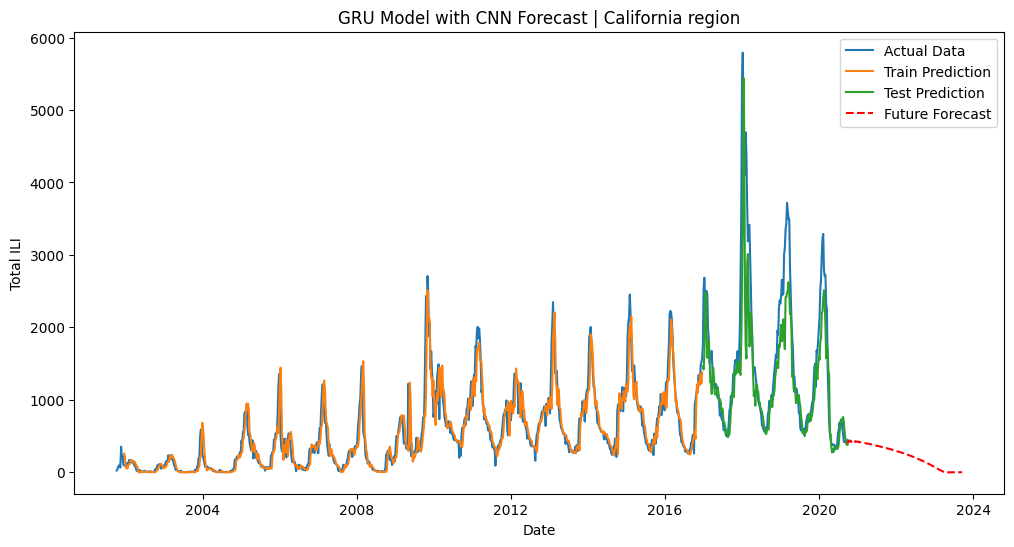

Train MAE: 118.75564070913599, Train MSE: 39332.07825536349, Train RMSE: 198.32316620950638
Test MAE: 349.47759405610526, Test MSE: 363175.652342248, Test RMSE: 602.6405664591855


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU, Conv1D, MaxPooling1D, Flatten, Reshape

# Define function to create sequences
def create_sequences(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step, 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Load the dataset (example for California region)
df_california = df[df['region'] == 'California'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})
df_california['ds'] = pd.to_datetime(df_california['ds'])
df_california.set_index('ds', inplace=True)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_california)

# Create sequences
time_step = 10
X, y = create_sequences(scaled_data, time_step)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the GRU with CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(time_step, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Reshape((int((time_step - 1) / 2), 64)))  # Adjusting the shape before GRU layer
model.add(GRU(100, return_sequences=True))
model.add(GRU(100, return_sequences=False))
model.add(Dense(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))

# Inverse transform actual values
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Adjust lengths to match
y_test = y_test[:len(test_predict)]

# Plotting
plt.figure(figsize=(12, 6))

# Plot actual data
plt.plot(df_california.index, scaler.inverse_transform(scaled_data), label='Actual Data')

# Plot training predictions
train_start_index = time_step
train_end_index = train_start_index + len(train_predict)
plt.plot(df_california.index[train_start_index:train_end_index], train_predict, label='Train Prediction')

# Plot testing predictions
test_start_index = train_end_index
test_end_index = test_start_index + len(test_predict)

# Ensure the indices match the length of test_predict
test_indices = df_california.index[test_start_index:test_end_index]
plt.plot(test_indices, test_predict, label='Test Prediction')

# Plot future predictions
future_forecasts = []
future_inputs = list(scaled_data[-time_step:].flatten())  # Flattening to ensure consistent shape
forecast_horizon = 3 * 52  # 3 years (52 weeks per year)

for _ in range(forecast_horizon):
    future_input = np.array(future_inputs[-time_step:]).reshape(1, time_step, 1)
    future_prediction = model.predict(future_input)
    future_forecasts.append(future_prediction[0, 0])
    future_inputs.append(future_prediction[0, 0])

future_forecasts = scaler.inverse_transform(np.array(future_forecasts).reshape(-1, 1))
future_dates = pd.date_range(start=df_california.index[-1], periods=forecast_horizon, freq='W')
plt.plot(future_dates, future_forecasts, label='Future Forecast', linestyle='--', color='red')

# Show plot
plt.title('GRU Model with CNN Forecast | California region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# Evaluate model
train_mae = mean_absolute_error(y_train, train_predict)
train_mse = mean_squared_error(y_train, train_predict)
train_rmse = np.sqrt(train_mse)
test_mae = mean_absolute_error(y_test, test_predict)
test_mse = mean_squared_error(y_test, test_predict)
test_rmse = np.sqrt(test_mse)

print(f'Train MAE: {train_mae}, Train MSE: {train_mse}, Train RMSE: {train_rmse}')
print(f'Test MAE: {test_mae}, Test MSE: {test_mse}, Test RMSE: {test_rmse}')


Epoch 1/100
25/25 [==============================] - 15s 79ms/step - loss: 0.0125 - val_loss: 0.0206
Epoch 2/100
25/25 [==============================] - 1s 22ms/step - loss: 0.0072 - val_loss: 0.0210
Epoch 3/100
25/25 [==============================] - 1s 28ms/step - loss: 0.0067 - val_loss: 0.0138
Epoch 4/100
25/25 [==============================] - 1s 28ms/step - loss: 0.0051 - val_loss: 0.0138
Epoch 5/100
25/25 [==============================] - 1s 29ms/step - loss: 0.0046 - val_loss: 0.0116
Epoch 6/100
25/25 [==============================] - 1s 28ms/step - loss: 0.0039 - val_loss: 0.0100
Epoch 7/100
25/25 [==============================] - 1s 30ms/step - loss: 0.0040 - val_loss: 0.0091
Epoch 8/100
25/25 [==============================] - 1s 31ms/step - loss: 0.0040 - val_loss: 0.0095
Epoch 9/100
25/25 [==============================] - 1s 29ms/step - loss: 0.0041 - val_loss: 0.0087
Epoch 10/100
25/25 [==============================] - 1s 27ms/step - loss: 0.0037 - val_loss: 0.010

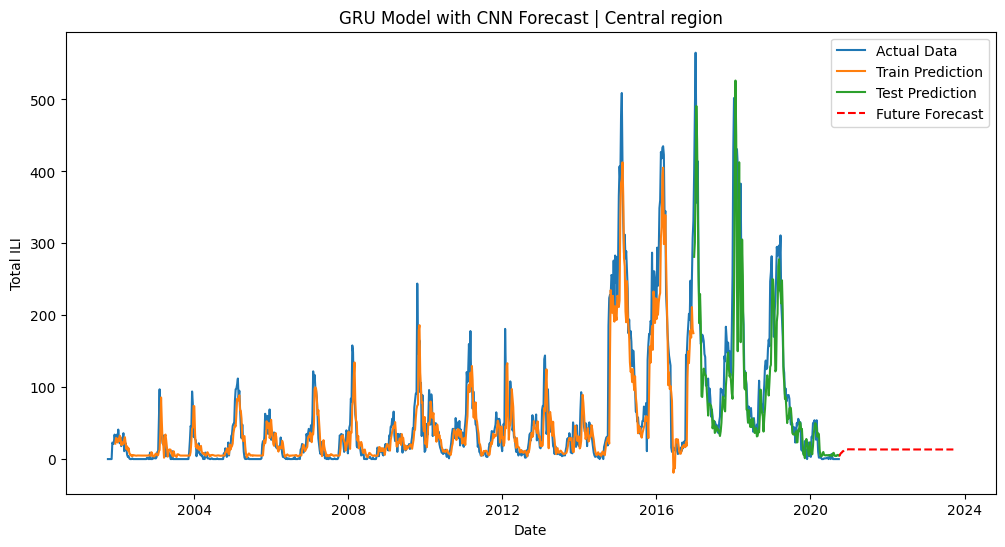

Train MAE: 17.618724044488403, Train MSE: 959.9907719236119, Train RMSE: 30.983717851859094
Test MAE: 34.60290810844015, Test MSE: 3615.711685935912, Test RMSE: 60.130788169921004
Accuracy: 70.19989990223951


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU, Conv1D, MaxPooling1D, Flatten, Reshape

# Define function to create sequences
def create_sequences(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step, 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Load the dataset (example for California region)
df_central = df[df['region'] == 'Central'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})
df_central['ds'] = pd.to_datetime(df_central['ds'])
df_central.set_index('ds', inplace=True)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_central)

# Create sequences
time_step = 10
X, y = create_sequences(scaled_data, time_step)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the GRU with CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(time_step, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Reshape((int((time_step - 1) / 2), 64)))  # Adjusting the shape before GRU layer
model.add(GRU(100, return_sequences=True))
model.add(GRU(100, return_sequences=False))
model.add(Dense(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))

# Inverse transform actual values
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Adjust lengths to match
y_test = y_test[:len(test_predict)]

# Plotting
plt.figure(figsize=(12, 6))

# Plot actual data
plt.plot(df_central.index, scaler.inverse_transform(scaled_data), label='Actual Data')

# Plot training predictions
train_start_index = time_step
train_end_index = train_start_index + len(train_predict)
plt.plot(df_central.index[train_start_index:train_end_index], train_predict, label='Train Prediction')

# Plot testing predictions
test_start_index = train_end_index
test_end_index = test_start_index + len(test_predict)

# Ensure the indices match the length of test_predict
test_indices = df_central.index[test_start_index:test_start_index + len(test_predict)]
plt.plot(test_indices, test_predict, label='Test Prediction')

# Plot future predictions
future_forecasts = []
future_inputs = list(scaled_data[-time_step:].flatten())  # Flattening to ensure consistent shape
forecast_horizon = 3 * 52  # 3 years (52 weeks per year)

for _ in range(forecast_horizon):
    future_input = np.array(future_inputs[-time_step:]).reshape(1, time_step, 1)
    future_prediction = model.predict(future_input)
    future_forecasts.append(future_prediction[0, 0])
    future_inputs.append(future_prediction[0, 0])

future_forecasts = scaler.inverse_transform(np.array(future_forecasts).reshape(-1, 1))
future_dates = pd.date_range(start=df_central.index[-1], periods=forecast_horizon, freq='W')
plt.plot(future_dates, future_forecasts, label='Future Forecast', linestyle='--', color='red')

# Show plot
plt.title('GRU Model with CNN Forecast | Central region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# Evaluate model
train_mae = mean_absolute_error(y_train, train_predict)
train_mse = mean_squared_error(y_train, train_predict)
train_rmse = np.sqrt(train_mse)
test_mae = mean_absolute_error(y_test, test_predict)
test_mse = mean_squared_error(y_test, test_predict)
test_rmse = np.sqrt(test_mse)

# Calculate accuracy
accuracy = 1 - (test_mae / np.mean(y_test))

print(f'Train MAE: {train_mae}, Train MSE: {train_mse}, Train RMSE: {train_rmse}')
print(f'Test MAE: {test_mae}, Test MSE: {test_mse}, Test RMSE: {test_rmse}')
print(f'Accuracy: {accuracy * 100}')


Epoch 1/100
25/25 [==============================] - 13s 86ms/step - loss: 0.0091 - val_loss: 0.0181
Epoch 2/100
25/25 [==============================] - 1s 21ms/step - loss: 0.0065 - val_loss: 0.0143
Epoch 3/100
25/25 [==============================] - 1s 22ms/step - loss: 0.0056 - val_loss: 0.0126
Epoch 4/100
25/25 [==============================] - 1s 20ms/step - loss: 0.0044 - val_loss: 0.0109
Epoch 5/100
25/25 [==============================] - 1s 21ms/step - loss: 0.0046 - val_loss: 0.0116
Epoch 6/100
25/25 [==============================] - 1s 25ms/step - loss: 0.0039 - val_loss: 0.0090
Epoch 7/100
25/25 [==============================] - 1s 27ms/step - loss: 0.0032 - val_loss: 0.0089
Epoch 8/100
25/25 [==============================] - 1s 24ms/step - loss: 0.0037 - val_loss: 0.0112
Epoch 9/100
25/25 [==============================] - 1s 32ms/step - loss: 0.0038 - val_loss: 0.0084
Epoch 10/100
25/25 [==============================] - 1s 28ms/step - loss: 0.0032 - val_loss: 0.008

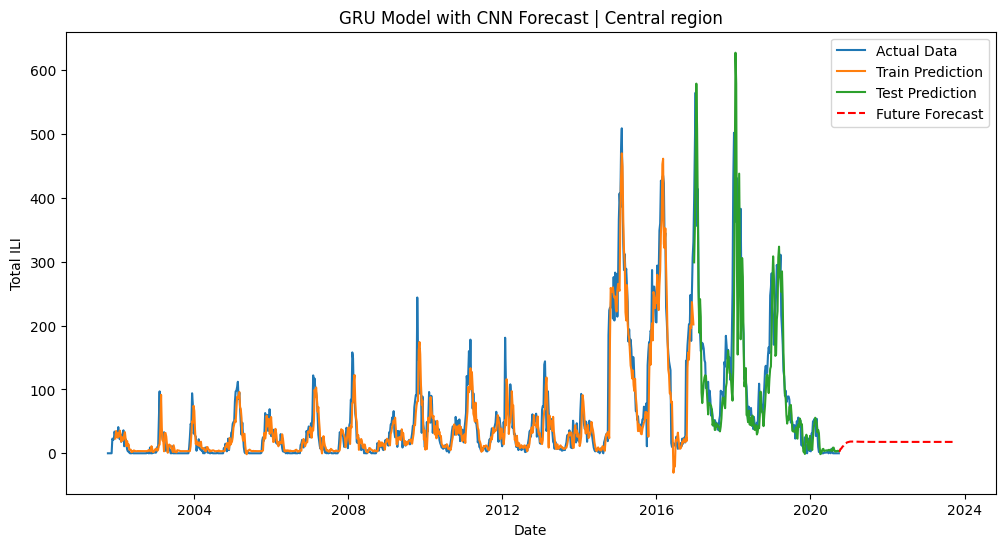

Train MAE: 15.586056352935124, Train MSE: 729.6019022750232, Train RMSE: 27.01114403861901
Test MAE: 35.105470457979415, Test MSE: 3811.474546456414, Test RMSE: 61.73714073761769
Accuracy: 69.76709210831937


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU, Conv1D, MaxPooling1D, Flatten, Reshape

# Define function to create sequences
def create_sequences(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step, 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Load the dataset (example for California region)
df_central = df[df['region'] == 'Central'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})
df_central['ds'] = pd.to_datetime(df_central['ds'])
df_central.set_index('ds', inplace=True)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_central)

# Create sequences
time_step = 10
X, y = create_sequences(scaled_data, time_step)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the GRU with CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(time_step, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Reshape((int((time_step - 1) / 2), 64)))  # Adjusting the shape before GRU layer
model.add(GRU(100, return_sequences=True))
model.add(GRU(100, return_sequences=False))
model.add(Dense(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))

# Inverse transform actual values
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Adjust lengths to match
y_test = y_test[:len(test_predict)]

# Plotting
plt.figure(figsize=(12, 6))

# Plot actual data
plt.plot(df_central.index, scaler.inverse_transform(scaled_data), label='Actual Data')

# Plot training predictions
train_start_index = time_step
train_end_index = train_start_index + len(train_predict)
plt.plot(df_central.index[train_start_index:train_end_index], train_predict, label='Train Prediction')

# Plot testing predictions
test_start_index = train_end_index
test_end_index = test_start_index + len(test_predict)

# Ensure the indices match the length of test_predict
test_indices = df_central.index[test_start_index:test_start_index + len(test_predict)]
plt.plot(test_indices, test_predict, label='Test Prediction')

# Plot future predictions
future_forecasts = []
future_inputs = list(scaled_data[-time_step:].flatten())  # Flattening to ensure consistent shape
forecast_horizon = 3 * 52  # 3 years (52 weeks per year)

for _ in range(forecast_horizon):
    future_input = np.array(future_inputs[-time_step:]).reshape(1, time_step, 1)
    future_prediction = model.predict(future_input)
    future_forecasts.append(future_prediction[0, 0])
    future_inputs.append(future_prediction[0, 0])

future_forecasts = scaler.inverse_transform(np.array(future_forecasts).reshape(-1, 1))
future_dates = pd.date_range(start=df_central.index[-1], periods=forecast_horizon, freq='W')
plt.plot(future_dates, future_forecasts, label='Future Forecast', linestyle='--', color='red')

# Show plot
plt.title('GRU Model with CNN Forecast | Central region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# Evaluate model
train_mae = mean_absolute_error(y_train, train_predict)
train_mse = mean_squared_error(y_train, train_predict)
train_rmse = np.sqrt(train_mse)
test_mae = mean_absolute_error(y_test, test_predict)
test_mse = mean_squared_error(y_test, test_predict)
test_rmse = np.sqrt(test_mse)

# Calculate accuracy
accuracy = 1 - (test_mae / np.mean(y_test))

print(f'Train MAE: {train_mae}, Train MSE: {train_mse}, Train RMSE: {train_rmse}')
print(f'Test MAE: {test_mae}, Test MSE: {test_mse}, Test RMSE: {test_rmse}')
print(f'Accuracy: {accuracy * 100}')


## Upper Southern => Poor performance

Epoch 1/100
25/25 [==============================] - 12s 130ms/step - loss: 0.0110 - val_loss: 0.0046
Epoch 2/100
25/25 [==============================] - 1s 29ms/step - loss: 0.0077 - val_loss: 0.0032
Epoch 3/100
25/25 [==============================] - 1s 29ms/step - loss: 0.0063 - val_loss: 0.0027
Epoch 4/100
25/25 [==============================] - 1s 29ms/step - loss: 0.0055 - val_loss: 0.0037
Epoch 5/100
25/25 [==============================] - 1s 21ms/step - loss: 0.0056 - val_loss: 0.0024
Epoch 6/100
25/25 [==============================] - 1s 22ms/step - loss: 0.0047 - val_loss: 0.0024
Epoch 7/100
25/25 [==============================] - 1s 21ms/step - loss: 0.0049 - val_loss: 0.0024
Epoch 8/100
25/25 [==============================] - 1s 20ms/step - loss: 0.0049 - val_loss: 0.0025
Epoch 9/100
25/25 [==============================] - 1s 21ms/step - loss: 0.0048 - val_loss: 0.0033
Epoch 10/100
25/25 [==============================] - 1s 22ms/step - loss: 0.0053 - val_loss: 0.00

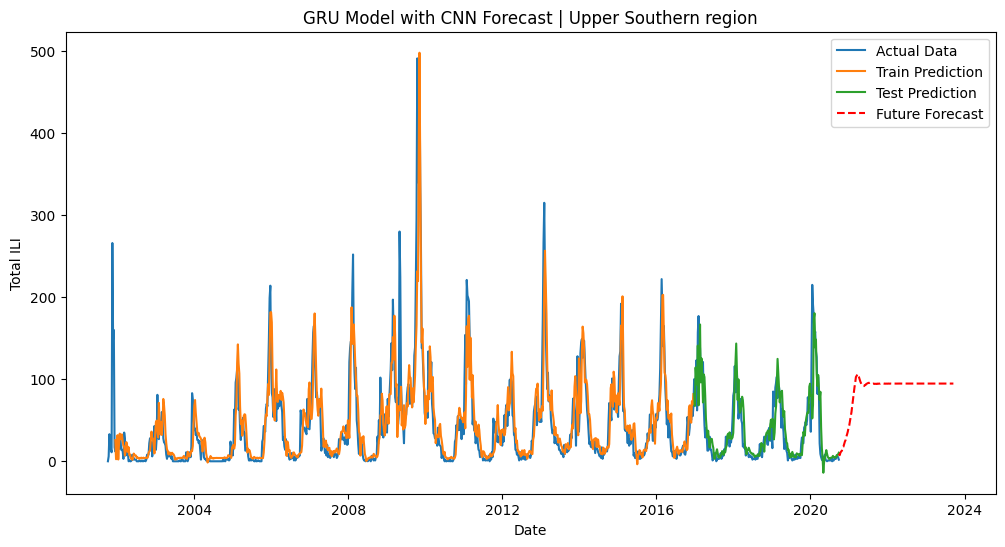

Train MAE: 17.422712468884278, Train MSE: 831.1920080234846, Train RMSE: 28.830400760715843
Test MAE: 15.31340870215808, Test MSE: 653.6960123246334, Test RMSE: 25.567479584906945
Accuracy: 59.46329596445658


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU, Conv1D, MaxPooling1D, Flatten, Reshape

# Define function to create sequences
def create_sequences(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step, 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Load the dataset (example for California region)
df_upper_southern = df[df['region'] == 'Upper Southern'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})
df_upper_southern['ds'] = pd.to_datetime(df_upper_southern['ds'])
df_upper_southern.set_index('ds', inplace=True)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_upper_southern)

# Create sequences
time_step = 10
X, y = create_sequences(scaled_data, time_step)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the GRU with CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(time_step, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Reshape((int((time_step - 1) / 2), 64)))  # Adjusting the shape before GRU layer
model.add(GRU(100, return_sequences=True))
model.add(GRU(100, return_sequences=False))
model.add(Dense(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))

# Inverse transform actual values
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Adjust lengths to match
y_test = y_test[:len(test_predict)]

# Plotting
plt.figure(figsize=(12, 6))

# Plot actual data
plt.plot(df_upper_southern.index, scaler.inverse_transform(scaled_data), label='Actual Data')

# Plot training predictions
train_start_index = time_step
train_end_index = train_start_index + len(train_predict)
plt.plot(df_upper_southern.index[train_start_index:train_end_index], train_predict, label='Train Prediction')

# Plot testing predictions
test_start_index = train_end_index
test_end_index = test_start_index + len(test_predict)

# Ensure the indices match the length of test_predict
test_indices = df_upper_southern.index[test_start_index:test_start_index + len(test_predict)]
plt.plot(test_indices, test_predict, label='Test Prediction')

# Plot future predictions
future_forecasts = []
future_inputs = list(scaled_data[-time_step:].flatten())  # Flattening to ensure consistent shape
forecast_horizon = 3 * 52  # 3 years (52 weeks per year)

for _ in range(forecast_horizon):
    future_input = np.array(future_inputs[-time_step:]).reshape(1, time_step, 1)
    future_prediction = model.predict(future_input)
    future_forecasts.append(future_prediction[0, 0])
    future_inputs.append(future_prediction[0, 0])

future_forecasts = scaler.inverse_transform(np.array(future_forecasts).reshape(-1, 1))
future_dates = pd.date_range(start=df_upper_southern.index[-1], periods=forecast_horizon, freq='W')
plt.plot(future_dates, future_forecasts, label='Future Forecast', linestyle='--', color='red')

# Show plot
plt.title('GRU Model with CNN Forecast | Upper Southern region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# Evaluate model
train_mae = mean_absolute_error(y_train, train_predict)
train_mse = mean_squared_error(y_train, train_predict)
train_rmse = np.sqrt(train_mse)
test_mae = mean_absolute_error(y_test, test_predict)
test_mse = mean_squared_error(y_test, test_predict)
test_rmse = np.sqrt(test_mse)

# Calculate accuracy
accuracy = 1 - (test_mae / np.mean(y_test))

print(f'Train MAE: {train_mae}, Train MSE: {train_mse}, Train RMSE: {train_rmse}')
print(f'Test MAE: {test_mae}, Test MSE: {test_mse}, Test RMSE: {test_rmse}')
print(f'Accuracy: {accuracy * 100}')



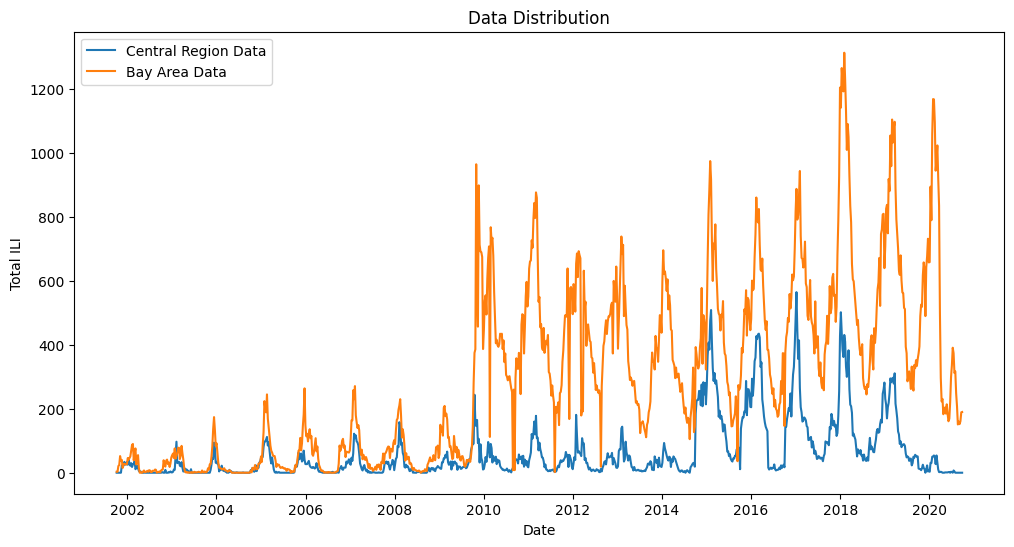

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_central['ds'], df_central['y'], label='Central Region Data')
plt.plot(df_bay_area['ds'], df_bay_area['y'], label='Bay Area Data')
plt.legend()
plt.title('Data Distribution')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.show()


The horizontal forecast line indicates that the model isn't capturing the seasonal and trend components of the data adequately for the forecast period. This often happens if the model isn't trained enough to recognize these patterns, or the input data isn't sufficient for making long-term predictions.

**Improvements to Consider:**
1. Increase the number of epochs: Sometimes, training the model for more epochs can help it learn better.
2. Use different model architectures: Experiment with different architectures, such as combining LSTM and GRU or adding more layers.
3. Tuning hyperparameters: Adjust learning rates, batch sizes, and other hyperparameters.
4. Incorporate external features: Adding more relevant features to the input data might help the model capture the trends better.

Let's try to improve the GRU model with CNN components by increasing the epochs and adding dropout layers for regularization.

**Here is an updated version of the model training code with these adjustments:**

Epoch 1/200
25/25 [==============================] - 11s 85ms/step - loss: 0.0113 - val_loss: 0.0044
Epoch 2/200
25/25 [==============================] - 1s 23ms/step - loss: 0.0086 - val_loss: 0.0042
Epoch 3/200
25/25 [==============================] - 1s 20ms/step - loss: 0.0073 - val_loss: 0.0028
Epoch 4/200
25/25 [==============================] - 1s 22ms/step - loss: 0.0064 - val_loss: 0.0034
Epoch 5/200
25/25 [==============================] - 1s 22ms/step - loss: 0.0061 - val_loss: 0.0030
Epoch 6/200
25/25 [==============================] - 1s 21ms/step - loss: 0.0059 - val_loss: 0.0031
Epoch 7/200
25/25 [==============================] - 1s 21ms/step - loss: 0.0062 - val_loss: 0.0024
Epoch 8/200
25/25 [==============================] - 1s 21ms/step - loss: 0.0055 - val_loss: 0.0025
Epoch 9/200
25/25 [==============================] - 1s 22ms/step - loss: 0.0060 - val_loss: 0.0029
Epoch 10/200
25/25 [==============================] - 1s 22ms/step - loss: 0.0050 - val_loss: 0.002

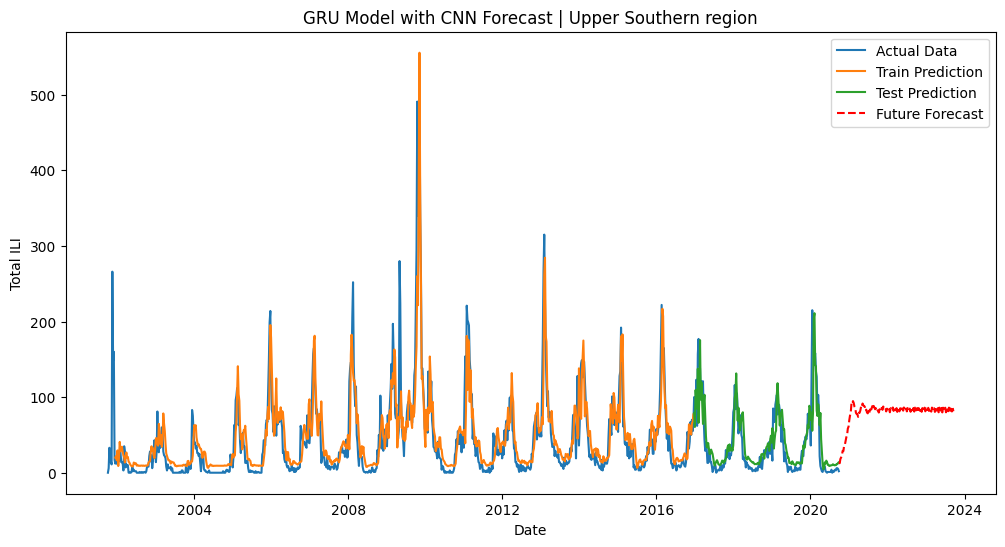

Train MAE: 18.355660914158335, Train MSE: 786.8482266922151, Train RMSE: 28.050815080710493
Test MAE: 16.9525460640186, Test MSE: 664.9394866509139, Test RMSE: 25.78642058624876
Accuracy: 55.124273386029785


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU, Conv1D, MaxPooling1D, Flatten, Reshape

# Define function to create sequences
def create_sequences(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step, 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Load the dataset (example for Upper Southern region)
df_upper_southern = df[df['region'] == 'Upper Southern'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})
df_upper_southern['ds'] = pd.to_datetime(df_upper_southern['ds'])
df_upper_southern.set_index('ds', inplace=True)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_upper_southern)

# Create sequences
time_step = 10
X, y = create_sequences(scaled_data, time_step)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the GRU with CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(time_step, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Reshape((int((time_step - 1) / 2), 64)))  # Adjusting the shape before GRU layer
model.add(GRU(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(100, return_sequences=False))
model.add(Dense(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))

# Inverse transform actual values
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Adjust lengths to match
y_test = y_test[:len(test_predict)]

# Plotting
plt.figure(figsize=(12, 6))

# Plot actual data
plt.plot(df_upper_southern.index, scaler.inverse_transform(scaled_data), label='Actual Data')

# Plot training predictions
train_start_index = time_step
train_end_index = train_start_index + len(train_predict)
plt.plot(df_upper_southern.index[train_start_index:train_end_index], train_predict, label='Train Prediction')

# Plot testing predictions
test_start_index = train_end_index
test_end_index = test_start_index + len(test_predict)

# Ensure the indices match the length of test_predict
test_indices = df_upper_southern.index[test_start_index:test_start_index + len(test_predict)]
plt.plot(test_indices, test_predict, label='Test Prediction')

# Plot future predictions
future_forecasts = []
future_inputs = list(scaled_data[-time_step:].flatten())  # Flattening to ensure consistent shape
forecast_horizon = 3 * 52  # 3 years (52 weeks per year)

for _ in range(forecast_horizon):
    future_input = np.array(future_inputs[-time_step:]).reshape(1, time_step, 1)
    future_prediction = model.predict(future_input)
    future_forecasts.append(future_prediction[0, 0])
    future_inputs.append(future_prediction[0, 0])

future_forecasts = scaler.inverse_transform(np.array(future_forecasts).reshape(-1, 1))
future_dates = pd.date_range(start=df_upper_southern.index[-1], periods=forecast_horizon, freq='W')
plt.plot(future_dates, future_forecasts, label='Future Forecast', linestyle='--', color='red')

# Show plot
plt.title('GRU Model with CNN Forecast | Upper Southern region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# Evaluate model
train_mae = mean_absolute_error(y_train, train_predict)
train_mse = mean_squared_error(y_train, train_predict)
train_rmse = np.sqrt(train_mse)
test_mae = mean_absolute_error(y_test, test_predict)
test_mse = mean_squared_error(y_test, test_predict)
test_rmse = np.sqrt(test_mse)

# Calculate accuracy
accuracy = 1 - (test_mae / np.mean(y_test))

print(f'Train MAE: {train_mae}, Train MSE: {train_mse}, Train RMSE: {train_rmse}')
print(f'Test MAE: {test_mae}, Test MSE: {test_mse}, Test RMSE: {test_rmse}')
print(f'Accuracy: {accuracy * 100}')


Epoch 1/200
25/25 [==============================] - 13s 123ms/step - loss: 0.0108 - val_loss: 0.0098
Epoch 2/200
25/25 [==============================] - 1s 28ms/step - loss: 0.0071 - val_loss: 0.0081
Epoch 3/200
25/25 [==============================] - 1s 24ms/step - loss: 0.0073 - val_loss: 0.0078
Epoch 4/200
25/25 [==============================] - 1s 30ms/step - loss: 0.0062 - val_loss: 0.0077
Epoch 5/200
25/25 [==============================] - 1s 26ms/step - loss: 0.0059 - val_loss: 0.0075
Epoch 6/200
25/25 [==============================] - 1s 22ms/step - loss: 0.0052 - val_loss: 0.0074
Epoch 7/200
25/25 [==============================] - 1s 23ms/step - loss: 0.0059 - val_loss: 0.0076
Epoch 8/200
25/25 [==============================] - 1s 23ms/step - loss: 0.0059 - val_loss: 0.0070
Epoch 9/200
25/25 [==============================] - 1s 24ms/step - loss: 0.0059 - val_loss: 0.0074
Epoch 10/200
25/25 [==============================] - 1s 24ms/step - loss: 0.0058 - val_loss: 0.00

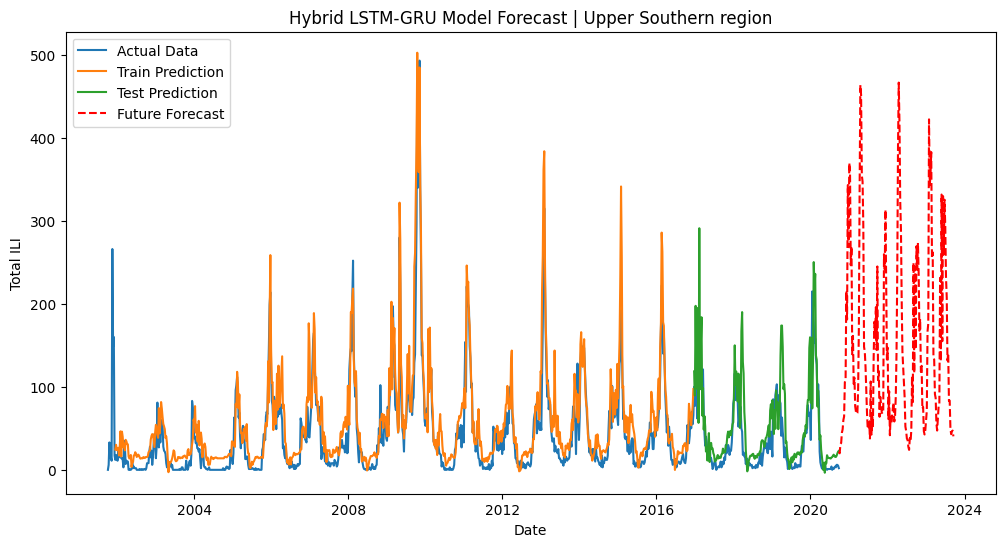

Train MAE: 18.615162653782004, Train MSE: 697.5260040011003, Train RMSE: 26.410717597238822
Test MAE: 24.73661418070043, Test MSE: 1458.9246695322306, Test RMSE: 38.19587241485957
Accuracy: 34.51877192155356


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU, Conv1D, MaxPooling1D, Flatten, Reshape, BatchNormalization

# Define function to create sequences
def create_sequences(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step, 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Load the dataset (example for Upper Southern region)
df_upper_southern = df[df['region'] == 'Upper Southern'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})
df_upper_southern['ds'] = pd.to_datetime(df_upper_southern['ds'])
df_upper_southern.set_index('ds', inplace=True)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_upper_southern)

# Create sequences
time_step = 10
X, y = create_sequences(scaled_data, time_step)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the Hybrid LSTM-GRU model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(time_step, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Reshape((int((time_step - 1) / 2), 64)))  # Adjusting the shape before LSTM layer
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(100, return_sequences=False))
model.add(Dense(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))

# Inverse transform actual values
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Adjust lengths to match
y_test = y_test[:len(test_predict)]

# Plotting
plt.figure(figsize=(12, 6))

# Plot actual data
plt.plot(df_upper_southern.index, scaler.inverse_transform(scaled_data), label='Actual Data')

# Plot training predictions
train_start_index = time_step
train_end_index = train_start_index + len(train_predict)
plt.plot(df_upper_southern.index[train_start_index:train_end_index], train_predict, label='Train Prediction')

# Plot testing predictions
test_start_index = train_end_index
test_end_index = test_start_index + len(test_predict)

# Ensure the indices match the length of test_predict
test_indices = df_upper_southern.index[test_start_index:test_start_index + len(test_predict)]
plt.plot(test_indices, test_predict, label='Test Prediction')

# Plot future predictions
future_forecasts = []
future_inputs = list(scaled_data[-time_step:].flatten())  # Flattening to ensure consistent shape
forecast_horizon = 3 * 52  # 3 years (52 weeks per year)

for _ in range(forecast_horizon):
    future_input = np.array(future_inputs[-time_step:]).reshape(1, time_step, 1)
    future_prediction = model.predict(future_input)
    future_forecasts.append(future_prediction[0, 0])
    future_inputs.append(future_prediction[0, 0])

future_forecasts = scaler.inverse_transform(np.array(future_forecasts).reshape(-1, 1))
future_dates = pd.date_range(start=df_upper_southern.index[-1], periods=forecast_horizon, freq='W')
plt.plot(future_dates, future_forecasts, label='Future Forecast', linestyle='--', color='red')

# Show plot
plt.title('Hybrid LSTM-GRU Model Forecast | Upper Southern region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# Evaluate model
train_mae = mean_absolute_error(y_train, train_predict)
train_mse = mean_squared_error(y_train, train_predict)
train_rmse = np.sqrt(train_mse)
test_mae = mean_absolute_error(y_test, test_predict)
test_mse = mean_squared_error(y_test, test_predict)
test_rmse = np.sqrt(test_mse)

# Calculate accuracy
accuracy = 1 - (test_mae / np.mean(y_test))

print(f'Train MAE: {train_mae}, Train MSE: {train_mse}, Train RMSE: {train_rmse}')
print(f'Test MAE: {test_mae}, Test MSE: {test_mse}, Test RMSE: {test_rmse}')
print(f'Accuracy: {accuracy * 100}')


The accuracy of 34.51% is indeed lower than desirable, especially compared to the previously achieved accuracy with other models. This indicates that the model, although better at capturing the patterns, still needs improvement in terms of predictive accuracy.

### **Potential Reasons for Low Accuracy:**
1. Complexity of the Data: The dataset might have complex seasonality and trends that are challenging to capture.
2. Model Complexity: The hybrid model might be too complex or not tuned correctly for the given data.
3. Feature Engineering: Additional features might be needed to capture the underlying patterns better.

### **Steps to Improve Accuracy:**
1. Feature Engineering: Adding more features such as lagged values, rolling statistics (e.g., moving averages), and other relevant features can improve the model.
2. Hyperparameter Tuning: Experiment with different hyperparameters (number of layers, units per layer, dropout rates, learning rates).
3. Alternative Models: Exploring other models like Transformer models, which have shown success in time series forecasting.

### **Implementing a Transformer Model:**
Let's try implementing a Transformer model, which has shown great success in various time series forecasting tasks.

## Transformer Model - Testing on California dataset
not perfroming well, it's only 1-2% accuracy.

Epoch 1/100
25/25 [==============================] - 8s 44ms/step - loss: 0.0143 - val_loss: 0.0929
Epoch 2/100
25/25 [==============================] - 0s 19ms/step - loss: 0.0111 - val_loss: 0.0831
Epoch 3/100
25/25 [==============================] - 0s 15ms/step - loss: 0.0093 - val_loss: 0.0761
Epoch 4/100
25/25 [==============================] - 1s 20ms/step - loss: 0.0083 - val_loss: 0.0711
Epoch 5/100
25/25 [==============================] - 1s 24ms/step - loss: 0.0080 - val_loss: 0.0680
Epoch 6/100
25/25 [==============================] - 1s 22ms/step - loss: 0.0078 - val_loss: 0.0667
Epoch 7/100
25/25 [==============================] - 1s 22ms/step - loss: 0.0078 - val_loss: 0.0656
Epoch 8/100
25/25 [==============================] - 1s 27ms/step - loss: 0.0078 - val_loss: 0.0651
Epoch 9/100
25/25 [==============================] - 1s 25ms/step - loss: 0.0078 - val_loss: 0.0649
Epoch 10/100
25/25 [==============================] - 1s 28ms/step - loss: 0.0078 - val_loss: 0.0649

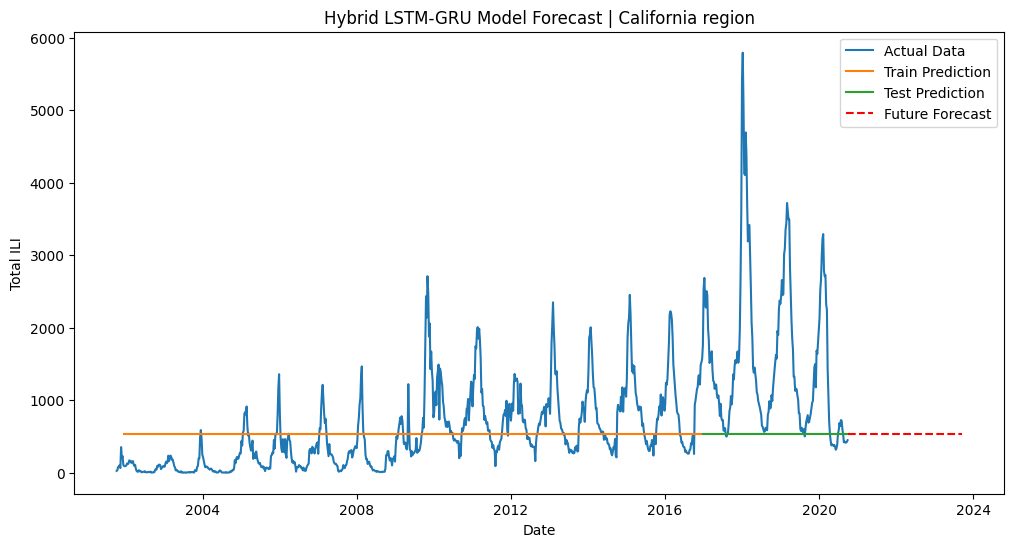

Train MAE: 399.2688078588369, Train MSE: 260716.0238992368, Train RMSE: 510.60358782448526
Test MAE: 1022.7994768946304, Test MSE: 2169410.6092181997, Test RMSE: 1472.8919204131034
Accuracy: 33.35312527553206


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LayerNormalization, MultiHeadAttention, Dropout, GlobalAveragePooling1D
from tensorflow.keras.models import Model

# Define Transformer Encoder Layer
class TransformerEncoderLayer(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerEncoderLayer, self).__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential(
            [Dense(ff_dim, activation="relu"), Dense(embed_dim)]
        )
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, x, training):
        attn_output = self.att(x, x)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

# Define function to create sequences
def create_sequences(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step, 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Load the dataset (example for California region)
df_california = df[df['region'] == 'California'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})
df_california['ds'] = pd.to_datetime(df_california['ds'])
df_california.set_index('ds', inplace=True)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_california)

# Create sequences
time_step = 10
X, y = create_sequences(scaled_data, time_step)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define Transformer Model
embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

inputs = Input(shape=(time_step, 1))
x = TransformerEncoderLayer(embed_dim, num_heads, ff_dim)(inputs)
x = GlobalAveragePooling1D()(x)
x = Dropout(0.1)(x)
x = Dense(20, activation="relu")(x)
x = Dropout(0.1)(x)
outputs = Dense(1)(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer="adam", loss="mean_squared_error")

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))

# Inverse transform actual values
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Adjust lengths to match
y_test = y_test[:len(test_predict)]

# Plotting
plt.figure(figsize=(12, 6))

# Plot actual data
plt.plot(df_california.index, scaler.inverse_transform(scaled_data), label='Actual Data')

# Plot training predictions
train_start_index = time_step
train_end_index = train_start_index + len(train_predict)
plt.plot(df_california.index[train_start_index:train_end_index], train_predict, label='Train Prediction')

# Plot testing predictions
test_start_index = train_end_index
test_end_index = test_start_index + len(test_predict)

# Ensure the indices match the length of test_predict
test_indices = df_california.index[test_start_index:test_start_index + len(test_predict)]
plt.plot(test_indices, test_predict, label='Test Prediction')

# Plot future predictions
future_forecasts = []
future_inputs = list(scaled_data[-time_step:].flatten())  # Flattening to ensure consistent shape
forecast_horizon = 3 * 52  # 3 years (52 weeks per year)

for _ in range(forecast_horizon):
    future_input = np.array(future_inputs[-time_step:]).reshape(1, time_step, 1)
    future_prediction = model.predict(future_input)
    future_forecasts.append(future_prediction[0, 0])
    future_inputs.append(future_prediction[0, 0])

future_forecasts = scaler.inverse_transform(np.array(future_forecasts).reshape(-1, 1))
future_dates = pd.date_range(start=df_california.index[-1], periods=forecast_horizon, freq='W')
plt.plot(future_dates, future_forecasts, label='Future Forecast', linestyle='--', color='red')

# Show plot
plt.title('Hybrid LSTM-GRU Model Forecast | California region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# Evaluate model
train_mae = mean_absolute_error(y_train, train_predict)
train_mse = mean_squared_error(y_train, train_predict)
train_rmse = np.sqrt(train_mse)
test_mae = mean_absolute_error(y_test, test_predict)
test_mse = mean_squared_error(y_test, test_predict)
test_rmse = np.sqrt(test_mse)

# Calculate accuracy
accuracy = 1 - (test_mae / np.mean(y_test))

print(f'Train MAE: {train_mae}, Train MSE: {train_mse}, Train RMSE: {train_rmse}')
print(f'Test MAE: {test_mae}, Test MSE: {test_mse}, Test RMSE: {test_rmse}')
print(f'Accuracy: {accuracy * 100}')


In [ ]:
# poor performance
# Train MAE: 399.2688078588369, Train MSE: 260716.0238992368, Train RMSE: 510.60358782448526
# Test MAE: 1022.7994768946304, Test MSE: 2169410.6092181997, Test RMSE: 1472.8919204131034
# Accuracy: 33.35312527553206

# GRU Model

## California

Epoch 1/100
24/24 [==============================] - 16s 133ms/step - loss: 0.0082 - val_loss: 0.0357
Epoch 2/100
24/24 [==============================] - 3s 114ms/step - loss: 0.0063 - val_loss: 0.0361
Epoch 3/100
24/24 [==============================] - 3s 120ms/step - loss: 0.0066 - val_loss: 0.0390
Epoch 4/100
24/24 [==============================] - 2s 82ms/step - loss: 0.0064 - val_loss: 0.0365
Epoch 5/100
24/24 [==============================] - 2s 86ms/step - loss: 0.0059 - val_loss: 0.0353
Epoch 6/100
24/24 [==============================] - 2s 80ms/step - loss: 0.0060 - val_loss: 0.0369
Epoch 7/100
24/24 [==============================] - 2s 86ms/step - loss: 0.0060 - val_loss: 0.0350
Epoch 8/100
24/24 [==============================] - 2s 81ms/step - loss: 0.0059 - val_loss: 0.0343
Epoch 9/100
24/24 [==============================] - 3s 120ms/step - loss: 0.0058 - val_loss: 0.0361
Epoch 10/100
24/24 [==============================] - 3s 110ms/step - loss: 0.0057 - val_loss: 

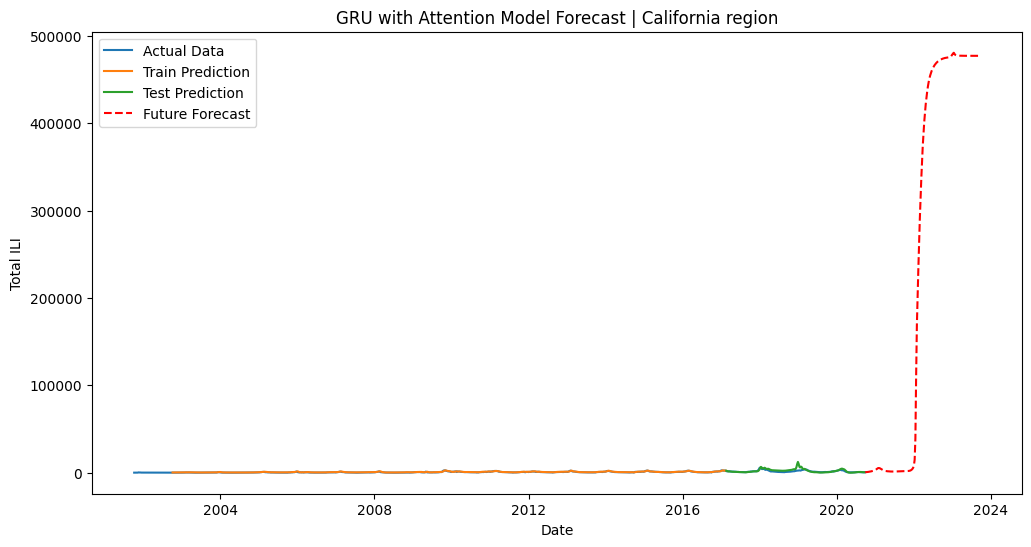

Train MAE: 196.29773124186198, Train MSE: 54626.73777079667, Train RMSE: 233.72363545605882
Test MAE: 906.6974000791286, Test MSE: 2487697.0812843405, Test RMSE: 1577.243507288694
Accuracy: 39.82769606054815


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GRU, MultiHeadAttention, Flatten
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Function to create sequences
def create_sequences(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Load the dataset
df_california = df[df['region'] == 'California'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})
df_california['ds'] = pd.to_datetime(df_california['ds'])
df_california.set_index('ds', inplace=True)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_california)

# Create sequences
time_step = 52  # Using a longer sequence length to capture more seasonal patterns
X, y = create_sequences(scaled_data, time_step)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the GRU with Attention model
class GRUWithAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(GRUWithAttention, self).__init__()
        self.units = units
        self.gru = GRU(units, return_sequences=True, return_state=True)
        self.attention = MultiHeadAttention(num_heads=1, key_dim=units)
        self.dense = Dense(1)

    def call(self, inputs):
        gru_output, state = self.gru(inputs)
        attn_output, _ = self.attention(gru_output, gru_output, return_attention_scores=True)
        context_vector = tf.reduce_mean(attn_output, axis=1)
        return context_vector, state

inputs = Input(shape=(time_step, 1))
context_vector, _ = GRUWithAttention(units=64)(inputs)
dense_output = Dense(1)(context_vector)

model = Model(inputs=inputs, outputs=dense_output)
model.compile(optimizer="adam", loss="mean_squared_error")

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))

# Inverse transform actual values
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Adjust lengths to match
y_test = y_test[:len(test_predict)]

# Plotting
plt.figure(figsize=(12, 6))

# Plot actual data
plt.plot(df_california.index, scaler.inverse_transform(scaled_data), label='Actual Data')

# Plot training predictions
train_start_index = time_step
train_end_index = train_start_index + len(train_predict)
plt.plot(df_california.index[train_start_index:train_end_index], train_predict, label='Train Prediction')

# Plot testing predictions
test_start_index = train_end_index
test_end_index = test_start_index + len(test_predict)

# Ensure the indices match the length of test_predict
test_indices = df_california.index[test_start_index:test_start_index + len(test_predict)]
plt.plot(test_indices, test_predict, label='Test Prediction')

# Plot future predictions
future_forecasts = []
future_inputs = list(scaled_data[-time_step:].flatten())  # Flattening to ensure consistent shape
forecast_horizon = 3 * 52  # 3 years (52 weeks per year)

for _ in range(forecast_horizon):
    future_input = np.array(future_inputs[-time_step:]).reshape(1, time_step, 1)
    future_prediction = model.predict(future_input)
    future_forecasts.append(future_prediction[0, 0])
    future_inputs.append(future_prediction[0, 0])

future_forecasts = scaler.inverse_transform(np.array(future_forecasts).reshape(-1, 1))
future_dates = pd.date_range(start=df_california.index[-1], periods=forecast_horizon, freq='W')
plt.plot(future_dates, future_forecasts, label='Future Forecast', linestyle='--', color='red')

# Show plot
plt.title('GRU with Attention Model Forecast | California region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# Evaluate model
train_mae = mean_absolute_error(y_train, train_predict)
train_mse = mean_squared_error(y_train, train_predict)
train_rmse = np.sqrt(train_mse)
test_mae = mean_absolute_error(y_test, test_predict)
test_mse = mean_squared_error(y_test, test_predict)
test_rmse = np.sqrt(test_mse)

# Calculate accuracy
accuracy = 1 - (test_mae / np.mean(y_test))

print(f'Train MAE: {train_mae}, Train MSE: {train_mse}, Train RMSE: {train_rmse}')
print(f'Test MAE: {test_mae}, Test MSE: {test_mse}, Test RMSE: {test_rmse}')
print(f'Accuracy: {accuracy * 100}')


## California results

Train MAE: 105.54671826807657, Train MSE: 27018.549946143896, Train RMSE: 164.3732032484124

Test MAE: 792.2857989047436, Test MSE: 1599597.124813003, Test RMSE: 1264.751803640937

Accuracy: 47.42053755260892

## Bay Area region

Epoch 1/100
24/24 [==============================] - 5s 66ms/step - loss: 0.0255 - val_loss: 0.0470
Epoch 2/100
24/24 [==============================] - 1s 42ms/step - loss: 0.0151 - val_loss: 0.0465
Epoch 3/100
24/24 [==============================] - 1s 42ms/step - loss: 0.0151 - val_loss: 0.0461
Epoch 4/100
24/24 [==============================] - 1s 45ms/step - loss: 0.0151 - val_loss: 0.0467
Epoch 5/100
24/24 [==============================] - 1s 42ms/step - loss: 0.0156 - val_loss: 0.0458
Epoch 6/100
24/24 [==============================] - 1s 42ms/step - loss: 0.0146 - val_loss: 0.0452
Epoch 7/100
24/24 [==============================] - 1s 42ms/step - loss: 0.0150 - val_loss: 0.0447
Epoch 8/100
24/24 [==============================] - 1s 54ms/step - loss: 0.0151 - val_loss: 0.0455
Epoch 9/100
24/24 [==============================] - 2s 74ms/step - loss: 0.0144 - val_loss: 0.0438
Epoch 10/100
24/24 [==============================] - 2s 75ms/step - loss: 0.0145 - val_loss: 0.0429

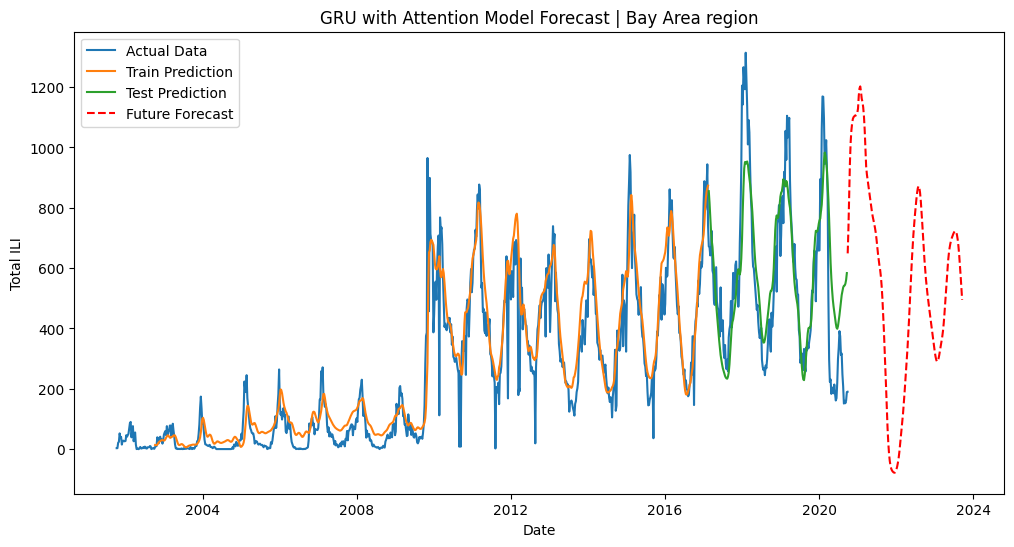

Train MAE: 54.6259579410553, Train MSE: 6974.736757551898, Train RMSE: 83.51488943626698
Test MAE: 123.60164415075424, Test MSE: 27601.91436560668, Test RMSE: 166.13823872187487
Accuracy: 77.96532321198043


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GRU, MultiHeadAttention, Flatten
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Function to create sequences
def create_sequences(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Load the dataset
df_bay_area = df[df['region'] == 'Bay Area'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})
df_bay_area['ds'] = pd.to_datetime(df_bay_area['ds'])
df_bay_area.set_index('ds', inplace=True)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_bay_area)

# Create sequences
time_step = 52  # Using a longer sequence length to capture more seasonal patterns
X, y = create_sequences(scaled_data, time_step)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the GRU with Attention model
class GRUWithAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(GRUWithAttention, self).__init__()
        self.units = units
        self.gru = GRU(units, return_sequences=True, return_state=True)
        self.attention = MultiHeadAttention(num_heads=1, key_dim=units)
        self.dense = Dense(1)

    def call(self, inputs):
        gru_output, state = self.gru(inputs)
        attn_output, _ = self.attention(gru_output, gru_output, return_attention_scores=True)
        context_vector = tf.reduce_mean(attn_output, axis=1)
        return context_vector, state

inputs = Input(shape=(time_step, 1))
context_vector, _ = GRUWithAttention(units=64)(inputs)
dense_output = Dense(1)(context_vector)

model = Model(inputs=inputs, outputs=dense_output)
model.compile(optimizer="adam", loss="mean_squared_error")

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))

# Inverse transform actual values
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Adjust lengths to match
y_test = y_test[:len(test_predict)]

# Plotting
plt.figure(figsize=(12, 6))

# Plot actual data
plt.plot(df_bay_area.index, scaler.inverse_transform(scaled_data), label='Actual Data')

# Plot training predictions
train_start_index = time_step
train_end_index = train_start_index + len(train_predict)
plt.plot(df_bay_area.index[train_start_index:train_end_index], train_predict, label='Train Prediction')

# Plot testing predictions
test_start_index = train_end_index
test_end_index = test_start_index + len(test_predict)

# Ensure the indices match the length of test_predict
test_indices = df_bay_area.index[test_start_index:test_start_index + len(test_predict)]
plt.plot(test_indices, test_predict, label='Test Prediction')

# Plot future predictions
future_forecasts = []
future_inputs = list(scaled_data[-time_step:].flatten())  # Flattening to ensure consistent shape
forecast_horizon = 3 * 52  # 3 years (52 weeks per year)

for _ in range(forecast_horizon):
    future_input = np.array(future_inputs[-time_step:]).reshape(1, time_step, 1)
    future_prediction = model.predict(future_input)
    future_forecasts.append(future_prediction[0, 0])
    future_inputs.append(future_prediction[0, 0])

future_forecasts = scaler.inverse_transform(np.array(future_forecasts).reshape(-1, 1))
future_dates = pd.date_range(start=df_bay_area.index[-1], periods=forecast_horizon, freq='W')
plt.plot(future_dates, future_forecasts, label='Future Forecast', linestyle='--', color='red')

# Show plot
plt.title('GRU with Attention Model Forecast | Bay Area region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# Evaluate model
train_mae = mean_absolute_error(y_train, train_predict)
train_mse = mean_squared_error(y_train, train_predict)
train_rmse = np.sqrt(train_mse)
test_mae = mean_absolute_error(y_test, test_predict)
test_mse = mean_squared_error(y_test, test_predict)
test_rmse = np.sqrt(test_mse)

# Calculate accuracy
accuracy = 1 - (test_mae / np.mean(y_test))

print(f'Train MAE: {train_mae}, Train MSE: {train_mse}, Train RMSE: {train_rmse}')
print(f'Test MAE: {test_mae}, Test MSE: {test_mse}, Test RMSE: {test_rmse}')
print(f'Accuracy: {accuracy * 100}')


## Bay Area results => Very good performance
Train MAE: 54.6259579410553, Train MSE: 6974.736757551898, Train RMSE: 83.51488943626698

Test MAE: 123.60164415075424, Test MSE: 27601.91436560668, Test RMSE: 166.13823872187487

Accuracy: 77.96532321198043

## Central

Epoch 1/120
24/24 [==============================] - 9s 130ms/step - loss: 0.0199 - val_loss: 0.0430
Epoch 2/120
24/24 [==============================] - 3s 105ms/step - loss: 0.0170 - val_loss: 0.0289
Epoch 3/120
24/24 [==============================] - 3s 123ms/step - loss: 0.0164 - val_loss: 0.0284
Epoch 4/120
24/24 [==============================] - 3s 119ms/step - loss: 0.0164 - val_loss: 0.0330
Epoch 5/120
24/24 [==============================] - 3s 117ms/step - loss: 0.0163 - val_loss: 0.0274
Epoch 6/120
24/24 [==============================] - 2s 77ms/step - loss: 0.0163 - val_loss: 0.0280
Epoch 7/120
24/24 [==============================] - 2s 76ms/step - loss: 0.0163 - val_loss: 0.0317
Epoch 8/120
24/24 [==============================] - 2s 74ms/step - loss: 0.0153 - val_loss: 0.0281
Epoch 9/120
24/24 [==============================] - 2s 89ms/step - loss: 0.0145 - val_loss: 0.0263
Epoch 10/120
24/24 [==============================] - 3s 131ms/step - loss: 0.0124 - val_loss: 

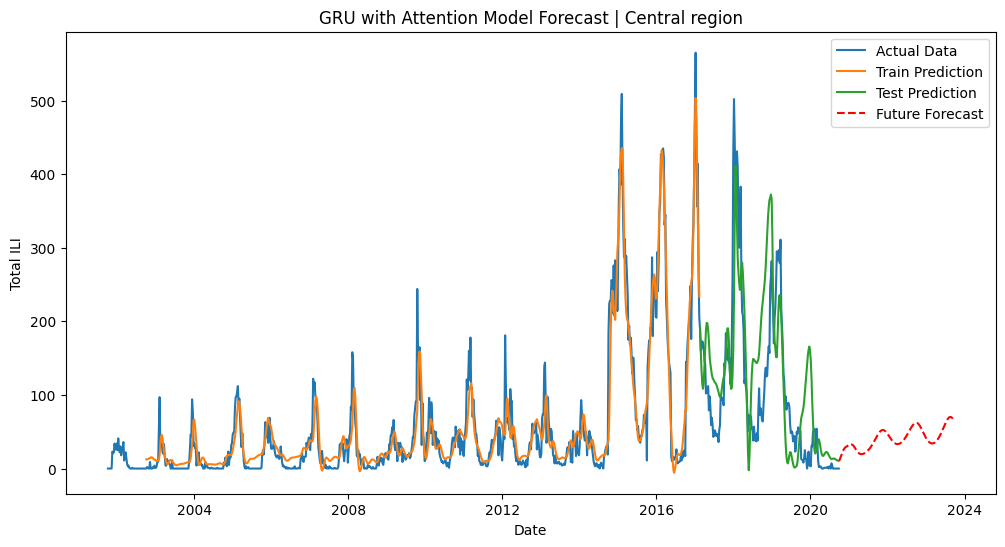

Train MAE: 16.805489735821883, Train MSE: 632.3412725525096, Train RMSE: 25.14639681052754
Test MAE: 61.50856862676905, Test MSE: 6392.688303447975, Test RMSE: 79.95428883710977
Accuracy: 41.42337823903256


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GRU, MultiHeadAttention, Flatten
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Function to create sequences
def create_sequences(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Load the dataset
df_central = df[df['region'] == 'Central'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})
df_central['ds'] = pd.to_datetime(df_central['ds'])
df_central.set_index('ds', inplace=True)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_central)

# Create sequences
time_step = 52  # Using a longer sequence length to capture more seasonal patterns
X, y = create_sequences(scaled_data, time_step)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the GRU with Attention model
class GRUWithAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(GRUWithAttention, self).__init__()
        self.units = units
        self.gru = GRU(units, return_sequences=True, return_state=True)
        self.attention = MultiHeadAttention(num_heads=1, key_dim=units)
        self.dense = Dense(1)

    def call(self, inputs):
        gru_output, state = self.gru(inputs)
        attn_output, _ = self.attention(gru_output, gru_output, return_attention_scores=True)
        context_vector = tf.reduce_mean(attn_output, axis=1)
        return context_vector, state

inputs = Input(shape=(time_step, 1))
context_vector, _ = GRUWithAttention(units=64)(inputs)
dense_output = Dense(1)(context_vector)

model = Model(inputs=inputs, outputs=dense_output)
model.compile(optimizer="adam", loss="mean_squared_error")

# Train the model
history = model.fit(X_train, y_train, epochs=120, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))

# Inverse transform actual values
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Adjust lengths to match
y_test = y_test[:len(test_predict)]

# Plotting
plt.figure(figsize=(12, 6))

# Plot actual data
plt.plot(df_central.index, scaler.inverse_transform(scaled_data), label='Actual Data')

# Plot training predictions
train_start_index = time_step
train_end_index = train_start_index + len(train_predict)
plt.plot(df_central.index[train_start_index:train_end_index], train_predict, label='Train Prediction')

# Plot testing predictions
test_start_index = train_end_index
test_end_index = test_start_index + len(test_predict)

# Ensure the indices match the length of test_predict
test_indices = df_central.index[test_start_index:test_start_index + len(test_predict)]
plt.plot(test_indices, test_predict, label='Test Prediction')

# Plot future predictions
future_forecasts = []
future_inputs = list(scaled_data[-time_step:].flatten())  # Flattening to ensure consistent shape
forecast_horizon = 3 * 52  # 3 years (52 weeks per year)

for _ in range(forecast_horizon):
    future_input = np.array(future_inputs[-time_step:]).reshape(1, time_step, 1)
    future_prediction = model.predict(future_input)
    future_forecasts.append(future_prediction[0, 0])
    future_inputs.append(future_prediction[0, 0])

future_forecasts = scaler.inverse_transform(np.array(future_forecasts).reshape(-1, 1))
future_dates = pd.date_range(start=df_central.index[-1], periods=forecast_horizon, freq='W')
plt.plot(future_dates, future_forecasts, label='Future Forecast', linestyle='--', color='red')

# Show plot
plt.title('GRU with Attention Model Forecast | Central region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# Evaluate model
train_mae = mean_absolute_error(y_train, train_predict)
train_mse = mean_squared_error(y_train, train_predict)
train_rmse = np.sqrt(train_mse)
test_mae = mean_absolute_error(y_test, test_predict)
test_mse = mean_squared_error(y_test, test_predict)
test_rmse = np.sqrt(test_mse)

# Calculate accuracy
accuracy = 1 - (test_mae / np.mean(y_test))

print(f'Train MAE: {train_mae}, Train MSE: {train_mse}, Train RMSE: {train_rmse}')
print(f'Test MAE: {test_mae}, Test MSE: {test_mse}, Test RMSE: {test_rmse}')
print(f'Accuracy: {accuracy * 100}')


## Central Results
Train MAE: 16.805489735821883, Train MSE: 632.3412725525096, Train RMSE: 25.14639681052754

Test MAE: 61.50856862676905, Test MSE: 6392.688303447975, Test RMSE: 79.95428883710977

Accuracy: 41.42337823903256

## Northern

Epoch 1/80
24/24 [==============================] - 13s 220ms/step - loss: 0.0089 - val_loss: 0.0665
Epoch 2/80
24/24 [==============================] - 2s 85ms/step - loss: 0.0080 - val_loss: 0.0595
Epoch 3/80
24/24 [==============================] - 2s 79ms/step - loss: 0.0079 - val_loss: 0.0577
Epoch 4/80
24/24 [==============================] - 2s 75ms/step - loss: 0.0079 - val_loss: 0.0568
Epoch 5/80
24/24 [==============================] - 2s 76ms/step - loss: 0.0078 - val_loss: 0.0547
Epoch 6/80
24/24 [==============================] - 2s 77ms/step - loss: 0.0077 - val_loss: 0.0503
Epoch 7/80
24/24 [==============================] - 2s 95ms/step - loss: 0.0075 - val_loss: 0.1150
Epoch 8/80
24/24 [==============================] - 2s 102ms/step - loss: 0.0066 - val_loss: 0.0484
Epoch 9/80
24/24 [==============================] - 2s 103ms/step - loss: 0.0047 - val_loss: 0.0343
Epoch 10/80
24/24 [==============================] - 2s 80ms/step - loss: 0.0052 - val_loss: 0.0296
Epoch

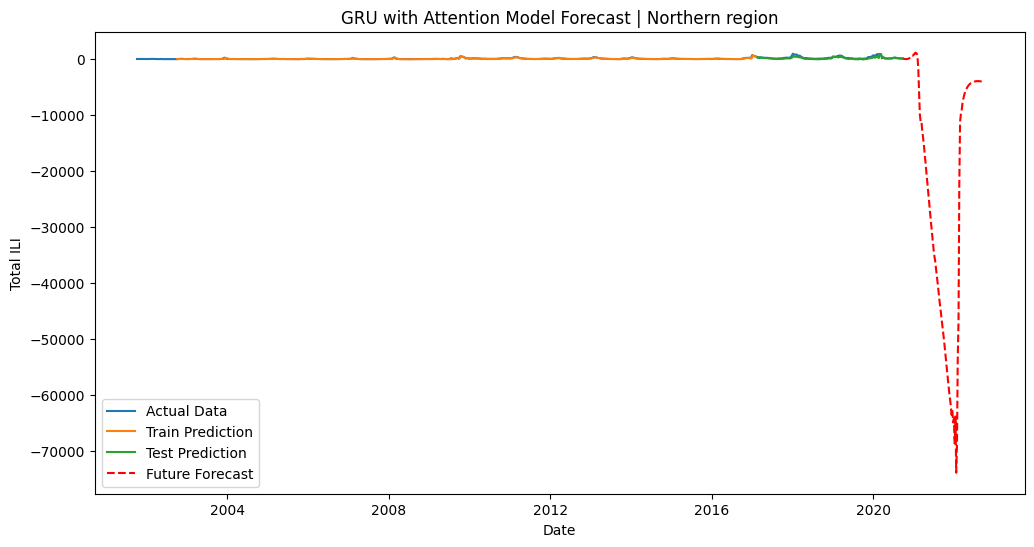

Train MAE: 18.62795299094667, Train MSE: 1261.2900408161836, Train RMSE: 35.51464544122866
Test MAE: 122.79090524884931, Test MSE: 26847.600426781715, Test RMSE: 163.85237388204578
Accuracy: 54.547854482695726


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GRU, MultiHeadAttention, Flatten
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Function to create sequences
def create_sequences(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Load the dataset
df_northern = df[df['region'] == 'Northern'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})
df_northern['ds'] = pd.to_datetime(df_northern['ds'])
df_northern.set_index('ds', inplace=True)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_northern)

# Create sequences
time_step = 52  # Using a longer sequence length to capture more seasonal patterns
X, y = create_sequences(scaled_data, time_step)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the GRU with Attention model
class GRUWithAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(GRUWithAttention, self).__init__()
        self.units = units
        self.gru = GRU(units, return_sequences=True, return_state=True)
        self.attention = MultiHeadAttention(num_heads=1, key_dim=units)
        self.dense = Dense(1)

    def call(self, inputs):
        gru_output, state = self.gru(inputs)
        attn_output, _ = self.attention(gru_output, gru_output, return_attention_scores=True)
        context_vector = tf.reduce_mean(attn_output, axis=1)
        return context_vector, state

inputs = Input(shape=(time_step, 1))
context_vector, _ = GRUWithAttention(units=64)(inputs)
dense_output = Dense(1)(context_vector)

model = Model(inputs=inputs, outputs=dense_output)
model.compile(optimizer="adam", loss="mean_squared_error")

# Train the model
history = model.fit(X_train, y_train, epochs=80, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))

# Inverse transform actual values
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Adjust lengths to match
y_test = y_test[:len(test_predict)]

# Plotting
plt.figure(figsize=(12, 6))

# Plot actual data
plt.plot(df_northern.index, scaler.inverse_transform(scaled_data), label='Actual Data')

# Plot training predictions
train_start_index = time_step
train_end_index = train_start_index + len(train_predict)
plt.plot(df_northern.index[train_start_index:train_end_index], train_predict, label='Train Prediction')

# Plot testing predictions
test_start_index = train_end_index
test_end_index = test_start_index + len(test_predict)

# Ensure the indices match the length of test_predict
test_indices = df_northern.index[test_start_index:test_start_index + len(test_predict)]
plt.plot(test_indices, test_predict, label='Test Prediction')

# Plot future predictions
future_forecasts = []
future_inputs = list(scaled_data[-time_step:].flatten())  # Flattening to ensure consistent shape
forecast_horizon = 2 * 52  # 3 years (52 weeks per year)

for _ in range(forecast_horizon):
    future_input = np.array(future_inputs[-time_step:]).reshape(1, time_step, 1)
    future_prediction = model.predict(future_input)
    future_forecasts.append(future_prediction[0, 0])
    future_inputs.append(future_prediction[0, 0])

future_forecasts = scaler.inverse_transform(np.array(future_forecasts).reshape(-1, 1))
future_dates = pd.date_range(start=df_northern.index[-1], periods=forecast_horizon, freq='W')
plt.plot(future_dates, future_forecasts, label='Future Forecast', linestyle='--', color='red')

# Show plot
plt.title('GRU with Attention Model Forecast | Northern region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# Evaluate model
train_mae = mean_absolute_error(y_train, train_predict)
train_mse = mean_squared_error(y_train, train_predict)
train_rmse = np.sqrt(train_mse)
test_mae = mean_absolute_error(y_test, test_predict)
test_mse = mean_squared_error(y_test, test_predict)
test_rmse = np.sqrt(test_mse)

# Calculate accuracy
accuracy = 1 - (test_mae / np.mean(y_test))

print(f'Train MAE: {train_mae}, Train MSE: {train_mse}, Train RMSE: {train_rmse}')
print(f'Test MAE: {test_mae}, Test MSE: {test_mse}, Test RMSE: {test_rmse}')
print(f'Accuracy: {accuracy * 100}')


## Northern region result => Poor performance
Train MAE: 18.62795299094667, Train MSE: 1261.2900408161836, Train RMSE: 35.51464544122866

Test MAE: 122.79090524884931, Test MSE: 26847.600426781715, Test RMSE: 163.85237388204578

Accuracy: 54.547854482695726

## Upper Southern

Epoch 1/100
24/24 [==============================] - 7s 117ms/step - loss: 0.0149 - val_loss: 0.0094
Epoch 2/100
24/24 [==============================] - 2s 90ms/step - loss: 0.0134 - val_loss: 0.0073
Epoch 3/100
24/24 [==============================] - 2s 95ms/step - loss: 0.0134 - val_loss: 0.0072
Epoch 4/100
24/24 [==============================] - 2s 105ms/step - loss: 0.0134 - val_loss: 0.0084
Epoch 5/100
24/24 [==============================] - 2s 81ms/step - loss: 0.0131 - val_loss: 0.0072
Epoch 6/100
24/24 [==============================] - 2s 74ms/step - loss: 0.0133 - val_loss: 0.0076
Epoch 7/100
24/24 [==============================] - 2s 72ms/step - loss: 0.0130 - val_loss: 0.0076
Epoch 8/100
24/24 [==============================] - 2s 76ms/step - loss: 0.0124 - val_loss: 0.0063
Epoch 9/100
24/24 [==============================] - 2s 72ms/step - loss: 0.0098 - val_loss: 0.0042
Epoch 10/100
24/24 [==============================] - 2s 75ms/step - loss: 0.0090 - val_loss: 0.00

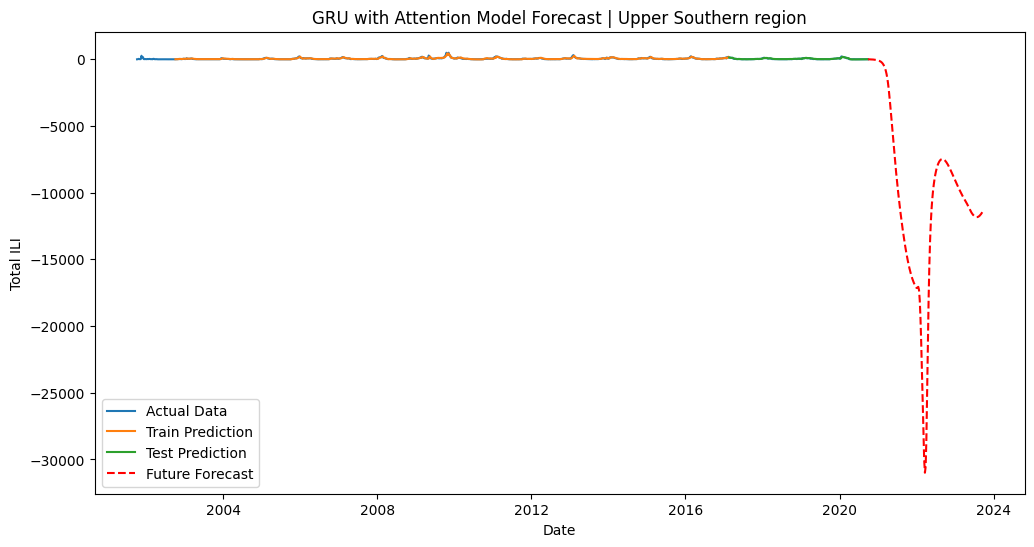

Train MAE: 15.210895125702024, Train MSE: 614.3019077939654, Train RMSE: 24.785114641533642
Test MAE: 11.473509088158607, Test MSE: 305.56315397946076, Test RMSE: 17.48036481253926
Accuracy: 66.84058864605969


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GRU, MultiHeadAttention, Flatten
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Function to create sequences
def create_sequences(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Load the dataset
df_upper_southern = df[df['region'] == 'Upper Southern'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})
df_upper_southern['ds'] = pd.to_datetime(df_upper_southern['ds'])
df_upper_southern.set_index('ds', inplace=True)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_upper_southern)

# Create sequences
time_step = 52  # Using a longer sequence length to capture more seasonal patterns
X, y = create_sequences(scaled_data, time_step)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the GRU with Attention model
class GRUWithAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(GRUWithAttention, self).__init__()
        self.units = units
        self.gru = GRU(units, return_sequences=True, return_state=True)
        self.attention = MultiHeadAttention(num_heads=1, key_dim=units)
        self.dense = Dense(1)

    def call(self, inputs):
        gru_output, state = self.gru(inputs)
        attn_output, _ = self.attention(gru_output, gru_output, return_attention_scores=True)
        context_vector = tf.reduce_mean(attn_output, axis=1)
        return context_vector, state

inputs = Input(shape=(time_step, 1))
context_vector, _ = GRUWithAttention(units=64)(inputs)
dense_output = Dense(1)(context_vector)

model = Model(inputs=inputs, outputs=dense_output)
model.compile(optimizer="adam", loss="mean_squared_error")

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))

# Inverse transform actual values
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Adjust lengths to match
y_test = y_test[:len(test_predict)]

# Plotting
plt.figure(figsize=(12, 6))

# Plot actual data
plt.plot(df_upper_southern.index, scaler.inverse_transform(scaled_data), label='Actual Data')

# Plot training predictions
train_start_index = time_step
train_end_index = train_start_index + len(train_predict)
plt.plot(df_upper_southern.index[train_start_index:train_end_index], train_predict, label='Train Prediction')

# Plot testing predictions
test_start_index = train_end_index
test_end_index = test_start_index + len(test_predict)

# Ensure the indices match the length of test_predict
test_indices = df_upper_southern.index[test_start_index:test_start_index + len(test_predict)]
plt.plot(test_indices, test_predict, label='Test Prediction')

# Plot future predictions
future_forecasts = []
future_inputs = list(scaled_data[-time_step:].flatten())  # Flattening to ensure consistent shape
forecast_horizon = 3 * 52  # 3 years (52 weeks per year)

for _ in range(forecast_horizon):
    future_input = np.array(future_inputs[-time_step:]).reshape(1, time_step, 1)
    future_prediction = model.predict(future_input)
    future_forecasts.append(future_prediction[0, 0])
    future_inputs.append(future_prediction[0, 0])

future_forecasts = scaler.inverse_transform(np.array(future_forecasts).reshape(-1, 1))
future_dates = pd.date_range(start=df_upper_southern.index[-1], periods=forecast_horizon, freq='W')
plt.plot(future_dates, future_forecasts, label='Future Forecast', linestyle='--', color='red')

# Show plot
plt.title('GRU with Attention Model Forecast | Upper Southern region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# Evaluate model
train_mae = mean_absolute_error(y_train, train_predict)
train_mse = mean_squared_error(y_train, train_predict)
train_rmse = np.sqrt(train_mse)
test_mae = mean_absolute_error(y_test, test_predict)
test_mse = mean_squared_error(y_test, test_predict)
test_rmse = np.sqrt(test_mse)

# Calculate accuracy
accuracy = 1 - (test_mae / np.mean(y_test))

print(f'Train MAE: {train_mae}, Train MSE: {train_mse}, Train RMSE: {train_rmse}')
print(f'Test MAE: {test_mae}, Test MSE: {test_mse}, Test RMSE: {test_rmse}')
print(f'Accuracy: {accuracy * 100}')


## Upper Southern results, but not performan well, not be able to generate the forecasting line.

In [ ]:
# Train MAE: 15.210895125702024, Train MSE: 614.3019077939654, Train RMSE: 24.785114641533642
# Test MAE: 11.473509088158607, Test MSE: 305.56315397946076, Test RMSE: 17.48036481253926
# Accuracy: 66.84058864605969

## Lower Southern

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GRU, MultiHeadAttention, Flatten
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
# Function to create sequences
def create_sequences(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [ ]:
# Load the dataset
df_lower_southern = df[df['region'] == 'Lower Southern'][['weekending', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})
df_lower_southern['ds'] = pd.to_datetime(df_lower_southern['ds'])
df_lower_southern.set_index('ds', inplace=True)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_lower_southern)

In [ ]:
# Create sequences
time_step = 52  # Using a longer sequence length to capture more seasonal patterns
X, y = create_sequences(scaled_data, time_step)
X = X.reshape((X.shape[0], X.shape[1], 1))

In [ ]:
# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
# Define the GRU with Attention model
class GRUWithAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(GRUWithAttention, self).__init__()
        self.units = units
        self.gru = GRU(units, return_sequences=True, return_state=True)
        self.attention = MultiHeadAttention(num_heads=1, key_dim=units)
        self.dense = Dense(1)

    def call(self, inputs):
        gru_output, state = self.gru(inputs)
        attn_output, _ = self.attention(gru_output, gru_output, return_attention_scores=True)
        context_vector = tf.reduce_mean(attn_output, axis=1)
        return context_vector, state

inputs = Input(shape=(time_step, 1))
context_vector, _ = GRUWithAttention(units=64)(inputs)
dense_output = Dense(1)(context_vector)

model = Model(inputs=inputs, outputs=dense_output)
model.compile(optimizer="adam", loss="mean_squared_error")

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

Epoch 1/100
24/24 [==============================] - 13s 113ms/step - loss: 0.0030 - val_loss: 0.0352
Epoch 2/100
24/24 [==============================] - 2s 80ms/step - loss: 0.0025 - val_loss: 0.0312
Epoch 3/100
24/24 [==============================] - 2s 74ms/step - loss: 0.0023 - val_loss: 0.0294
Epoch 4/100
24/24 [==============================] - 2s 83ms/step - loss: 0.0024 - val_loss: 0.0308
Epoch 5/100
24/24 [==============================] - 2s 102ms/step - loss: 0.0023 - val_loss: 0.0292
Epoch 6/100
24/24 [==============================] - 2s 100ms/step - loss: 0.0024 - val_loss: 0.0293
Epoch 7/100
24/24 [==============================] - 2s 75ms/step - loss: 0.0023 - val_loss: 0.0284
Epoch 8/100
24/24 [==============================] - 2s 78ms/step - loss: 0.0023 - val_loss: 0.0298
Epoch 9/100
24/24 [==============================] - 2s 74ms/step - loss: 0.0023 - val_loss: 0.0283
Epoch 10/100
24/24 [==============================] - 2s 71ms/step - loss: 0.0023 - val_loss: 0.

In [ ]:
# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))

# Inverse transform actual values
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Adjust lengths to match
y_test = y_test[:len(test_predict)]

1/1 [==============================] - 0s 32ms/step


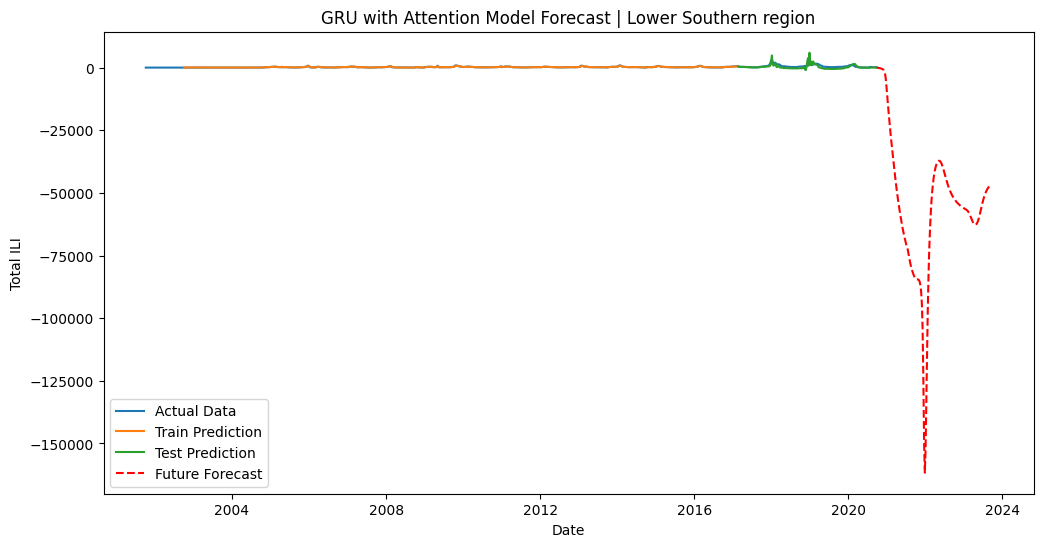

Train MAE: 44.362138165791826, Train MSE: 4298.232632996801, Train RMSE: 65.56090781095699
Test MAE: 499.0296167338148, Test MSE: 519631.3399978977, Test RMSE: 720.8545900512098
Accuracy: 6.920552076079501


In [ ]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot actual data
plt.plot(df_lower_southern.index, scaler.inverse_transform(scaled_data), label='Actual Data')

# Plot training predictions
train_start_index = time_step
train_end_index = train_start_index + len(train_predict)
plt.plot(df_lower_southern.index[train_start_index:train_end_index], train_predict, label='Train Prediction')

# Plot testing predictions
test_start_index = train_end_index
test_end_index = test_start_index + len(test_predict)

# Ensure the indices match the length of test_predict
test_indices = df_lower_southern.index[test_start_index:test_start_index + len(test_predict)]
plt.plot(test_indices, test_predict, label='Test Prediction')

# Plot future predictions
future_forecasts = []
future_inputs = list(scaled_data[-time_step:].flatten())  # Flattening to ensure consistent shape
forecast_horizon = 3 * 52  # 3 years (52 weeks per year)

for _ in range(forecast_horizon):
    future_input = np.array(future_inputs[-time_step:]).reshape(1, time_step, 1)
    future_prediction = model.predict(future_input)
    future_forecasts.append(future_prediction[0, 0])
    future_inputs.append(future_prediction[0, 0])

future_forecasts = scaler.inverse_transform(np.array(future_forecasts).reshape(-1, 1))
future_dates = pd.date_range(start=df_lower_southern.index[-1], periods=forecast_horizon, freq='W')
plt.plot(future_dates, future_forecasts, label='Future Forecast', linestyle='--', color='red')

# Show plot
plt.title('GRU with Attention Model Forecast | Lower Southern region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.legend()
plt.show()

# Evaluate model
train_mae = mean_absolute_error(y_train, train_predict)
train_mse = mean_squared_error(y_train, train_predict)
train_rmse = np.sqrt(train_mse)
test_mae = mean_absolute_error(y_test, test_predict)
test_mse = mean_squared_error(y_test, test_predict)
test_rmse = np.sqrt(test_mse)

# Calculate accuracy
accuracy = 1 - (test_mae / np.mean(y_test))

print(f'Train MAE: {train_mae}, Train MSE: {train_mse}, Train RMSE: {train_rmse}')
print(f'Test MAE: {test_mae}, Test MSE: {test_mse}, Test RMSE: {test_rmse}')
print(f'Accuracy: {accuracy * 100}')


## Lower Southern result => Poor performance.

In [ ]:
# Train MAE: 44.362138165791826, Train MSE: 4298.232632996801, Train RMSE: 65.56090781095699
# Test MAE: 499.0296167338148, Test MSE: 519631.3399978977, Test RMSE: 720.8545900512098
# Accuracy: 6.920552076079501

## All Datasets

In [ ]:
# Assuming the scaler is defined as scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data_central = scaler.fit_transform(df_central[['y']].values)
scaled_data_bay_area = scaler.fit_transform(df_bay_area[['y']].values)


Epoch 1/50
149/149 [==============================] - 13s 16ms/step - loss: 0.0015
Epoch 2/50
149/149 [==============================] - 2s 17ms/step - loss: 3.5843e-04
Epoch 3/50
149/149 [==============================] - 2s 17ms/step - loss: 3.2472e-04
Epoch 4/50
149/149 [==============================] - 3s 19ms/step - loss: 3.1676e-04
Epoch 5/50
149/149 [==============================] - 3s 20ms/step - loss: 2.7207e-04
Epoch 6/50
149/149 [==============================] - 2s 16ms/step - loss: 2.6957e-04
Epoch 7/50
149/149 [==============================] - 3s 20ms/step - loss: 2.6482e-04
Epoch 8/50
149/149 [==============================] - 3s 17ms/step - loss: 2.5730e-04
Epoch 9/50
149/149 [==============================] - 1s 9ms/step - loss: 2.4292e-04
Epoch 10/50
149/149 [==============================] - 2s 12ms/step - loss: 2.4750e-04
Epoch 11/50
149/149 [==============================] - 2s 14ms/step - loss: 2.4348e-04
Epoch 12/50
149/149 [==============================] - 2

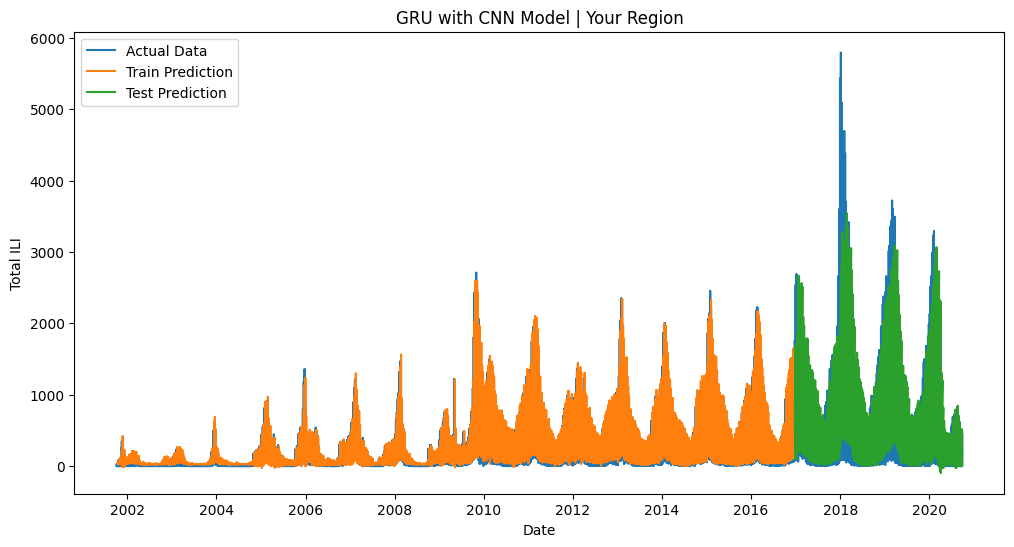

1/1 [==============================] - 0s 21ms/step


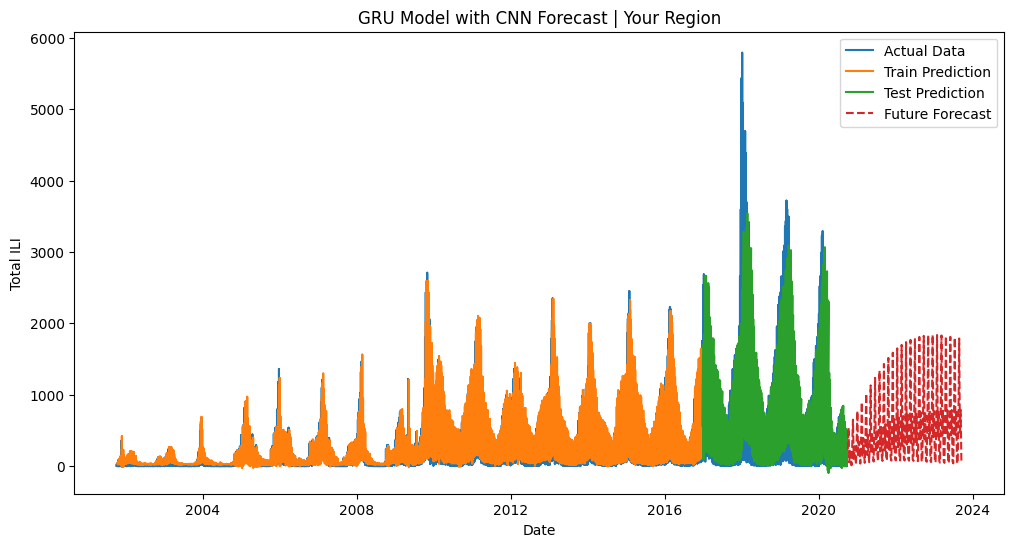

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, GRU, Conv1D, MaxPooling1D, Flatten, Dropout
import matplotlib.pyplot as plt

# Function to create sequences
def create_sequences(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Load and preprocess the data
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason_data.csv')
df['ds'] = pd.to_datetime(df['weekending'])
df = df[['ds', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})
df.set_index('ds', inplace=True)

# Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values)

# Create sequences
time_step = 10  # Define your time step
X, y = create_sequences(scaled_data, time_step)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Create the GRU with CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(time_step, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(GRU(100, return_sequences=True))
model.add(GRU(100, return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

# Calculate error metrics
train_mae = mean_absolute_error(y_train[0], train_predict[:, 0])
train_mse = mean_squared_error(y_train[0], train_predict[:, 0])
train_rmse = np.sqrt(train_mse)

test_mae = mean_absolute_error(y_test[0], test_predict[:, 0])
test_mse = mean_squared_error(y_test[0], test_predict[:, 0])
test_rmse = np.sqrt(test_mse)

accuracy = 100 - (test_mae / np.mean(y_test) * 100)

print(f'Train MAE: {train_mae}, Train MSE: {train_mse}, Train RMSE: {train_rmse}')
print(f'Test MAE: {test_mae}, Test MSE: {test_mse}, Test RMSE: {test_rmse}')
print(f'Accuracy: {accuracy}')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df.index, scaler.inverse_transform(scaled_data), label='Actual Data')
plt.plot(df.index[time_step:len(train_predict) + time_step], train_predict, label='Train Prediction')

# Correct the test prediction index alignment
test_start_index = len(train_predict) + (time_step * 2) + 1
test_end_index = test_start_index + len(test_predict)
if test_end_index > len(df):
    test_end_index = len(df)
plt.plot(df.index[test_start_index:test_end_index], test_predict[:test_end_index-test_start_index], label='Test Prediction')

plt.legend()
plt.title('GRU with CNN Model | Your Region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.show()

# Forecasting the future
forecast_horizon = 3 * 52  # Forecasting for 3 years
last_sequence = scaled_data[-time_step:]
future_inputs = list(last_sequence)
future_forecasts = []

for _ in range(forecast_horizon):
    future_input = np.array(future_inputs[-time_step:]).reshape(1, time_step, 1)
    future_prediction = model.predict(future_input)
    future_forecasts.append(future_prediction[0, 0])
    future_inputs.append([future_prediction[0, 0]])

# Invert scaling for future forecasts
future_forecasts = scaler.inverse_transform(np.array(future_forecasts).reshape(-1, 1))

# Generate future dates
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date, periods=forecast_horizon + 1, freq='W')[1:]

# Plot the future forecasts
plt.figure(figsize=(12, 6))
plt.plot(df.index, scaler.inverse_transform(scaled_data), label='Actual Data')
plt.plot(df.index[time_step:len(train_predict) + time_step], train_predict, label='Train Prediction')
plt.plot(df.index[test_start_index:test_end_index], test_predict[:test_end_index-test_start_index], label='Test Prediction')
plt.plot(future_dates, future_forecasts, label='Future Forecast', linestyle='--')
plt.legend()
plt.title('GRU Model with CNN Forecast | Your Region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.show()


Epoch 1/50
149/149 [==============================] - 6s 12ms/step - loss: 0.0012
Epoch 2/50
149/149 [==============================] - 2s 15ms/step - loss: 3.7289e-04
Epoch 3/50
149/149 [==============================] - 2s 13ms/step - loss: 3.3000e-04
Epoch 4/50
149/149 [==============================] - 1s 9ms/step - loss: 2.9950e-04
Epoch 5/50
149/149 [==============================] - 1s 9ms/step - loss: 2.8222e-04
Epoch 6/50
149/149 [==============================] - 1s 9ms/step - loss: 2.6296e-04
Epoch 7/50
149/149 [==============================] - 1s 9ms/step - loss: 2.7967e-04
Epoch 8/50
149/149 [==============================] - 1s 9ms/step - loss: 2.5065e-04
Epoch 9/50
149/149 [==============================] - 1s 9ms/step - loss: 2.4546e-04
Epoch 10/50
149/149 [==============================] - 1s 9ms/step - loss: 2.4196e-04
Epoch 11/50
149/149 [==============================] - 2s 13ms/step - loss: 2.3803e-04
Epoch 12/50
149/149 [==============================] - 2s 15ms/

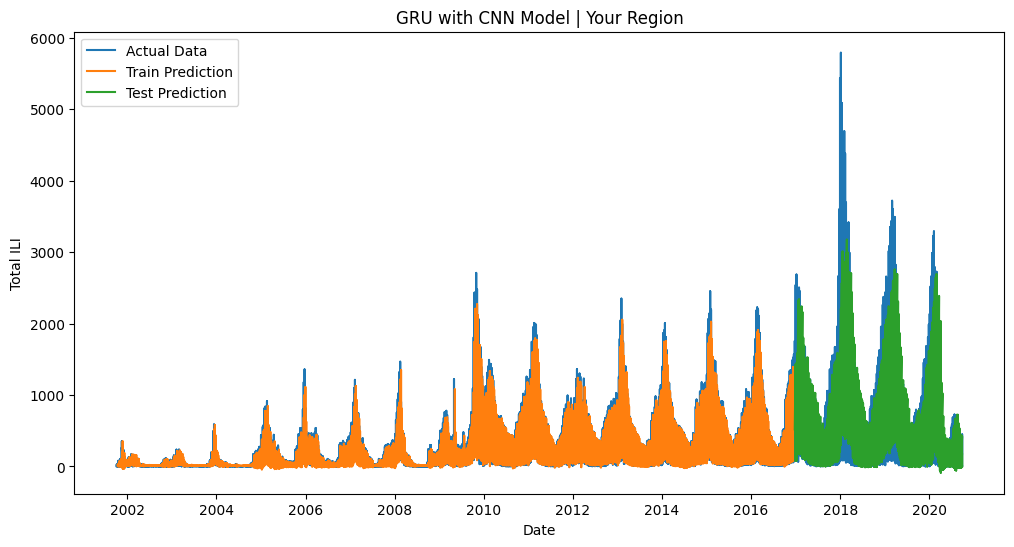

1/1 [==============================] - 0s 21ms/step


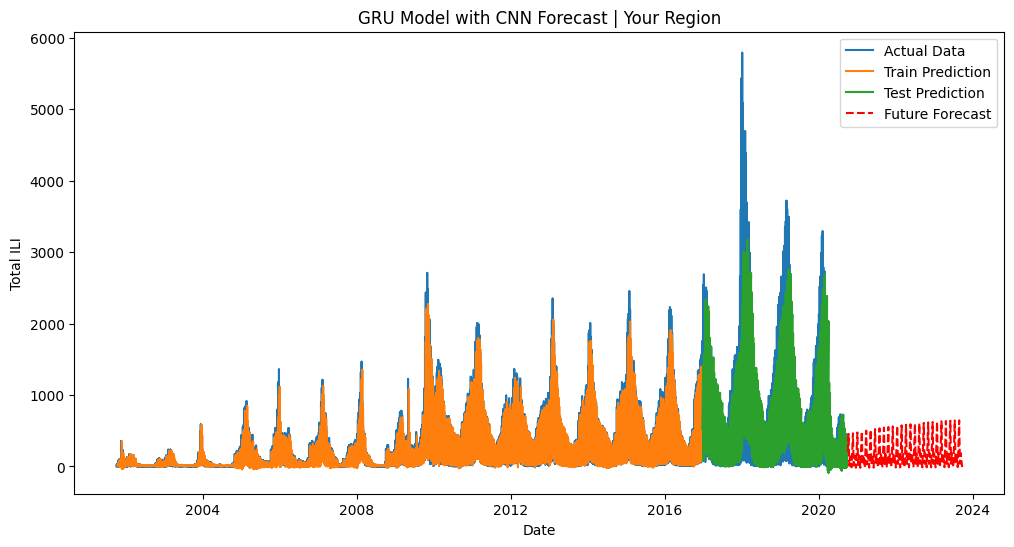

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, GRU, Conv1D, MaxPooling1D, Flatten, Dropout
import matplotlib.pyplot as plt

# Function to create sequences
def create_sequences(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Load and preprocess the data
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason_data.csv')
df['ds'] = pd.to_datetime(df['weekending'])
df = df[['ds', 'Total_ILI']].rename(columns={'weekending': 'ds', 'Total_ILI': 'y'})
df.set_index('ds', inplace=True)

# Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values)

# Create sequences
time_step = 10  # Define your time step
X, y = create_sequences(scaled_data, time_step)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Create the GRU with CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(time_step, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(GRU(100, return_sequences=True))
model.add(GRU(100, return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

# Calculate error metrics
train_mae = mean_absolute_error(y_train[0], train_predict[:, 0])
train_mse = mean_squared_error(y_train[0], train_predict[:, 0])
train_rmse = np.sqrt(train_mse)

test_mae = mean_absolute_error(y_test[0], test_predict[:, 0])
test_mse = mean_squared_error(y_test[0], test_predict[:, 0])
test_rmse = np.sqrt(test_mse)

accuracy = 100 - (test_mae / np.mean(y_test) * 100)

print(f'Train MAE: {train_mae}, Train MSE: {train_mse}, Train RMSE: {train_rmse}')
print(f'Test MAE: {test_mae}, Test MSE: {test_mse}, Test RMSE: {test_rmse}')
print(f'Accuracy: {accuracy}')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df.index, scaler.inverse_transform(scaled_data), label='Actual Data')
plt.plot(df.index[time_step:len(train_predict) + time_step], train_predict, label='Train Prediction')

# Correct the test prediction index alignment
test_start_index = len(train_predict) + (time_step * 2) + 1
test_end_index = test_start_index + len(test_predict)
if test_end_index > len(df):
    test_end_index = len(df)
plt.plot(df.index[test_start_index:test_end_index], test_predict[:test_end_index-test_start_index], label='Test Prediction')

plt.legend()
plt.title('GRU with CNN Model | Your Region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.show()

# Forecasting the future
forecast_horizon = 3 * 52  # Forecasting for 3 years
last_sequence = scaled_data[-time_step:]
future_inputs = list(last_sequence)
future_forecasts = []

for _ in range(forecast_horizon):
    future_input = np.array(future_inputs[-time_step:]).reshape(1, time_step, 1)
    future_prediction = model.predict(future_input)
    future_forecasts.append(future_prediction[0, 0])
    future_inputs.append([future_prediction[0, 0]])

# Invert scaling for future forecasts
future_forecasts = scaler.inverse_transform(np.array(future_forecasts).reshape(-1, 1))

# Generate future dates
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date, periods=forecast_horizon + 1, freq='W')[1:]

# Plot the future forecasts with cleaner line plot
plt.figure(figsize=(12, 6))
plt.plot(df.index, scaler.inverse_transform(scaled_data), label='Actual Data')
plt.plot(df.index[time_step:len(train_predict) + time_step], train_predict, label='Train Prediction')
plt.plot(df.index[test_start_index:test_end_index], test_predict[:test_end_index-test_start_index], label='Test Prediction')
plt.plot(future_dates, future_forecasts, label='Future Forecast', linestyle='--', color='red')
plt.legend()
plt.title('GRU Model with CNN Forecast | Your Region')
plt.xlabel('Date')
plt.ylabel('Total ILI')
plt.show()
